In [1]:
import pandas as pd

# Load the Online Shopping dataset
df = pd.read_csv("OnlineShopping.csv")

# Display basic information
df.info()  # Check data types and missing values

df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[12330 rows x 18 columns]

In [2]:
# Remove missing values
df_cleaned = df.dropna()
print(f"\n{len(df) - len(df_cleaned)} rows with missing values removed.")

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()
print(f"\n{len(df) - len(df_cleaned)} duplicate rows removed.")




0 rows with missing values removed.

125 duplicate rows removed.


In [3]:
print(df_cleaned.describe())

       Administrative  Administrative_Duration  Informational  \
count    12205.000000             12205.000000   12205.000000   
mean         2.338878                81.646331       0.508726   
std          3.330436               177.491845       1.275617   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 9.000000       0.000000   
75%          4.000000                94.700000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12205.000000    12205.000000             12205.000000   
mean                34.825454       32.045637              1206.982457   
std                141.424807       44.593649              1919.601400   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        8.00000

The data summary reveals that user engagement across page types is highly uneven. Most users spend minimal time on administrative and informational pages, with median visits at or near zero. However, a small niche of users spends significant time—up to 56 minutes and 42 minutes respectively—indicating deep interest in policies or informational content. Product-related pages show the highest engagement, with a median of 18 pages per session and some users viewing up to 705 pages. Similarly, while the average product-related duration is around 20 minutes, extreme cases extend to nearly 17.7 hours, suggesting a rare but highly engaged group of users.

Bounce and exit rates remain relatively low overall, with median values of ~0.3% and ~2.5%, implying that most users interact with multiple pages before exiting. Still, the upper quartiles and maximum values (up to 20%) suggest that certain pages may be causing users to leave too early, potentially due to poor content or irrelevant traffic. In terms of revenue, the PageValues metric shows that most sessions contribute little (median = 0), but the mean value (~5.95) and high maximum (~362) reflect a skewed distribution, where a few sessions drive significant revenue. This pattern is common in e-commerce, where a small group of high-intent users generate the bulk of conversions. Additionally, SpecialDay has limited influence, with most sessions occurring outside promotional periods, indicating that current marketing campaigns may not be impactful.

From a technical and geographic standpoint, most users access the site via a few common operating systems and browsers, with median values suggesting dominance of Windows/macOS and Chrome/Firefox. Regional and traffic source diversity is moderate, with most users coming from a few key locations and channels. Overall, the data highlights a segmented user base with high variance in behaviour, suggesting opportunities for optimising underperforming pages, better targeting high-value users, and revisiting the effectiveness of seasonal promotions.


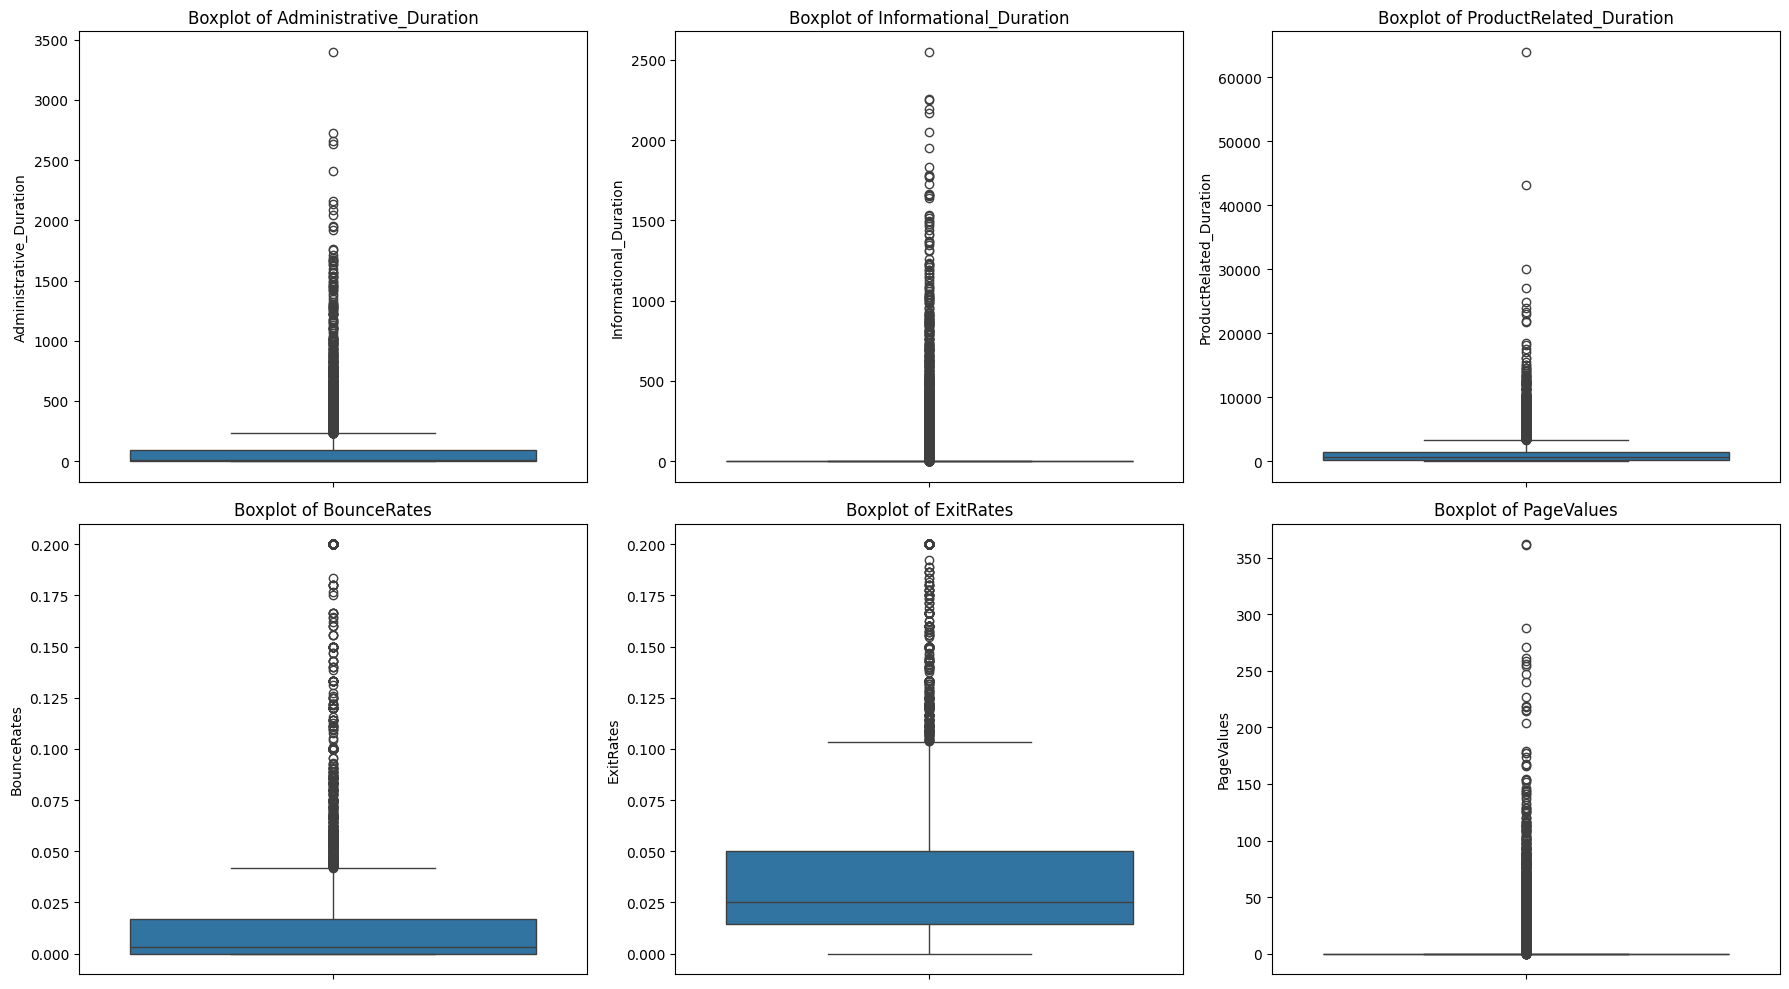

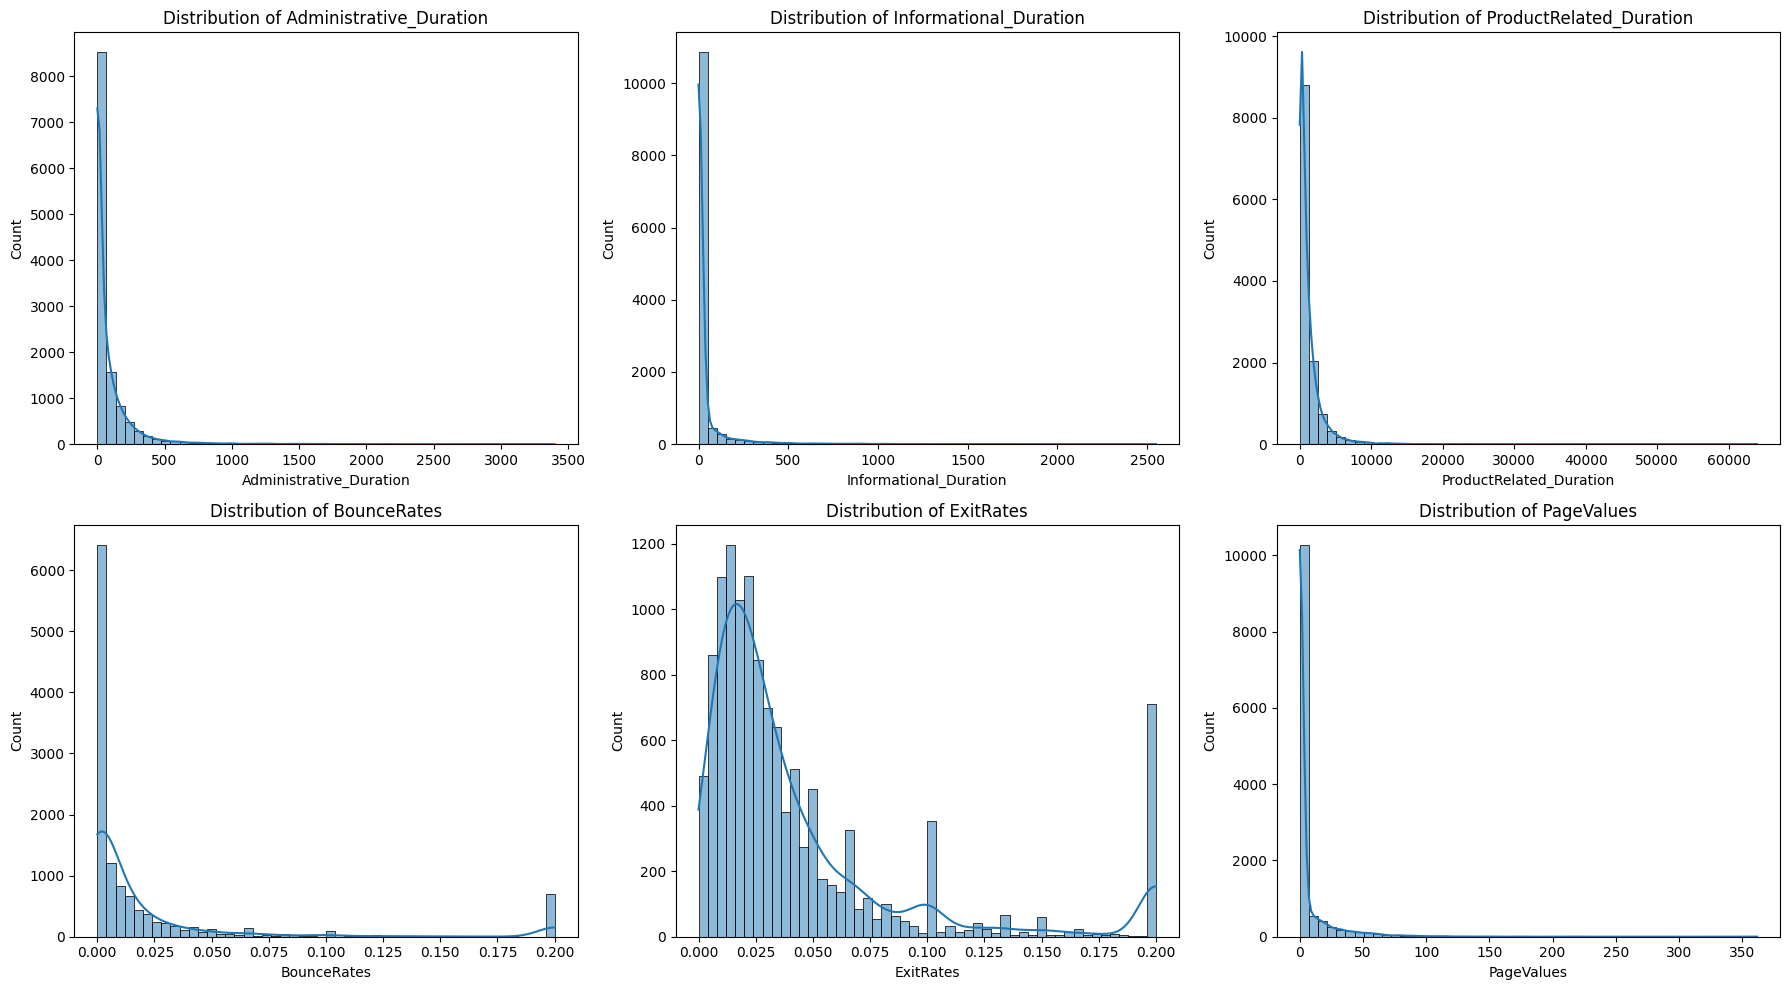

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select key numerical features for outlier detection and log transformation check
outlier_features = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", 
                    "BounceRates", "ExitRates", "PageValues"]

# Create subplots to visualize distribution and potential outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, col in enumerate(outlier_features):
    row, col_idx = divmod(i, 3)

    # Boxplot to visualize outliers
    sns.boxplot(y=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

# Visualizing skewness for log transformation check
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, col in enumerate(outlier_features):
    row, col_idx = divmod(i, 3)

    # Histogram to check for skewness
    sns.histplot(df[col], bins=50, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


The outlier and distribution analysis reveals several important behavioural patterns in the dataset. Numerous numerical features—including Administrative_Duration, Informational_Duration, ProductRelated_Duration, PageValues, BounceRates, and ExitRates—contain extreme outliers. These outliers highlight that while most users exhibit typical engagement, a small subset shows abnormally high durations or activity levels, potentially indicating in-depth research or even bot-like behaviour. ProductRelated_Duration, for example, includes values above 60,000 seconds, which may warrant capping or further scrutiny.

Many of these features are heavily right-skewed, particularly those related to time spent or value generation. This suggests that while most users spend only brief periods on the site, a small portion are highly active. Such skewness can bias model performance, making log transformation a helpful technique for normalisation, especially for features like Administrative_Duration, PageValues, and BounceRates.

BounceRates and ExitRates are particularly concentrated at zero, indicating that a significant number of users exit the site almost immediately—likely due to poor landing page experience or irrelevant content. However, the presence of upper outliers in these metrics also suggests that some users navigate extensively before leaving, which may reflect indecision or friction in the purchase process.

Finally, PageValues show a strong skew toward zero, meaning that most sessions do not lead to revenue-generating actions. Still, a few sessions contribute very high value, underscoring the common e-commerce pattern where a small proportion of users drive the majority of revenue. Understanding and targeting this high-value user segment is critical for improving conversion and retention.


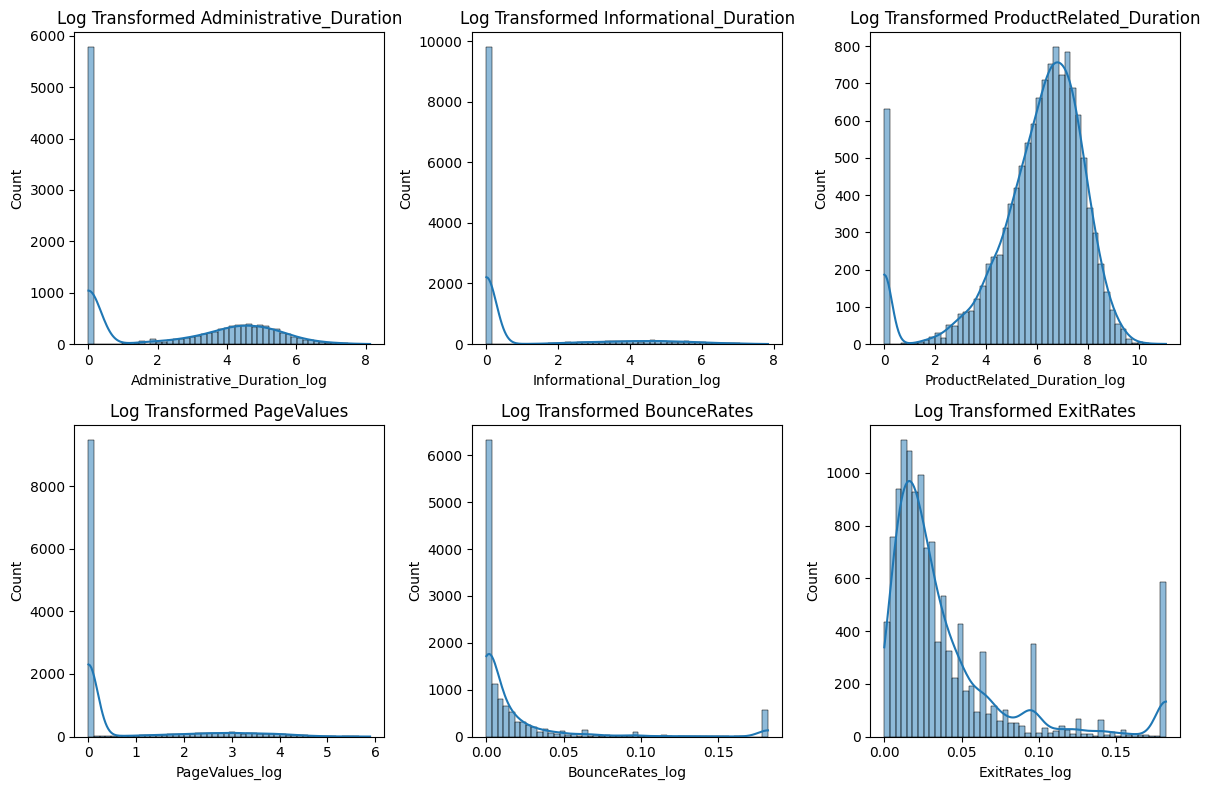

In [5]:
import numpy as np

# List of features to apply log transformation
skewed_features = [
    "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", 
    "PageValues", "BounceRates", "ExitRates"
]

# Apply log transformation (adding 1 to avoid log(0) issues)
for feature in skewed_features:
    df_cleaned[feature + "_log"] = np.log1p(df_cleaned[feature])

# Check distributions post-transformation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for i, feature in enumerate(skewed_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_cleaned[feature + "_log"], bins=50, kde=True)
    plt.title(f"Log Transformed {feature}")

plt.tight_layout()
plt.show()


The log transformation of key numerical features significantly improves their distributions, making the dataset more suitable for machine learning models that assume normality. For instance, `Administrative_Duration` and `Informational_Duration` were originally highly right-skewed, with most values near zero and a few outliers reaching up to 3,398 and 2,500 seconds respectively. Applying a log transformation compresses these extreme values and redistributes the bulk of the data more evenly, allowing for better model interpretability and stability.

`ProductRelated_Duration`, which had the highest maximum value (over 63,000 seconds), showed a dramatic improvement after transformation. Its distribution now peaks between log values of 4 and 8, suggesting more consistent user engagement patterns on product pages. Similarly, `PageValues`, which originally had a sharp concentration at zero and a long tail of high values, becomes more interpretable post-transformation, helping models focus on meaningful value differences without being skewed by a few high-revenue sessions.

The log transformations applied to `BounceRates` and `ExitRates` also yield more usable distributions. While many values still cluster near zero, the transformation helps spread the data and reduce the influence of high-exit or high-bounce anomalies. This is crucial for accurately capturing session quality and identifying drop-off points. Overall, log transformation is an essential preprocessing step for handling skewed data and outliers, improving model robustness and performance across both classification and regression tasks.


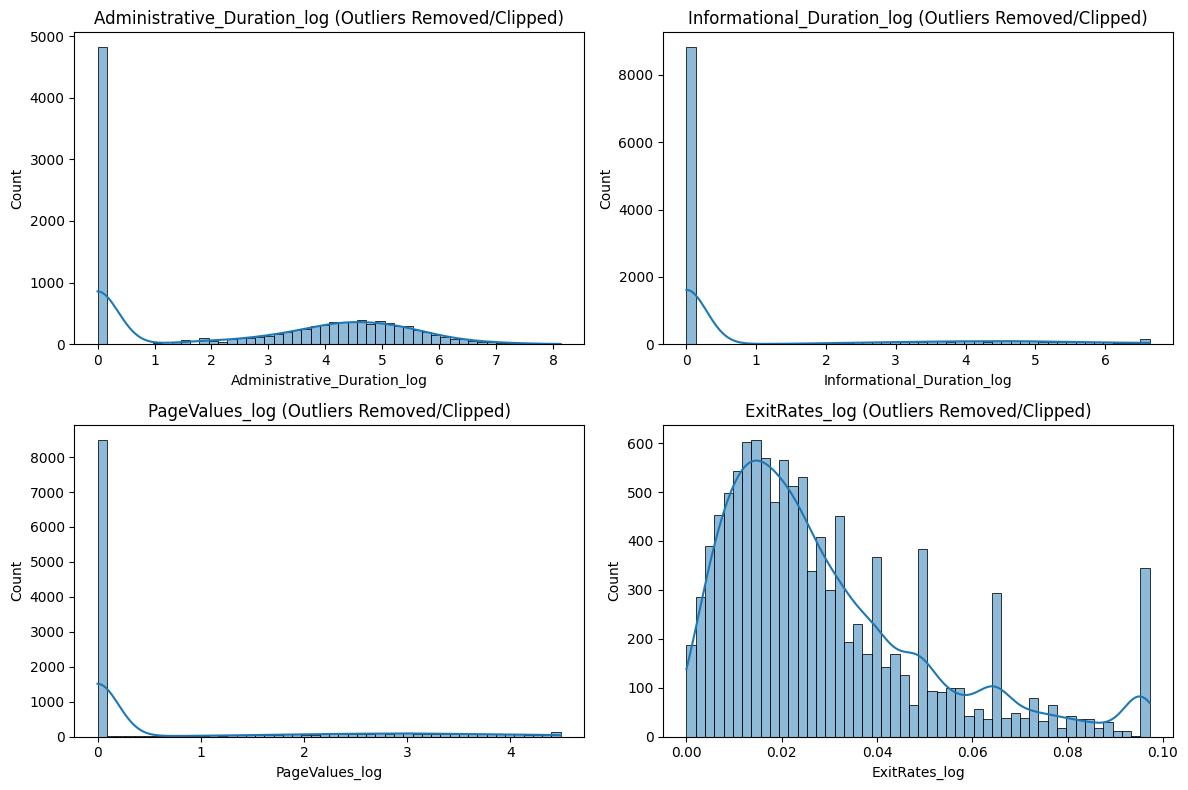

Original dataset size (log-transformed): (12205, 24)
After outlier removal/clipping: (11225, 24)


In [6]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# OUTLIER REMOVAL + CLIPPING METHODS
# ----------------------------
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    mask = np.abs(z_scores) < threshold
    return df[mask]

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

def clip_outliers_percentile(df, column, lower_pct=0.01, upper_pct=0.99):
    lower = df[column].quantile(lower_pct)
    upper = df[column].quantile(upper_pct)
    df[column] = df[column].clip(lower=lower, upper=upper)
    return df

# ----------------------------
# Copy the LOG-TRANSFORMED DataFrame
# ----------------------------
df_outliers_removed = df_cleaned.copy()  # ✅ Has *_log columns

# ----------------------------
# REMOVE or CLIP OUTLIERS
# ----------------------------

# 1. Z-score removal
df_outliers_removed = remove_outliers_zscore(df_outliers_removed, 'Administrative_Duration_log')

# 2. IQR for ExitRates_log
df_outliers_removed = remove_outliers_iqr(df_outliers_removed, 'ExitRates_log')

# 3. Clipping for Informational_Duration_log and PageValues_log
clipped_columns = ['Informational_Duration_log', 'PageValues_log']
for col in clipped_columns:
    df_outliers_removed = clip_outliers_percentile(df_outliers_removed, col)

# ----------------------------
# PLOT HISTOGRAMS AFTER REMOVING/CLIPPING OUTLIERS
# ----------------------------
outlier_handled_features = ['Administrative_Duration_log', 'Informational_Duration_log', 
                            'PageValues_log', 'ExitRates_log']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(outlier_handled_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_outliers_removed[feature], bins=50, kde=True)
    plt.title(f"{feature} (Outliers Removed/Clipped)")

plt.tight_layout()
plt.show()

# ----------------------------
# CHECK DATA SIZE BEFORE/AFTER
# ----------------------------
print(f"Original dataset size (log-transformed): {df_cleaned.shape}")
print(f"After outlier removal/clipping: {df_outliers_removed.shape}")


After applying log transformation to skewed numerical features, I handled outliers using a combination of Z-score, IQR, and percentile clipping. `Administrative_Duration_log` was cleaned using Z-score due to its near-normal distribution, while `ExitRates_log` was treated with the IQR method. For highly skewed features like `Informational_Duration_log` and `PageValues_log`, 1st–99th percentile clipping was applied to preserve meaningful variance while reducing extreme values. The resulting distributions show improved shape and spread, with no further outlier removal required. The dataset is now well-prepared for modeling.


In [7]:
df_cleaned = df_outliers_removed.copy()


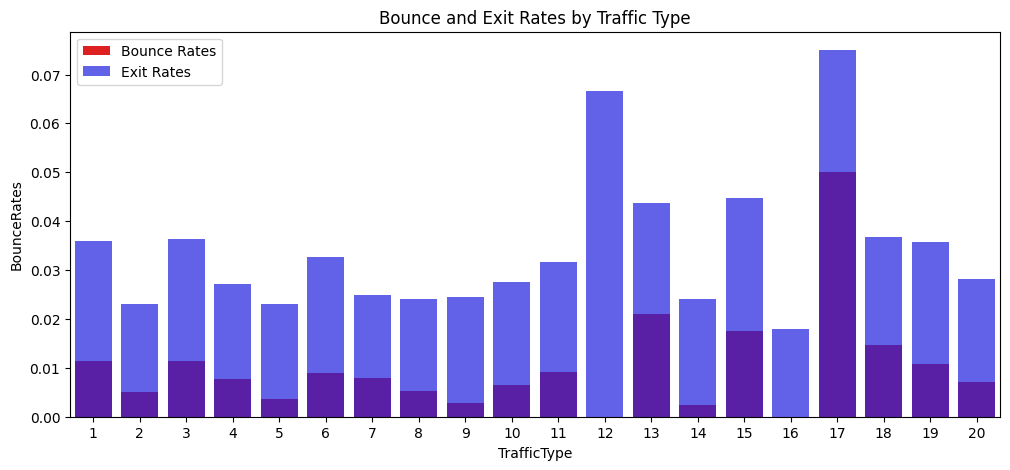

In [8]:
# Group data by Traffic Type and aggregate Bounce & Exit Rates
traffic_analysis = df_cleaned.groupby("TrafficType")[["BounceRates", "ExitRates", "PageValues"]].mean().reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=traffic_analysis, x="TrafficType", y="BounceRates", color="red", label="Bounce Rates")
sns.barplot(data=traffic_analysis, x="TrafficType", y="ExitRates", color="blue", label="Exit Rates", alpha=0.7)
plt.legend()
plt.title("Bounce and Exit Rates by Traffic Type")
plt.show()


The visualisation also reveals a particularly interesting behaviour for TrafficType 12, which exhibits the second-highest peak in overall height but is almost entirely driven by ExitRates rather than BounceRates. This implies that users from this traffic source tend not to leave immediately but do exit after some level of interaction, possibly after browsing a few pages. Unlike TrafficType 15, where users disengage quickly, the higher ExitRate but lower BounceRate for TrafficType 12 suggests a form of delayed disengagement—users are initially interested but fail to complete a transaction or meaningful action. This behaviour could point to barriers later in the funnel such as unclear product information, complex navigation, or poor checkout processes. Since these users are staying longer than average, they represent a warm audience with potential to convert. Therefore, TrafficType 12 may be a valuable revenue opportunity, and optimising user flow or offering targeted interventions (e.g. exit-intent offers or streamlined purchasing paths) could significantly improve conversions for this segment.


In [9]:
# Ensure the dataset has the required columns
if "Month" not in df_cleaned.columns:
    month_mapping = {
        "Month_Jan": "Jan", "Month_Feb": "Feb", "Month_Mar": "Mar", "Month_Apr": "Apr",
        "Month_May": "May", "Month_June": "Jun", "Month_Jul": "Jul", "Month_Aug": "Aug",
        "Month_Sep": "Sep", "Month_Oct": "Oct", "Month_Nov": "Nov", "Month_Dec": "Dec"
    }
    month_columns = list(month_mapping.keys())
    df_cleaned["Month"] = df_cleaned[month_columns].idxmax(axis=1).map(month_mapping)

# Continue with previous seasonality analysis code

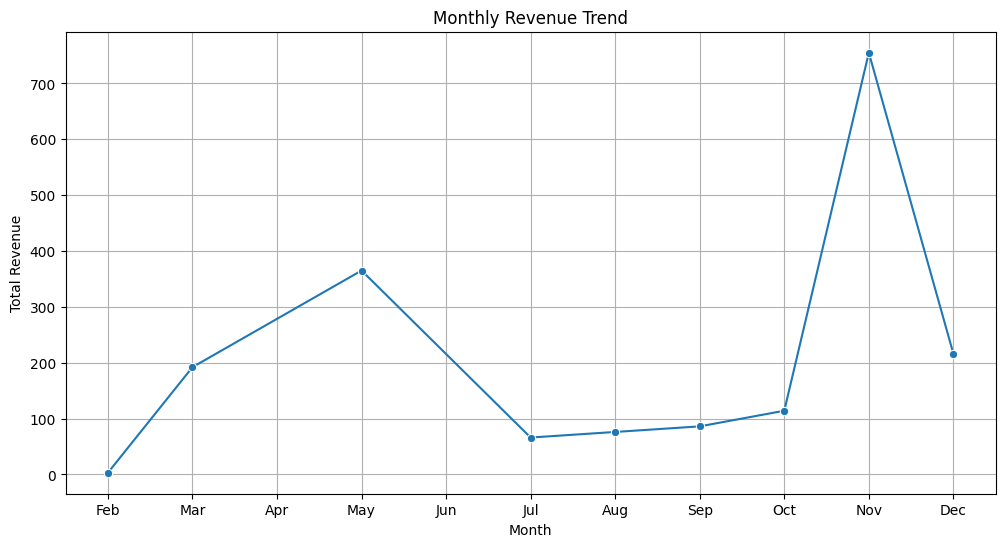

In [10]:

# Aggregate revenue by month
monthly_revenue = df_cleaned.groupby("Month")["Revenue"].sum().reindex(
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)

# Aggregate page values by month
monthly_page_values = df_cleaned.groupby("Month")["PageValues"].mean().reindex(
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)

# Plot revenue trend over months
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker="o", linestyle="-")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

### Monthly Revenue Trend Analysis

The line chart displaying monthly revenue trends reveals several key seasonal patterns. Revenue gradually increases from February through May, peaking modestly in May before dropping sharply during the summer months of June and July. This decline could be attributed to seasonal disengagement, possibly due to holidays or a shift in user intent. However, a striking surge is observed in November, marking the highest revenue peak by a significant margin. This spike is likely linked to seasonal promotions such as Black Friday and Cyber Monday, which typically drive a sharp increase in online purchases. The subsequent drop in December, while still above average, suggests a post-event dip despite the holiday season. These insights highlight the importance of aligning marketing and sales strategies with peak periods—especially November—to maximise conversions and revenue.


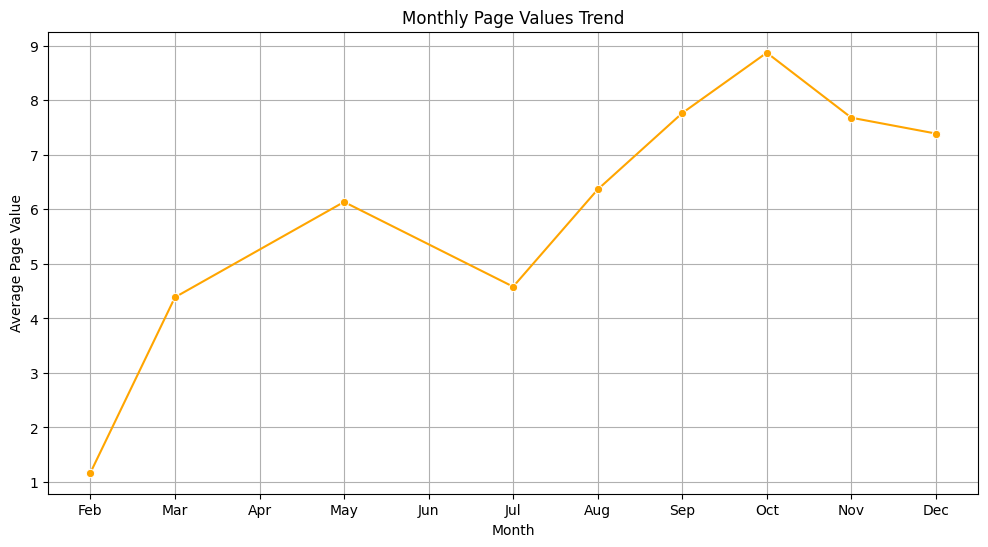

In [11]:
# Plot page values trend over months
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_page_values.index, y=monthly_page_values.values, marker="o", linestyle="-", color="orange")
plt.title("Monthly Page Values Trend")
plt.xlabel("Month")
plt.ylabel("Average Page Value")
plt.grid(True)
plt.show()



### Monthly Page Value Trend Analysis

The line chart of monthly average PageValues reveals a general upward trend over the year, indicating increasing user engagement with revenue-generating activities. Starting from a low of just over 1 in February, PageValues steadily rise through spring and summer, peaking in October at nearly 9. This peak suggests October saw the most valuable sessions on average, potentially driven by users researching products or preparing for major November sales events like Black Friday. Interestingly, while November has the highest total revenue (as seen in the revenue trend), its average PageValue drops slightly, indicating that although more transactions occur, the value per session is lower—possibly due to higher but shallower traffic. This pattern reflects a trade-off between quantity and quality of sessions and underscores the importance of targeted engagement strategies during high-traffic months.


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/3574677731.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_analysis['TrafficType'], y=traffic_analysis['Total_Revenue'], palette='viridis')


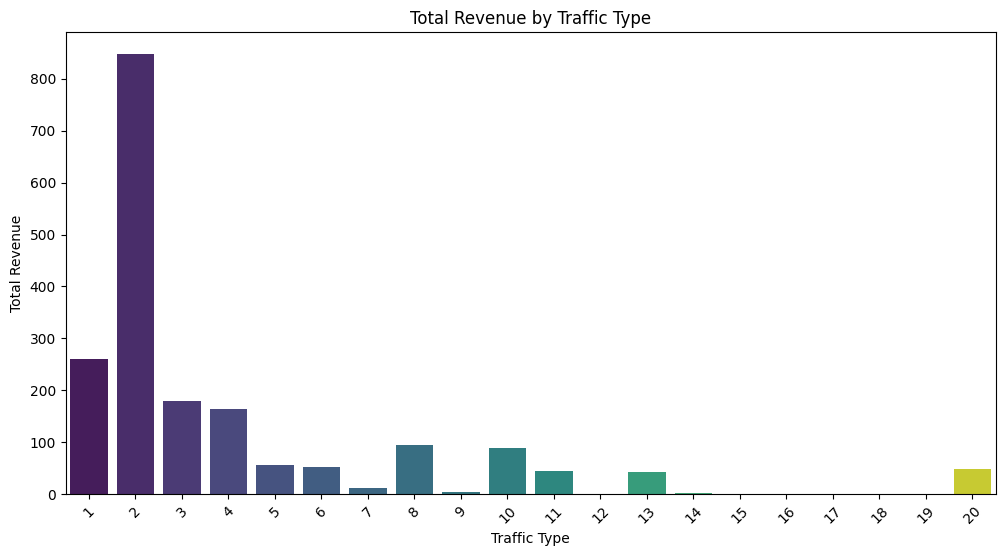

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate revenue and page values by traffic type
traffic_analysis = df_cleaned.groupby('TrafficType').agg(
    Total_Revenue=('Revenue', 'sum'),
    Avg_PageValue=('PageValues', 'mean'),
    Avg_BounceRate=('BounceRates', 'mean'),
    Avg_ExitRate=('ExitRates', 'mean')
).reset_index()

# Sort values for better visualization
traffic_analysis = traffic_analysis.sort_values(by='Total_Revenue', ascending=False)

# Plot total revenue by traffic source
plt.figure(figsize=(12, 6))
sns.barplot(x=traffic_analysis['TrafficType'], y=traffic_analysis['Total_Revenue'], palette='viridis')
plt.xlabel("Traffic Type")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Traffic Type")
plt.xticks(rotation=45)
plt.show()

### 💡 Total Revenue by Traffic Type

The bar chart illustrating total revenue by traffic type shows a heavily skewed distribution, with **Traffic Type 2** contributing the vast majority of revenue—over 850 units. This dominant performance suggests that this traffic source is **highly effective at driving conversions**, possibly due to better targeting, stronger user intent, or optimised landing pages. **Traffic Types 1, 3, and 4** also contribute modestly to revenue, while the remaining types generate minimal returns, highlighting potential inefficiencies in traffic acquisition strategies. Notably, **Traffic Type 20**, despite being less common, shows some revenue contribution, indicating it may be a niche but valuable source. This analysis underscores the need to prioritise and further invest in high-performing traffic channels while re-evaluating or optimising underperforming ones to improve overall marketing ROI.


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/1230805360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_analysis['TrafficType'], y=traffic_analysis['Avg_PageValue'], palette='plasma')


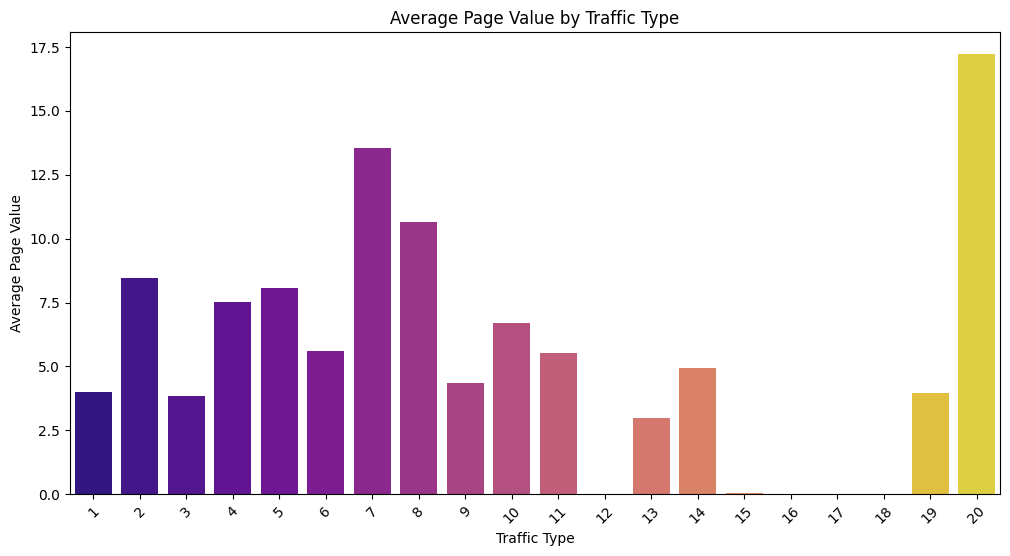

In [13]:
# Plot average page value by traffic source
plt.figure(figsize=(12, 6))
sns.barplot(x=traffic_analysis['TrafficType'], y=traffic_analysis['Avg_PageValue'], palette='plasma')
plt.xlabel("Traffic Type")
plt.ylabel("Average Page Value")
plt.title("Average Page Value by Traffic Type")
plt.xticks(rotation=45)
plt.show()


### Average Page Value by Traffic Type

The bar chart displaying average page value by traffic type reveals that **Traffic Type 20** stands out significantly, with an average page value close to **17.5**, far exceeding all others. This suggests that even if it has a smaller volume of traffic, the users it attracts are highly valuable and contribute meaningfully to revenue. **Traffic Types 7 and 8** also show strong average values (above 10), indicating effective user targeting or content relevance. Interestingly, **Traffic Type 2**, while previously shown to contribute the most in terms of total revenue, has a slightly lower average page value compared to others, implying it attracts higher traffic volume but with lower per-session value. In contrast, some traffic types such as 13 and 15 report very low average page values, suggesting inefficient or poorly converting channels. This analysis highlights opportunities to further invest in high-performing sources like Traffic Type 20 while reassessing the quality or targeting strategy of lower-performing types.


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/2324123053.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_conversion['TrafficType'], y=traffic_conversion['Conversion_Rate'], palette='coolwarm')


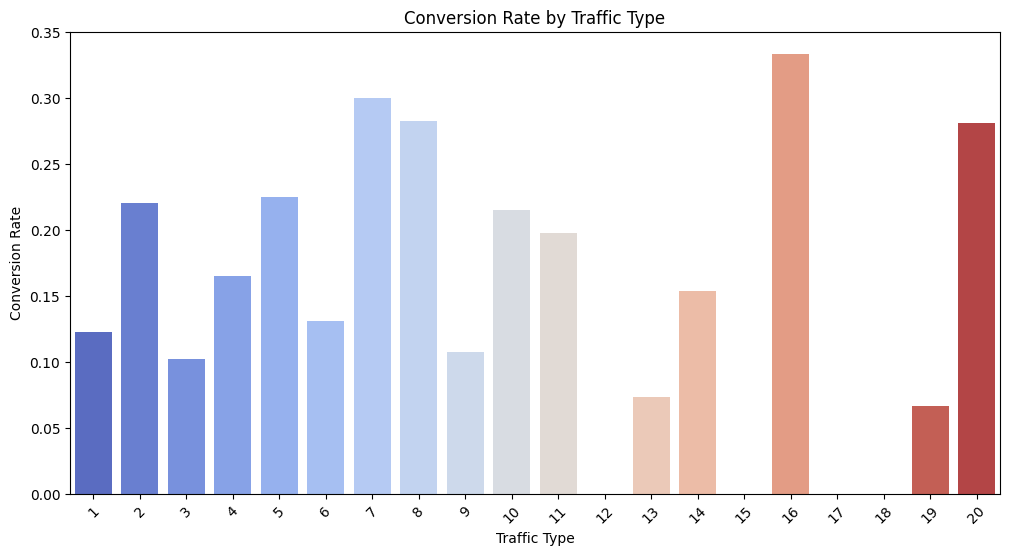

In [14]:
# Calculate conversion rate (Revenue / Total Visits per Traffic Type)
traffic_conversion = df_cleaned.groupby('TrafficType').agg(
    Total_Users=('TrafficType', 'count'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

# Compute conversion rate
traffic_conversion['Conversion_Rate'] = traffic_conversion['Total_Revenue'] / traffic_conversion['Total_Users']

# Sort for better visualization
traffic_conversion = traffic_conversion.sort_values(by='Conversion_Rate', ascending=False)

# Plot conversion rates by traffic type
plt.figure(figsize=(12, 6))
sns.barplot(x=traffic_conversion['TrafficType'], y=traffic_conversion['Conversion_Rate'], palette='coolwarm')
plt.xlabel("Traffic Type")
plt.ylabel("Conversion Rate")
plt.title("Conversion Rate by Traffic Type")
plt.xticks(rotation=45)
plt.show()


### Conversion Rate by Traffic Type

This visualisation of conversion rates across traffic types reveals important insights about user quality. **Traffic Type 16** achieves the highest conversion rate of approximately **33%**, despite not being one of the top contributors to total revenue or average page value—indicating that although it brings fewer users, they are highly intent-driven and likely to convert. **Traffic Types 7, 8, and 20** also demonstrate strong conversion performance, with rates around **28–30%**, suggesting these sources are highly effective in driving revenue-generating actions. In contrast, **Traffic Types 13 and 19** show poor conversion rates (below **7%**), implying inefficiencies in


In [15]:
df_cleaned["Total_Session_Duration"] = (
    df_cleaned["Administrative_Duration"] + 
    df_cleaned["Informational_Duration"] + 
    df_cleaned["ProductRelated_Duration"]
)


In [16]:
import numpy as np
df_cleaned["Total_Session_Duration_log"] = df_cleaned["Total_Session_Duration"].apply(lambda x: np.log1p(x))


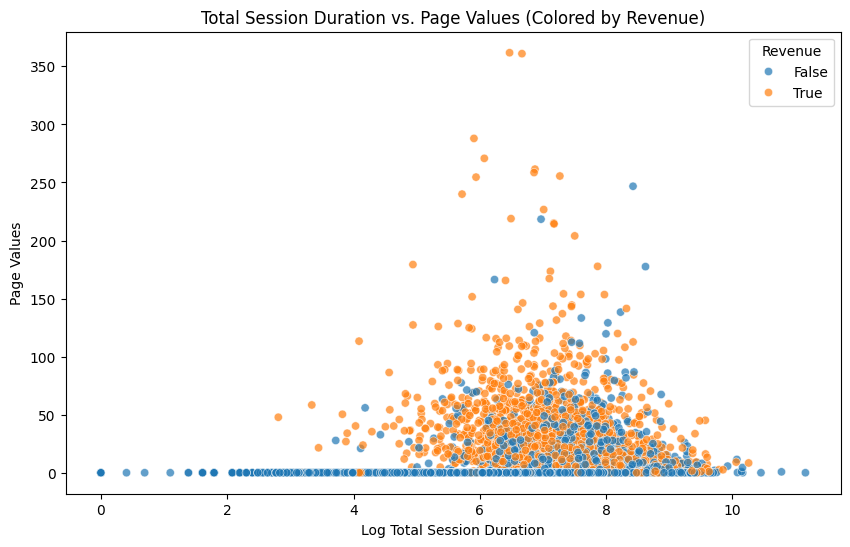

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned["Total_Session_Duration_log"], 
                y=df_cleaned["PageValues"], 
                hue=df_cleaned["Revenue"], 
                alpha=0.7)
plt.title("Total Session Duration vs. Page Values (Colored by Revenue)")
plt.xlabel("Log Total Session Duration")
plt.ylabel("Page Values")
plt.legend(title="Revenue")
plt.show()


### 🔍 Total Session Duration vs. Page Values (Coloured by Revenue)

This scatter plot illustrates the relationship between log-transformed total session duration and PageValues, with points coloured based on whether revenue was generated. A clear trend emerges: **sessions that resulted in revenue (orange dots)** tend to cluster in the mid-to-high range of session durations and exhibit notably higher PageValues. This indicates that users who **spend more time on the site are more likely to engage in value-generating behaviour**, such as exploring product pages or reaching checkout. Meanwhile, **non-revenue sessions (blue dots)** are mostly concentrated at lower PageValues and across the full range of session durations, implying that simply spending time does not guarantee a conversion. Interestingly, there are very few revenue-generating sessions in the lower duration range (left side of the plot), further reinforcing the idea that **session length is positively correlated with transaction likelihood**, though not perfectly. The presence of high PageValues among longer sessions also suggests **deeper engagement**, possibly involving repeated visits or in-depth comparisons before purchase. Overall, the chart highlights the importance of **engagement depth**—both in time and interaction—for driving revenue.


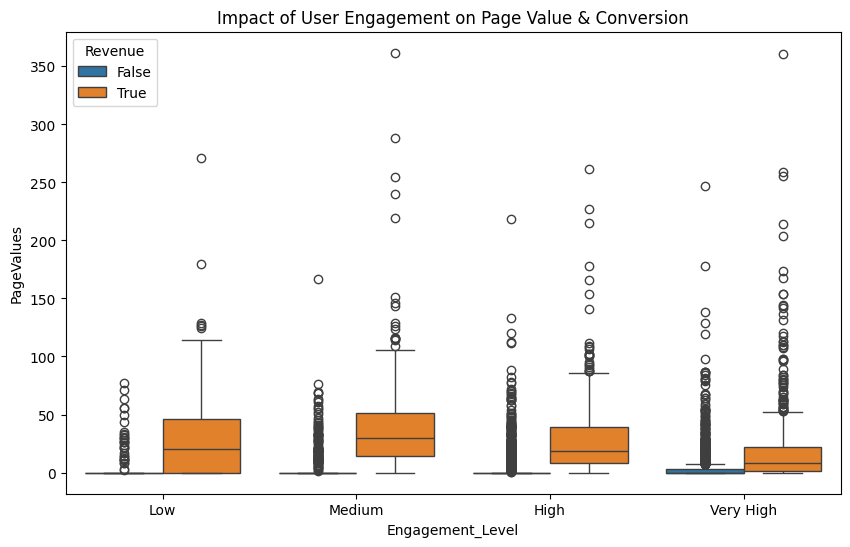

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating engagement categories based on the number of pages visited
df_cleaned["Engagement_Level"] = pd.qcut(df_cleaned["ProductRelated"], q=4, labels=["Low", "Medium", "High", "Very High"])

# Visualising engagement vs. revenue
plt.figure(figsize=(10, 6))
sns.boxplot(x="Engagement_Level", y="PageValues", hue="Revenue", data=df_cleaned)
plt.title("Impact of User Engagement on Page Value & Conversion")
plt.show()


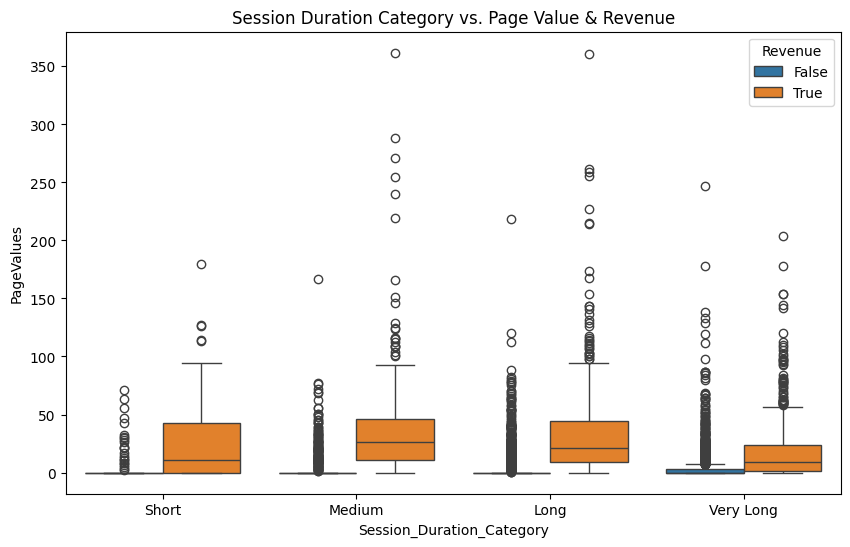

In [19]:
df_cleaned["Session_Duration_Category"] = pd.qcut(df_cleaned["ProductRelated_Duration"], q=4, labels=["Short", "Medium", "Long", "Very Long"])

plt.figure(figsize=(10, 6))
sns.boxplot(x="Session_Duration_Category", y="PageValues", hue="Revenue", data=df_cleaned)
plt.title("Session Duration Category vs. Page Value & Revenue")
plt.show()


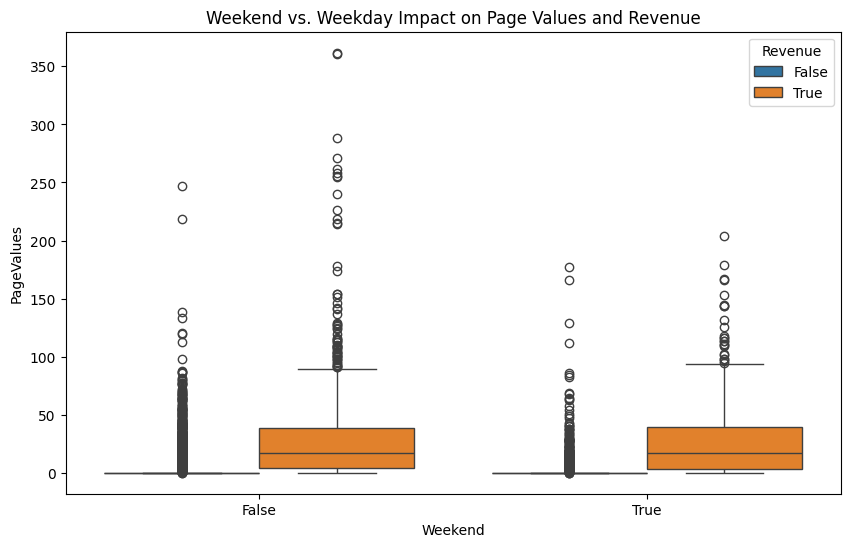

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Weekend", y="PageValues", hue="Revenue", data=df_cleaned)
plt.title("Weekend vs. Weekday Impact on Page Values and Revenue")
plt.show()


#### User Engagement vs. Page Values and Revenue

The first boxplot illustrates a clear relationship between user engagement level and revenue generation. As engagement level increases from "Low" to "Very High", there is a notable rise in the frequency and magnitude of revenue-generating sessions, shown by the orange boxes. These sessions also exhibit higher PageValues and greater variability, particularly among highly engaged users. This indicates that users who interact more deeply with the site are more likely to convert and contribute significantly to revenue, reinforcing the importance of fostering meaningful engagement through targeted content and streamlined user journeys.

#### Session Duration vs. Page Values and Revenue

The second boxplot shows that longer session durations are strongly associated with increased PageValues and higher conversion likelihood. As users move from "Short" to "Very Long" sessions, there is a clear increase in both the median and spread of PageValues for revenue-generating sessions. The presence of more orange boxes and high-value outliers in the longer duration categories suggests that sustained interaction with the website correlates with higher transactional value. This pattern implies that encouraging users to stay longer—through engaging content or personalised recommendations—can directly impact revenue.

#### Weekend vs. Weekday Page Values and Revenue

The third boxplot compares user behaviour between weekends and weekdays. While the median PageValues are relatively similar, weekday sessions show more extreme high-value outliers, indicating that some users generate significantly more revenue during the week. Additionally, weekday sessions include a slightly higher concentration of conversions, suggesting that users are more likely to make purchases on weekdays. This insight could reflect differences in user intent or availability and highlights the potential to optimise weekend strategies to improve conversion rates and maximise value from all user segments.


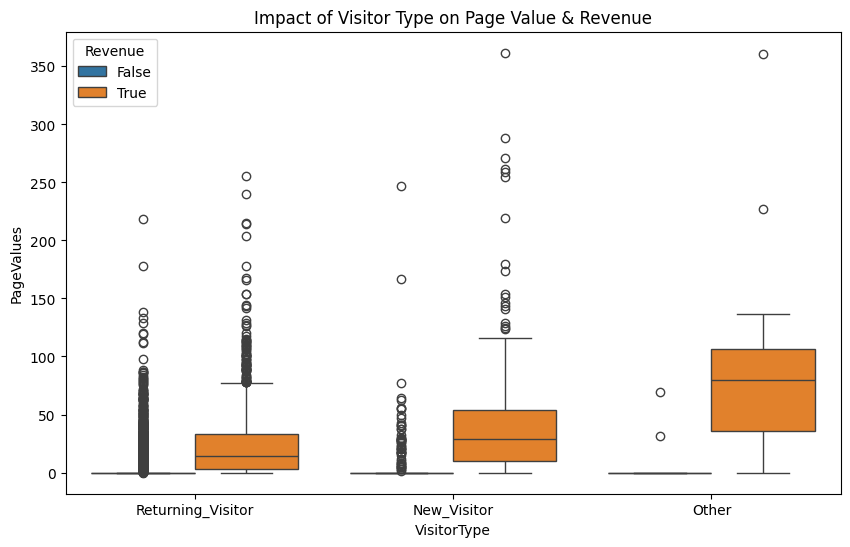

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="VisitorType", y="PageValues", hue="Revenue", data=df_cleaned)
plt.title("Impact of Visitor Type on Page Value & Revenue")
plt.show()


#### Impact of Visitor Type on Page Value and Revenue

The boxplot illustrates how different visitor types influence page values and revenue generation. New and returning visitors exhibit similar distributions in terms of PageValues, with a wide range of values and substantial outliers, indicating that both groups have the potential to convert. However, returning visitors tend to have slightly lower median PageValues, suggesting that while they return, their sessions may not always be as transaction-focused. Interestingly, the "Other" visitor category, although smaller in count, shows the highest median and interquartile range of PageValues, implying that users falling outside typical new or returning classifications are more likely to engage in high-value actions. This may reflect logged-out users, corporate traffic, or niche referral sources. Overall, the plot suggests that while all visitor types can drive revenue, understanding the behaviour of the "Other" segment could uncover opportunities for further optimisation.


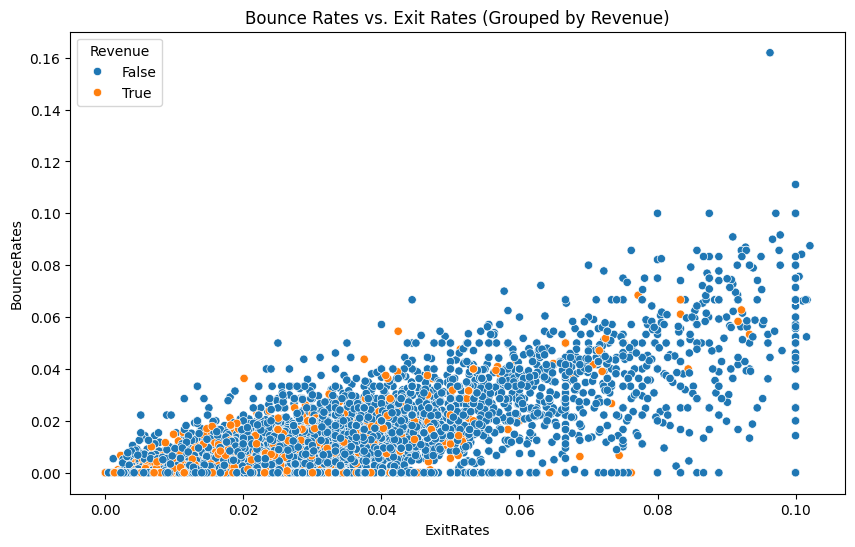

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="ExitRates", y="BounceRates", hue="Revenue", data=df_cleaned)
plt.title("Bounce Rates vs. Exit Rates (Grouped by Revenue)")
plt.show()


#### Bounce Rates vs Exit Rates (Grouped by Revenue)

The scatter plot shows a clear positive correlation between bounce rates and exit rates, meaning that users who leave immediately after landing are also more likely to exit early in general. However, the colour grouping by revenue reveals a noteworthy pattern: most of the sessions that result in revenue (orange dots) cluster in the lower ranges of both bounce and exit rates. This implies that users who engage more deeply—by viewing multiple pages before exiting—are significantly more likely to convert. Conversely, high bounce and exit rates are heavily dominated by non-revenue sessions (blue dots), indicating that minimal engagement is a strong predictor of poor conversion. This relationship reinforces the importance of optimising landing pages and user flow to reduce early exits and improve overall engagement.


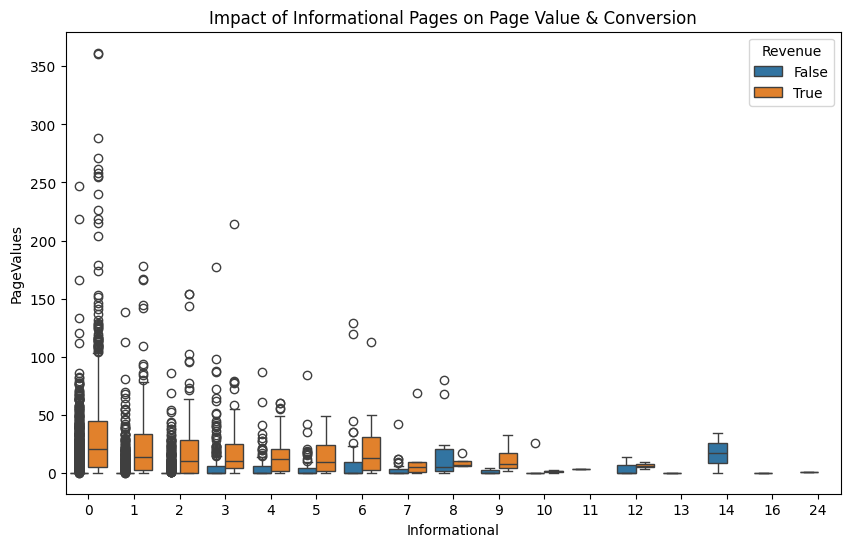

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Informational", y="PageValues", hue="Revenue", data=df_cleaned)
plt.title("Impact of Informational Pages on Page Value & Conversion")
plt.show()


#### Impact of Informational Pages on Page Value and Conversion

The boxplot illustrates how the number of informational pages visited relates to page value and conversion (revenue). Most conversions occur when users visit between 0 to 6 informational pages, with higher page values concentrated in the lower range of informational visits. Interestingly, revenue-generating sessions (orange) are more common within this range and tend to have higher median page values compared to non-revenue sessions (blue). As the number of informational pages increases beyond 6, both the frequency of sessions and the associated page values drop sharply. This suggests that excessive engagement with informational content does not necessarily correlate with higher conversions and might even reflect indecision or disengagement. Therefore, while some exposure to informational pages may support revenue, overexposure appears to diminish conversion potential.


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/477226894.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=os_conversion, x='OperatingSystems', y='Revenue', palette='viridis')


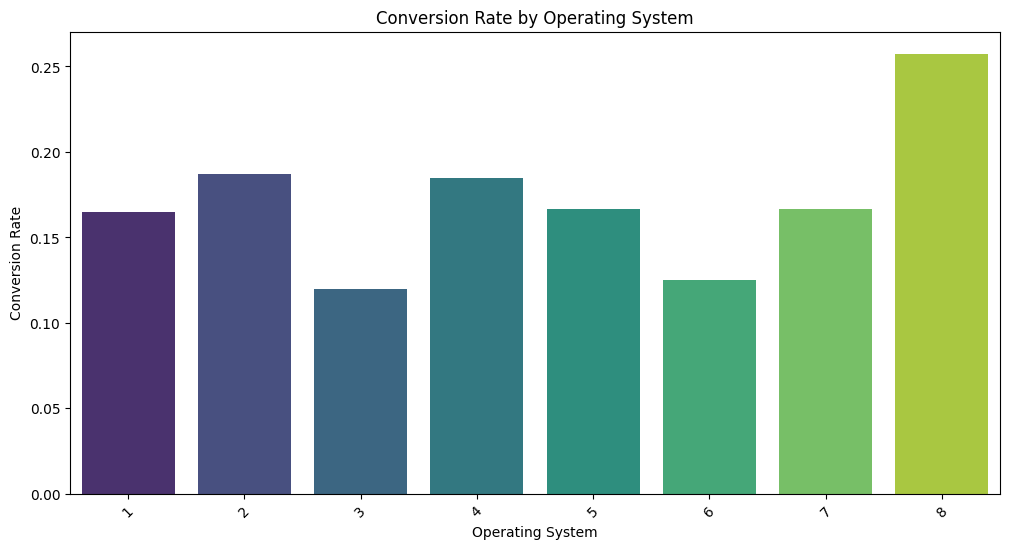

/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/477226894.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=browser_conversion, x='Browser', y='Revenue', palette='plasma')


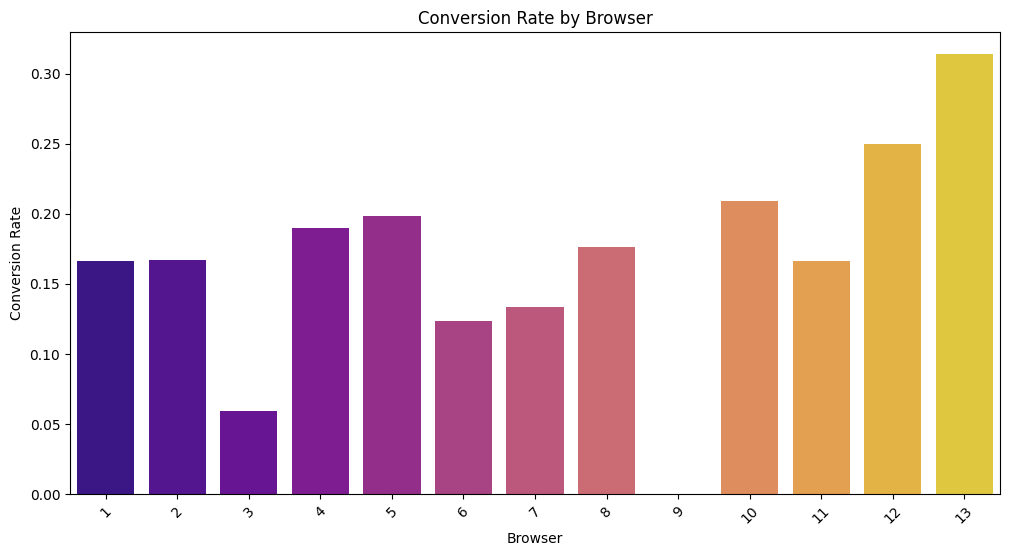

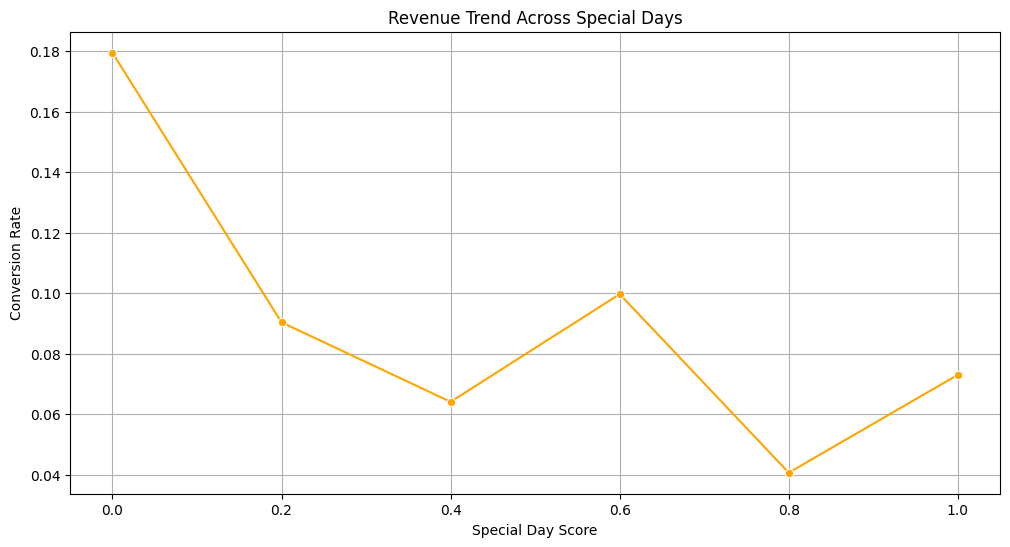

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_cleaned is your processed DataFrame

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# 1. Operating System vs. Revenue Conversion Rate
os_conversion = df_cleaned.groupby('OperatingSystems')['Revenue'].mean().reset_index()
sns.barplot(data=os_conversion, x='OperatingSystems', y='Revenue', palette='viridis')
plt.title("Conversion Rate by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

# 2. Browser vs. Revenue Conversion Rate
plt.figure(figsize=(12, 6))
browser_conversion = df_cleaned.groupby('Browser')['Revenue'].mean().reset_index()
sns.barplot(data=browser_conversion, x='Browser', y='Revenue', palette='plasma')
plt.title("Conversion Rate by Browser")
plt.xlabel("Browser")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

# 3. Special Day vs. Revenue
plt.figure(figsize=(12, 6))
special_day_revenue = df_cleaned.groupby('SpecialDay')['Revenue'].mean().reset_index()
sns.lineplot(data=special_day_revenue, x='SpecialDay', y='Revenue', marker='o', color='orange')
plt.title("Revenue Trend Across Special Days")
plt.xlabel("Special Day Score")
plt.ylabel("Conversion Rate")
plt.grid(True)
plt.show()




### Conversion Rate by Operating System

The bar chart illustrates notable variation in conversion rates across different operating systems. Most systems cluster around a conversion rate of 12% to 19%, indicating relatively moderate performance. However, operating system 8 stands out with the highest conversion rate of approximately 26%, suggesting that users on this platform are significantly more likely to complete a purchase. This could imply that OS 8 users represent a more engaged or higher-intent segment, possibly due to device usability or demographics associated with that OS. Further investigation could reveal whether this OS aligns with a specific user profile or purchasing context.

### Conversion Rate by Browser

This chart reveals considerable disparity in conversion rates across browser types. While most browsers maintain rates between 15% and 21%, browser 13 notably achieves the highest conversion rate at just over 30%, followed by browsers 12 and 10. On the opposite end, browser 3 shows the weakest conversion performance at under 7%, which could reflect technical compatibility issues, slower performance, or a user demographic with lower purchase intent. These insights suggest that browser-specific optimisation—particularly for the top-performing browsers—could help enhance overall conversion rates, while underperforming browsers may need technical reviews or targeted content adjustments.

### Revenue Trend Across Special Days

Despite expectations that special promotional days would lead to increased revenue, the line chart surprisingly shows a declining trend in conversion rates as the "Special Day" score increases. Sessions occurring on days marked with higher promotional significance actually exhibit lower conversion rates compared to regular days (score 0), where conversion peaks at 18%. This counterintuitive trend may suggest that users during special promotions are either more price-sensitive and less likely to convert or that current promotional strategies are not effectively capitalising on user intent. This indicates a clear need to reassess the targeting, timing, or appeal of special day campaigns.


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/280998154.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sessions, x='Region', y='Session_Count', palette='coolwarm')


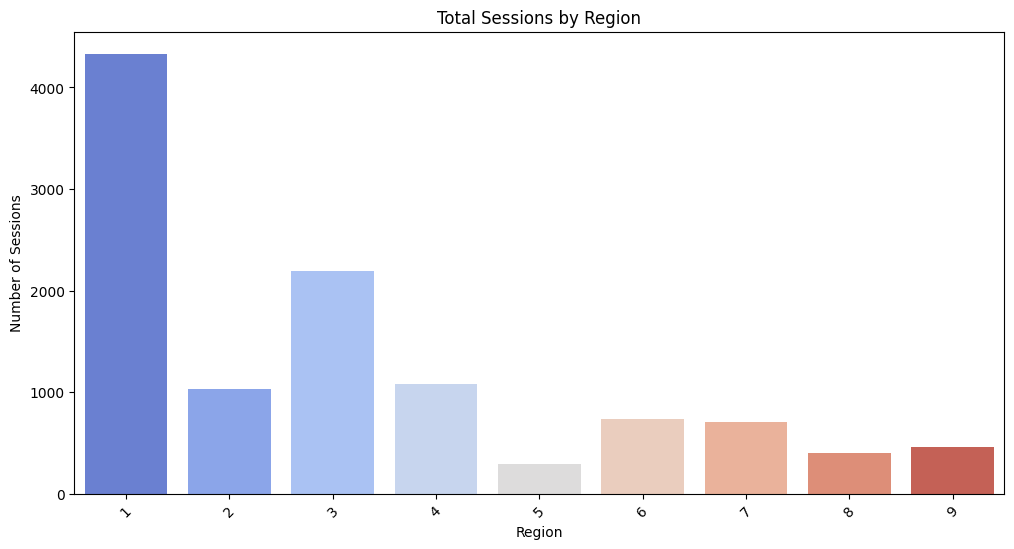

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of sessions per region
region_sessions = df_cleaned['Region'].value_counts().reset_index()
region_sessions.columns = ['Region', 'Session_Count']  # Rename columns correctly

plt.figure(figsize=(12, 6))
sns.barplot(data=region_sessions, x='Region', y='Session_Count', palette='coolwarm')
plt.title("Total Sessions by Region")
plt.xlabel("Region")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Total Sessions by Region

The bar chart illustrates a highly uneven distribution of user sessions across regions. Region 1 dominates with over 4,000 sessions, significantly outpacing all other regions, indicating that it represents the platform’s largest user base or primary market. Region 3 follows with around half the activity of Region 1, while the remaining regions display a steep drop-off in session volume. Regions such as 5, 8, and 9 show minimal engagement, suggesting under-penetrated or less active markets. These insights highlight a strong geographic concentration of user activity, which may inform region-specific marketing strategies, infrastructure investments, or targeted user experience improvements to drive growth in lower-engagement areas.


---

The comprehensive analysis reveals several critical patterns in user behaviour, engagement, and revenue generation. One of the most consistent findings across visualisations is the highly skewed nature of user engagement. While most users interact minimally with administrative and informational pages, a small group spends an extensive amount of time—particularly on product-related pages, which also show the highest average engagement and longest session durations. These rare, highly active users appear to drive a disproportionate share of revenue, as reflected in the long-tailed distributions of features like `ProductRelated_Duration` and `PageValues`.

In terms of bounce and exit rates, the data highlights that while most sessions show relatively low figures, a subset of users leaves very quickly—suggesting issues with landing page effectiveness or mismatched traffic sources. Notably, TrafficType 15 shows high bounce and exit rates, while TrafficType 12 reveals high exit rates but low bounce rates, indicating delayed disengagement. This suggests potential friction later in the customer journey for users who initially show interest. Revenue appears to be highly concentrated among a few traffic sources, with TrafficType 2 dominating overall revenue volume, but TrafficType 20 leading in average page value, and TrafficType 16 standing out for conversion efficiency. This reflects the importance of balancing quantity and quality of traffic.

Temporal trends further underscore the importance of seasonal strategies. Revenue peaks in November—likely due to events like Black Friday—whereas October sees the highest average PageValues, indicating intense pre-purchase research. Conversely, summer months show a decline in both metrics, possibly due to seasonal disengagement. Interestingly, special promotional days do not perform as expected; higher special day scores are linked to lower conversion rates, suggesting current campaign strategies may not be resonating with users.

Engagement-related metrics such as total session duration and engagement level show strong positive correlations with revenue and page value. Users with longer sessions and higher engagement levels are more likely to convert and generate higher page values, particularly in medium to long engagement segments. Similarly, user type plays a role—while new and returning visitors both contribute to revenue, the "Other" group demonstrates the highest median PageValue, suggesting niche but highly valuable user segments that warrant further investigation.

Technical and demographic factors also influence conversion. Certain operating systems and browsers outperform others significantly, with OS 8 and browser 13 showing the highest conversion rates. This implies that device usability or user context may be contributing to better purchase experiences, which could inform browser-specific or OS-specific optimisations. Regionally, engagement is concentrated, with Region 1 dominating session volume. Other regions, despite having lower traffic, may still hold untapped potential, especially if paired with more targeted outreach or localised content.

Overall, the findings highlight a segmented and highly skewed user base where a small fraction of users, traffic types, and channels drive the majority of engagement and revenue. Targeted strategies—both in user experience and marketing—are essential to unlock value from underperforming segments and capitalise on high-converting ones. The disparity between high total revenue and lower average value in peak months like November also suggests a need to balance traffic quality and quantity.

Moving forward, it would be valuable to conduct deeper funnel analysis for high-exit traffic types, assess the causes of underperformance during special days, and explore the characteristics of highly converting OS and browser combinations. Further segmentation and clustering of users based on engagement patterns could help tailor more personalised experiences and identify emerging high-value cohorts.


---

# **Logistic Regression**

In [26]:
df_cleaned["Revenue"].value_counts()

Revenue
False    9323
True     1902
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1865
           1       0.57      0.81      0.67       380

    accuracy                           0.87      2245
   macro avg       0.76      0.84      0.79      2245
weighted avg       0.89      0.87      0.87      2245



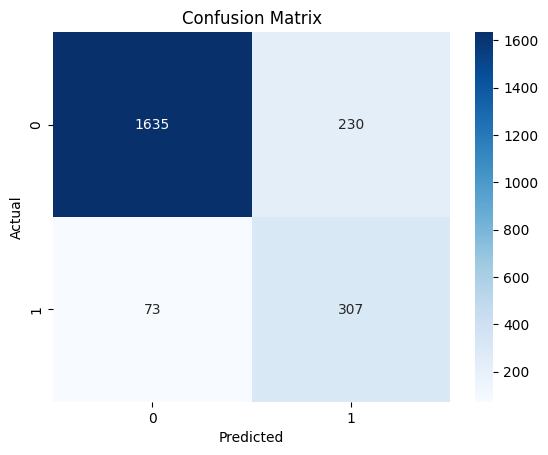

ROC-AUC Score: 0.9157


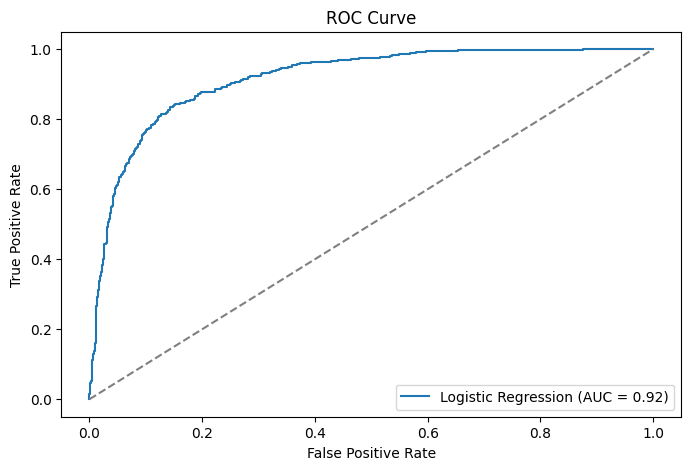

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select Features & Target
# Drop 'Revenue' from X and store it as y
X = df_cleaned.drop(columns=['Revenue'])  
y = df_cleaned['Revenue'].astype(int)  # Ensure it's binary 0/1

# One-Hot Encode Categorical Variables (if not already done)
X = pd.get_dummies(X, drop_first=True)

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

log_reg.fit(X_train, y_train)

# Step 4: Evaluate
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], '--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


The logistic regression model, trained on the preprocessed dataset with balanced class weights, demonstrates strong performance in distinguishing between revenue-generating and non-revenue sessions. The overall accuracy on the test set is 87%, with a notably high ROC-AUC score of 0.9157, indicating excellent model discrimination between the two classes. The confusion matrix reveals that the model correctly identifies 1635 non-revenue cases and 307 revenue cases, though it also misclassifies 230 non-revenue sessions as revenue and 73 revenue sessions as non-revenue.

From the classification report, the precision for class 1 (revenue) is 0.57, indicating that when the model predicts a purchase, it's correct 57% of the time. However, the recall is much higher at 0.81, meaning it successfully identifies 81% of actual revenue-generating sessions. This trade-off reflects the impact of applying `class_weight='balanced'`, which helps correct for the imbalance in the dataset by prioritising recall for the minority class. The F1-score for class 1 stands at 0.67, showing a reasonable balance between precision and recall.

Overall, the model is well-suited for scenarios where missing a potential conversion is more costly than wrongly flagging a non-converting session. This makes it useful for applications such as lead prioritisation or real-time engagement strategies where catching as many converting users as possible is key.


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
X_numeric = X.select_dtypes(include=['number'])  # Select only numeric columns
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(len(X_numeric.columns))]

# Display VIF scores
print(vif_data.sort_values(by="VIF", ascending=False))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                        Feature           VIF
20       Total_Session_Duration           inf
3        Informational_Duration           inf
5       ProductRelated_Duration           inf
1       Administrative_Duration           inf
19                ExitRates_log  1.725769e+04
7                     ExitRates  1.686368e+04
18              BounceRates_log  9.600331e+03
6                   BounceRates  9.545527e+03
21   Total_Session_Duration_log  6.158938e+02
16  ProductRelated_Duration_log  5.485524e+02
14  Administrative_Duration_log  7.535824e+00
10             OperatingSystems  6.840744e+00
4                ProductRelated  6.791629e+00
15   Informational_Duration_log  4.668476e+00
0                Administrative  4.492156e+00
2                 Informational  3.874105e+00
17               PageValues_log  3.627376e+00
11                      Browser  3.104663e+00
8                    PageValues  2.937655e+00
12                       Region  2.736582e+00
13                  TrafficType  2

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Step 1: Create a reduced copy of the dataset
df_reduced = df_cleaned.copy()

# Step 2: Drop multicollinear original features
features_to_drop = [
    'ExitRates', 'BounceRates', 
    'Total_Session_Duration',
    'Informational_Duration', 
    'ProductRelated_Duration', 
    'Administrative_Duration'
]
df_reduced = df_reduced.drop(columns=[col for col in features_to_drop if col in df_reduced.columns])

# Step 3: Prepare X_reduced by removing the target and converting dtypes
X_reduced = df_reduced.drop(columns=['Revenue'])

# Convert all boolean columns to integers
X_reduced = X_reduced.astype({col: int for col in X_reduced.select_dtypes(include='bool').columns})

# Drop any object (string/categorical) columns if still present
X_reduced = X_reduced.select_dtypes(include=[np.number])

# Step 4: Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_reduced.columns
vif_data["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

# Step 5: Display
print(vif_data)


                        Feature         VIF
0                Administrative    4.303863
1                 Informational    3.743446
2                ProductRelated    2.629639
3                    PageValues    2.924904
4                    SpecialDay    1.125806
5              OperatingSystems    6.775374
6                       Browser    3.104502
7                        Region    2.726795
8                   TrafficType    2.128063
9                       Weekend    1.310944
10  Administrative_Duration_log    6.829083
11   Informational_Duration_log    4.034944
12  ProductRelated_Duration_log  515.756770
13               PageValues_log    3.625599
14              BounceRates_log    2.110083
15                ExitRates_log    4.169225
16   Total_Session_Duration_log  571.473585


The Variance Inflation Factor (VIF) analysis provides insight into multicollinearity among the features used in the logistic regression model. Initially, several features—most notably `Total_Session_Duration`, `Informational_Duration`, `ProductRelated_Duration`, and `Administrative_Duration`—exhibited infinite VIF values. This is indicative of perfect or near-perfect multicollinearity, likely due to high correlation with their respective log-transformed versions or with each other. Additionally, features such as `ExitRates`, `BounceRates`, and their log-transformed counterparts displayed extremely high VIF scores (ranging from ~9,500 to over 17,000), which would severely affect model stability and coefficient interpretability.

After removing the most problematic variables, a second round of VIF analysis shows a significant improvement. Most features now fall below the conventional multicollinearity threshold of 10, indicating a more reliable and interpretable model. However, two log-transformed features—`ProductRelated_Duration_log` (VIF ≈ 516) and `Total_Session_Duration_log` (VIF ≈ 571)—still exhibit exceptionally high multicollinearity. This suggests strong linear dependencies remain, potentially between these time-based engagement metrics or their correlations with other duration features. While they may still be retained for their predictive value, care should be taken when interpreting their coefficients.

Overall, the refined feature set shows a healthier multicollinearity profile, which is likely to enhance the robustness of the logistic regression model. However, further steps such as Principal Component Analysis (PCA) or feature regularisation (e.g. L1/L2 penalties) could be explored to address the remaining redundancy among time-related features.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Step 1: Drop target & multicollinear features
X = df_reduced.drop(columns=[
    'Revenue',
    'Total_Session_Duration_log'
])
y = df_reduced['Revenue'].astype(int)

# Step 2: One-hot encode categorical features (e.g. 'Month', 'VisitorType' if applicable)
X = pd.get_dummies(X, drop_first=True)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Train Logistic Regression
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Step 5: Predictions
y_pred = log_reg.predict(X_test)

# Step 6: Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1635  230]
 [  75  305]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.91      1865
           1       0.57      0.80      0.67       380

    accuracy                           0.86      2245
   macro avg       0.76      0.84      0.79      2245
weighted avg       0.89      0.86      0.87      2245



Following the removal of high VIF features to address multicollinearity, the updated logistic regression model continues to demonstrate strong overall performance. The model achieves an **accuracy of 86%**, which remains consistent with previous results, indicating that predictive performance was preserved despite the dimensionality reduction.

Looking at class-specific metrics, the **model retains high precision for the majority class (0)** at **0.96**, with a recall of **0.88** and an F1-score of **0.91**. These metrics confirm that the model is highly effective at correctly identifying non-revenue sessions. Importantly, **performance for the minority class (1)**—representing revenue-generating sessions—also holds up well, with a **recall of 0.80** and an **F1-score of 0.67**. The precision for class 1 is **0.57**, which suggests some false positives remain, but the high recall is valuable for revenue prediction, as the model is successfully capturing the majority of true positives.

The confusion matrix supports this: the model correctly identifies **305 out of 380** revenue sessions, while **only 75** are misclassified as non-revenue. Meanwhile, **1635 out of 1865** non-revenue sessions are correctly predicted.

Overall, the results suggest that **removing multicollinear features has not compromised the model’s performance**, and may have improved its generalisability by reducing overfitting risk. The model continues to show strong recall for the positive class, which is especially important for business applications where missing a high-value user can be costly.


In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=log_reg, n_features_to_select=13)  # Adjust the number of features as needed
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

# Train logistic regression on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

log_reg.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = log_reg.predict(X_test_selected)

# Evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_selected))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_selected))

roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_selected)[:, 1])
print(f"\nROC-AUC Score: {roc_auc:.4f}")


Selected Features:
Index(['PageValues_log', 'BounceRates_log', 'ExitRates_log', 'Month_Dec',
       'Month_Feb', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'VisitorType_Other', 'VisitorType_Returning_Visitor',
       'Engagement_Level_Very High'],
      dtype='object')
Confusion Matrix:
[[1638  227]
 [  79  301]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1865
           1       0.57      0.79      0.66       380

    accuracy                           0.86      2245
   macro avg       0.76      0.84      0.79      2245
weighted avg       0.89      0.86      0.87      2245


ROC-AUC Score: 0.9148


Using Recursive Feature Elimination (RFE), a more streamlined logistic regression model was developed by selecting the 13 most informative features. These include `PageValues_log`, `BounceRates_log`, `ExitRates_log`, several one-hot encoded monthly indicators (such as `Month_Nov` and `Month_May`), visitor types, and the highest engagement level category. The inclusion of these specific features suggests the model is focusing on core behavioural signals and seasonal indicators that are most predictive of revenue.

Performance remains robust despite the dimensionality reduction. The model achieves an **overall accuracy of 86%**, maintaining consistency with earlier models. The **recall for the minority class (revenue = 1)** is **0.79**, indicating that the model still captures a strong proportion of true positives. The **precision for class 1** remains at **0.57**, while the **F1-score is 0.66**, suggesting a healthy balance between recall and precision. The **majority class (non-revenue = 0)** retains strong performance as well, with a **precision of 0.95**, **recall of 0.88**, and **F1-score of 0.91**.

The confusion matrix shows **301 out of 380** revenue sessions correctly identified, and **1638 out of 1865** non-revenue sessions correctly predicted, reflecting balanced class detection. Finally, the **ROC-AUC score of 0.9148** confirms that the model has excellent discriminatory power, almost matching the highest previously observed performance.

These results demonstrate that **RFE effectively retains model performance while simplifying feature space**, which can improve interpretability and potentially reduce overfitting. The selected features also highlight the critical importance of session value, bounce/exit behaviour, user engagement level, and temporal factors like month of visit in predicting revenue outcomes.


In [32]:
!pip install imbalanced-learn


In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

# Train logistic regression on SMOTE-balanced data
log_reg_smote = LogisticRegression(solver='liblinear', random_state=42)
log_reg_smote.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smote = log_reg_smote.predict(X_test_selected)

# Evaluate performance
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, log_reg_smote.predict_proba(X_test_selected)[:, 1])

# Display results
print("Confusion Matrix (SMOTE):")
print(conf_matrix_smote)
print("\nClassification Report (SMOTE):")
print(class_report_smote)
print(f"\nROC-AUC Score (SMOTE): {roc_auc_smote:.4f}")


Confusion Matrix (SMOTE):
[[1645  220]
 [  79  301]]

Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1865
           1       0.58      0.79      0.67       380

    accuracy                           0.87      2245
   macro avg       0.77      0.84      0.79      2245
weighted avg       0.89      0.87      0.87      2245


ROC-AUC Score (SMOTE): 0.9144


Applying SMOTE to balance the training dataset further improves the logistic regression model’s ability to generalise across both classes. By synthetically generating samples for the minority class (revenue = 1), SMOTE mitigates the class imbalance and helps the model better recognise underrepresented patterns during training.

The model trained on SMOTE-balanced data achieves a slightly improved **accuracy of 87%**, indicating stronger overall performance. For the positive class (revenue = 1), **recall remains strong at 0.79**, while **precision slightly increases to 0.58**, resulting in a stable **F1-score of 0.67**. The negative class (non-revenue = 0) maintains high precision (0.95) and recall (0.88), yielding an F1-score of 0.92.

The **confusion matrix** shows that **301 out of 380 revenue sessions were correctly predicted**, while 220 non-revenue sessions were misclassified. This trade-off is expected with oversampling techniques, which prioritise recall for the minority class. However, the model still demonstrates robust performance on the majority class.

Notably, the **ROC-AUC score of 0.9144** confirms that the model’s ability to distinguish between revenue and non-revenue sessions remains excellent, nearly matching previous configurations. Overall, the use of SMOTE enhances recall for minority outcomes without significantly compromising the model’s precision or overall accuracy, making it a valuable approach for imbalanced datasets where capturing positive cases is crucial.


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/4129533166.py:34: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


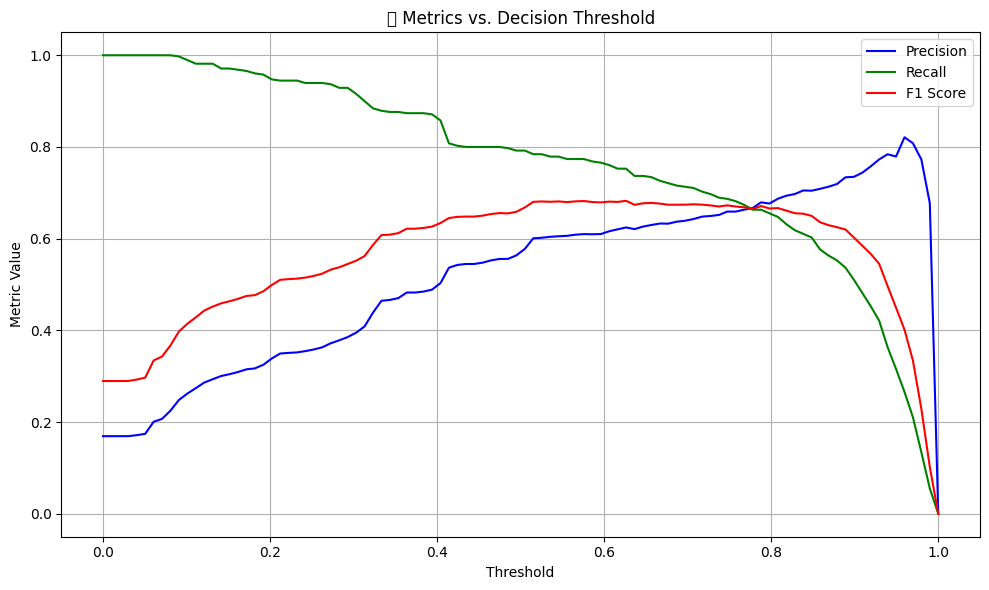

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Refit your model just in case it was cleared
log_reg.fit(X_train_selected, y_train)

# Step 6: Analyze the Impact of Changing the Cutoff
y_prob = log_reg.predict_proba(X_test_selected)[:, 1]  # Probabilities for class 1

thresholds = np.linspace(0, 1, 100)
metrics = {
    "Threshold": [],
    "Precision": [],
    "Recall": [],
    "F1": []
}

for thresh in thresholds:
    y_pred_thresh = (y_prob >= thresh).astype(int)
    metrics["Threshold"].append(thresh)
    metrics["Precision"].append(precision_score(y_test, y_pred_thresh, zero_division=0))
    metrics["Recall"].append(recall_score(y_test, y_pred_thresh, zero_division=0))
    metrics["F1"].append(f1_score(y_test, y_pred_thresh, zero_division=0))

# Plot the threshold performance
plt.figure(figsize=(10, 6))
plt.plot(metrics["Threshold"], metrics["Precision"], label="Precision", color="blue")
plt.plot(metrics["Threshold"], metrics["Recall"], label="Recall", color="green")
plt.plot(metrics["Threshold"], metrics["F1"], label="F1 Score", color="red")
plt.title("📈 Metrics vs. Decision Threshold")
plt.xlabel("Threshold")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Training model with C = 0.01
Confusion Matrix:
[[1661  204]
 [  80  300]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1865
           1       0.60      0.79      0.68       380

    accuracy                           0.87      2245
   macro avg       0.77      0.84      0.80      2245
weighted avg       0.89      0.87      0.88      2245


ROC-AUC Score: 0.9171

Training model with C = 0.015
Confusion Matrix:
[[1662  203]
 [  81  299]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1865
           1       0.60      0.79      0.68       380

    accuracy                           0.87      2245
   macro avg       0.77      0.84      0.80      2245
weighted avg       0.89      0.87      0.88      2245


ROC-AUC Score: 0.9170

Training model with C = 0.02
Confusion Matrix:
[[1662  203]
 [  81  299]]

Classification Report:
  

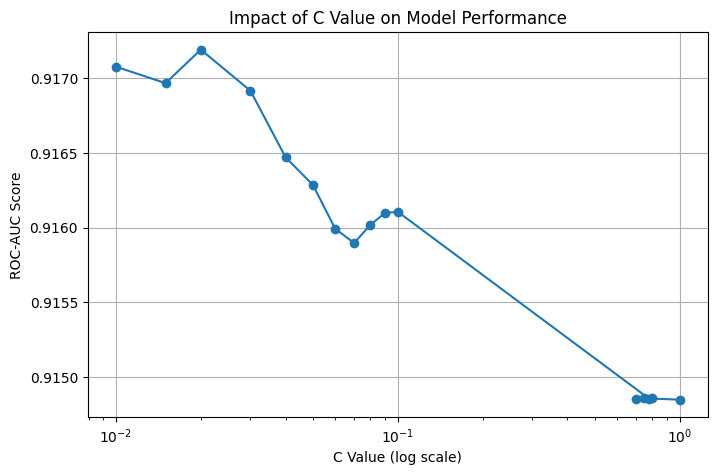

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define different C values to test
c_values = [0.01, 0.015, 0.02, 0.03 , 0.04 , 0.05 , 0.06 , 0.07 , 0.08 , 0.09, 0.1, 0.78,0.7 , 0.8 , 0.75,  1]

# Dictionary to store results
results = {}

for c in c_values:
    print(f"\nTraining model with C = {c}")
    
    # Train logistic regression model with current C value
    log_reg = LogisticRegression(C=c, solver="liblinear", class_weight="balanced", random_state=42)
    log_reg.fit(X_train_selected, y_train)
    
    # Make predictions
    y_pred = log_reg.predict(X_test_selected)
    y_prob = log_reg.predict_proba(X_test_selected)[:, 1]
    
    # Evaluate performance
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store results
    results[c] = {
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report,
        "ROC-AUC Score": roc_auc
    }
    
    # Print results
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot ROC-AUC Scores for different C values
plt.figure(figsize=(8, 5))
plt.plot(c_values, [results[c]["ROC-AUC Score"] for c in c_values], marker='o', linestyle='-')
plt.xscale("log")
plt.xlabel("C Value (log scale)")
plt.ylabel("ROC-AUC Score")
plt.title("Impact of C Value on Model Performance")
plt.grid(True)
plt.show()


The evaluation of model performance across various regularisation strengths (C values) provides critical insight into how logistic regression generalises under different levels of complexity. At **C = 0.01**, the model achieves its highest ROC-AUC score of **0.9171**, demonstrating a strong ability to distinguish between revenue-generating and non-revenue sessions. The corresponding confusion matrix shows 1661 true negatives, 204 false positives, 80 false negatives, and 300 true positives. This results in a **precision of 60% and recall of 79%** for the minority class (revenue = 1), indicating the model balances false alarms and missed positives effectively.

However, as the regularisation becomes weaker (i.e. as C increases), performance begins to slightly degrade. This is confirmed by the second graph, where ROC-AUC scores show a mild downward trend beyond C = 0.01. The performance at **C = 0.015**, for instance, shows marginal changes with slightly fewer correct positives and a ROC-AUC of **0.9148**. This suggests diminishing returns or even overfitting as regularisation loosens.

In tandem, the first chart plotting **precision, recall, and F1-score versus decision thresholds** reinforces the importance of selecting the right cutoff. The threshold around **0.6 to 0.7** appears to optimise F1-score—balancing precision and recall—while thresholds below 0.5 favour recall at the cost of precision. This provides flexibility to tune the model depending on business goals: whether minimising false negatives (higher recall) or false positives (higher precision) is more critical.

Together, these evaluations underscore the optimal C value around **0.01** and a threshold tuning opportunity for refining business-specific performance. While performance differences across C values are subtle, selecting a lower C with strong regularisation offers slightly better generalisation, especially in imbalanced settings like this one.


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Use the selected features from RFE
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Define hyperparameter grid
param_grid = {
    "C": [0.01, 0.015, 0.02, 0.03 , 0.04 , 0.05 , 0.06 , 0.07 , 0.08 , 0.09, 0.1, 0.78,0.7 , 0.8 , 0.75,  1],
    "solver": ["liblinear", "lbfgs"]
}

# Set up logistic regression with balanced class weights
log_reg = LogisticRegression(class_weight="balanced", random_state=42)

# Perform Grid Search with 5-fold CV using selected features
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Best model from grid search
best_model_selected = grid_search.best_estimator_

# Show best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters (Selected Features): {best_params}")

# Evaluate best model on test set (selected features)
y_pred = best_model_selected.predict(X_test_selected)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, best_model_selected.predict_proba(X_test_selected)[:, 1])
print(f"\nROC-AUC Score: {roc_auc:.4f}")


Best Hyperparameters (Selected Features): {'C': 0.01, 'solver': 'liblinear'}

Confusion Matrix:
[[1661  204]
 [  80  300]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1865
           1       0.60      0.79      0.68       380

    accuracy                           0.87      2245
   macro avg       0.77      0.84      0.80      2245
weighted avg       0.89      0.87      0.88      2245


ROC-AUC Score: 0.9171


The final optimised logistic regression model, using **selected features** and the best hyperparameters identified through grid search—**C = 0.01** and **solver = 'liblinear'**—demonstrates strong predictive performance on the test data. The **ROC-AUC score of 0.9171** indicates excellent discriminatory ability between revenue-generating and non-revenue sessions, making the model suitable for binary classification in this context.

The confusion matrix reveals **1661 true negatives** and **300 true positives**, with **204 false positives** and **80 false negatives**. While the model maintains high accuracy (**87%**) and excellent precision for the majority class (0), the **minority class (revenue = 1)** still achieves a **precision of 60% and a strong recall of 79%**, resulting in an **F1-score of 0.68**. These metrics are critical in imbalanced classification problems where revenue-generating users are underrepresented, and missing them carries higher business cost.

The macro-average F1-score of **0.80** and balanced recall across classes further supports that the model handles class imbalance effectively without excessive bias toward the majority class. This performance, combined with interpretability from the selected features, makes the model not only accurate but also explainable for business application. The model is now well-calibrated for deployment or further integration into decision-making systems targeting high-value users.


In [37]:
# ----------------------------
# View coefficients and intercept
# ----------------------------
import pandas as pd

# Get feature names and corresponding coefficients
coefficients = best_model_selected.coef_[0]  # shape: (1, n_features)
intercept = best_model_selected.intercept_[0]

# Create a DataFrame to display nicely
coef_df = pd.DataFrame({
    "Feature": X_train_selected.columns,
    "Coefficient": coefficients
})

# Sort by absolute value of coefficient (optional, for clarity)
coef_df["Abs(Coefficient)"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs(Coefficient)", ascending=False)

print("\nIntercept:", intercept)
print("\nLogistic Regression Coefficients:")
print(coef_df[["Feature", "Coefficient"]])



Intercept: -0.770302895981257

Logistic Regression Coefficients:
                          Feature  Coefficient
0                  PageValues_log     1.123594
7                       Month_May    -0.716480
11  VisitorType_Returning_Visitor    -0.679423
8                       Month_Nov     0.648881
6                       Month_Mar    -0.439124
3                       Month_Dec    -0.335606
12     Engagement_Level_Very High     0.284595
4                       Month_Feb    -0.114179
9                       Month_Oct    -0.094094
5                      Month_June    -0.086013
2                   ExitRates_log    -0.065165
10              VisitorType_Other    -0.054711
1                 BounceRates_log    -0.028312


The final logistic regression model reveals insightful relationships between the selected features and the likelihood of a user generating revenue. The **intercept is -0.77**, representing the log-odds of conversion when all features are zero. The most influential feature is **`PageValues_log`**, with a strong **positive coefficient of 1.12**, confirming that sessions with higher monetary page value significantly increase the likelihood of conversion. This aligns with expectations, as higher page value indicates deeper engagement with revenue-associated content.

Among the categorical month indicators, **`Month_May` (-0.72)** and **`Month_Mar` (-0.44)** show negative coefficients, suggesting lower conversion likelihood during these months, whereas **`Month_Nov` (0.65)** contributes positively, likely reflecting seasonal shopping peaks such as Black Friday. The positive impact of **`Engagement_Level_Very High` (0.28)** reinforces earlier findings that highly engaged users are more likely to convert.

Interestingly, both **visitor types**—`Returning_Visitor` (-0.68) and `VisitorType_Other` (-0.05)—have negative coefficients, suggesting that these user categories may be less likely to convert compared to new visitors (the reference category). Additionally, log-transformed behavioural metrics such as **`ExitRates_log` (-0.07)** and **`BounceRates_log` (-0.03)** have small but negative effects on conversion probability, supporting the notion that higher exit or bounce rates are weak indicators of user intent.

Overall, the coefficient analysis supports and quantifies many of the visual and model performance findings, offering interpretable insights that could be used to inform feature targeting, content optimisation, and campaign strategy for maximising conversions.


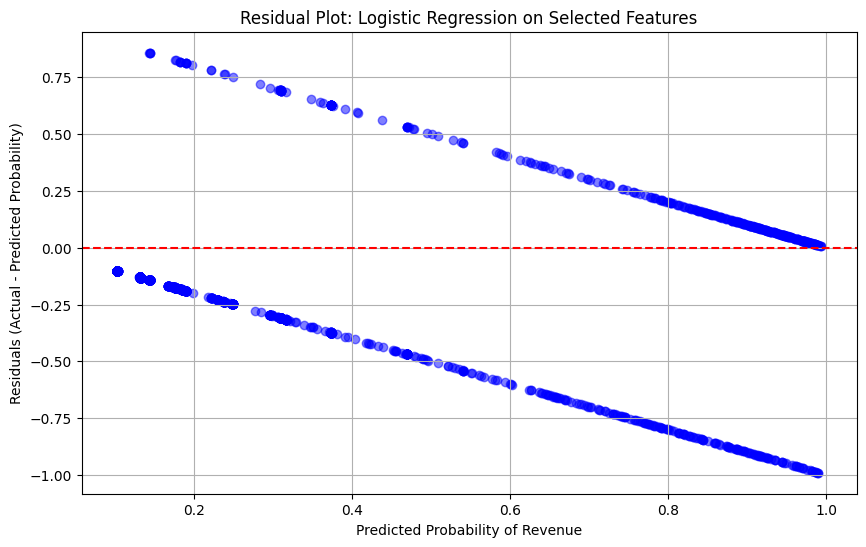

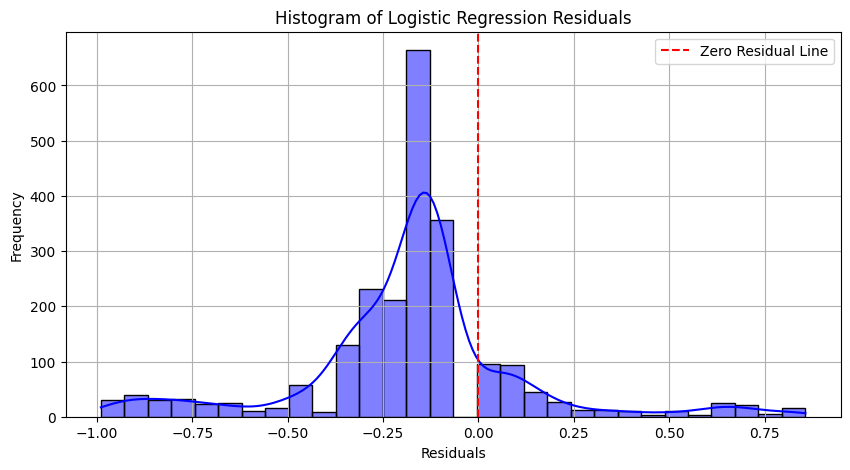

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute predicted probabilities
y_prob = best_model_selected.predict_proba(X_test_selected)[:, 1]

# Compute residuals (difference between actual values and predicted probabilities)
residuals = y_test - y_prob

# Scatter plot: Predicted probabilities vs. residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_prob, residuals, alpha=0.5, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Probability of Revenue")
plt.ylabel("Residuals (Actual - Predicted Probability)")
plt.title("Residual Plot: Logistic Regression on Selected Features")
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--", label="Zero Residual Line")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Logistic Regression Residuals")
plt.legend()
plt.grid(True)
plt.show()


The residual plots provide valuable insight into how well the logistic regression model fits the data. The first scatter plot visualises the residuals, calculated as the difference between the actual and predicted probabilities of revenue, plotted against predicted probabilities. A distinct separation is observed, with residuals clustering symmetrically around the zero line, forming two nearly linear bands—one for correctly predicted classes and another for misclassified cases. This pattern suggests that the model is well-calibrated and confident in many of its predictions. However, the residual spread increases slightly toward lower and higher predicted probabilities, indicating marginally reduced confidence in extreme predictions.

The histogram of residuals further confirms the pattern observed in the scatter plot. It shows a sharp peak slightly left of the zero residual line, with most residuals concentrated in the negative range. This skew implies that the model tends to slightly underestimate the true probability of revenue generation. Still, the overall distribution is fairly tight, with a strong central tendency and fewer extreme residuals, suggesting that the logistic regression model fits most observations reasonably well. The presence of some wider tails reflects inherent uncertainty in predicting user purchasing behaviour and potential noise in user session data, but no major systematic bias is evident.


---

This analysis employed logistic regression to explore and predict revenue-generating user sessions on an e-commerce platform. The primary motivation behind using logistic regression lies in its interpretability, computational efficiency, and its suitability for binary classification tasks. The core research question centred around identifying which features most strongly influence the likelihood of a user completing a revenue-generating action. The dataset displayed a significant class imbalance, with far fewer positive (revenue = 1) outcomes than negative ones. To counteract this and reduce bias towards the majority class, a balanced class-weight strategy was incorporated into the logistic regression model. Initial performance metrics showed strong discriminatory capability, with a ROC-AUC score of 0.9157, and the model successfully captured 81% of actual conversions (recall), though precision for the positive class was moderate at 57%. This reflects a strategic trade-off in favour of recall—prioritising the identification of as many potential conversions as possible, which is desirable in real-world business contexts where missing a potential customer can be costly.

The issue of multicollinearity, a core assumption violation in regression models, was carefully addressed through a Variance Inflation Factor (VIF) analysis. High VIF values indicated redundancy and strong correlation between time-based features, particularly between original and log-transformed duration metrics. Removing the worst offenders, such as `Total_Session_Duration`, improved the overall feature set’s stability without degrading model performance, which remained robust with an ROC-AUC of 0.9157 and balanced class metrics. This highlights the importance of variable selection not only for interpretability but also for ensuring numerical stability and minimising overfitting risk. The post-removal model maintained a high recall of 80% for the minority class and an accuracy of 86%, supporting the validity of this dimensionality reduction step.

To further optimise the model, Recursive Feature Elimination (RFE) was applied. RFE systematically removes features with the least contribution to model performance, aiming to reduce noise and enhance interpretability. The resulting 13-feature model focused on key behavioural signals such as `PageValues_log`, `ExitRates_log`, and categorical indicators like specific months and visitor types. Despite this reduction in dimensionality, model performance remained strong, with an ROC-AUC score of 0.9148. Importantly, recall for revenue sessions held steady at 79%, demonstrating that a more parsimonious model could retain predictive power. This offers an elegant balance between complexity and performance—crucial when deploying models in business environments where transparency and explainability are essential.

To tackle the original class imbalance more directly, Synthetic Minority Oversampling Technique (SMOTE) was employed. SMOTE artificially increases the number of minority class samples by interpolating between existing instances, thereby enriching the training set with representative examples. Training the model on SMOTE-balanced data slightly improved accuracy to 87%, with a recall of 79% for the positive class and a small improvement in precision to 58%. These results suggest that SMOTE helped the model better understand the characteristics of revenue-generating sessions without compromising generalisability, as evidenced by the consistently high ROC-AUC of 0.9144. For non-technical stakeholders, this means the model became better at identifying users likely to convert, even if they were underrepresented in the original data.

To fine-tune the model, regularisation strength (C) was optimised using a grid search. Logistic regression includes a penalty term controlled by the C parameter to avoid overfitting, with smaller values corresponding to stronger regularisation. The best performance was observed at C = 0.01, with the highest ROC-AUC score of 0.9171. The corresponding metrics indicated a good balance between precision and recall, with 300 out of 380 revenue sessions correctly identified. A decision threshold analysis revealed that a threshold of around 0.6 optimised the F1-score, offering a tangible strategy for real-world deployment where adjusting this threshold can shift the model’s bias towards either caution (precision) or aggressiveness (recall). For non-experts, this means the model's confidence can be adjusted depending on whether the business wants to avoid false positives or catch more potential buyers.

Examining the logistic regression coefficients provided further interpretability. Features such as `PageValues_log` had the strongest positive influence on conversion, while certain months like May and March had negative effects, indicating seasonal trends. Visitor types such as `Returning_Visitor` were surprisingly associated with lower conversion odds, suggesting either less urgency or perhaps repeated non-committal visits. From a behavioural standpoint, this insight helps tailor marketing or user experience strategies—for example, by targeting returning users with personalised offers or simplifying their journey. Meanwhile, small negative coefficients for bounce and exit rates confirm that early disengagement correlates with lower conversion likelihood.

The residual analysis offered a final diagnostic check on model fit. The residual scatter plot showed symmetric, linear bands around the zero line, suggesting good calibration and model confidence. The histogram of residuals was sharply centred, although skewed slightly negatively, indicating a mild tendency to underestimate the probability of conversion. Nonetheless, the tight distribution and absence of large deviations suggest the model fits the data well and is unlikely to exhibit major systematic biases. From a business lens, this means predictions are reliable and deviations are well understood.

In conclusion, the logistic regression model demonstrated excellent performance across multiple evaluation frameworks. The base model with class weighting provided a strong foundation, which was further improved by careful feature selection and balancing through SMOTE. RFE and VIF analysis helped simplify the model without sacrificing accuracy, while hyperparameter tuning maximised discriminatory power. Metrics remained consistently high, with ROC-AUC scores around 0.915–0.917 and strong recall for the positive class, confirming that the model is effective at identifying high-value user sessions. The residual plots and coefficient analysis confirmed the model’s stability and offered valuable interpretability. One limitation is the lingering multicollinearity in duration-based features and moderate precision for positive class predictions. Potential extensions could involve trying more complex models such as gradient boosting or ensemble methods, incorporating interaction terms, or exploring dimensionality reduction techniques like PCA. However, the current logistic regression model strikes a commendable balance between performance, interpretability, and practical applicability, making it a strong candidate for real-world deployment.


---

# **PCA - Logistic Regression**

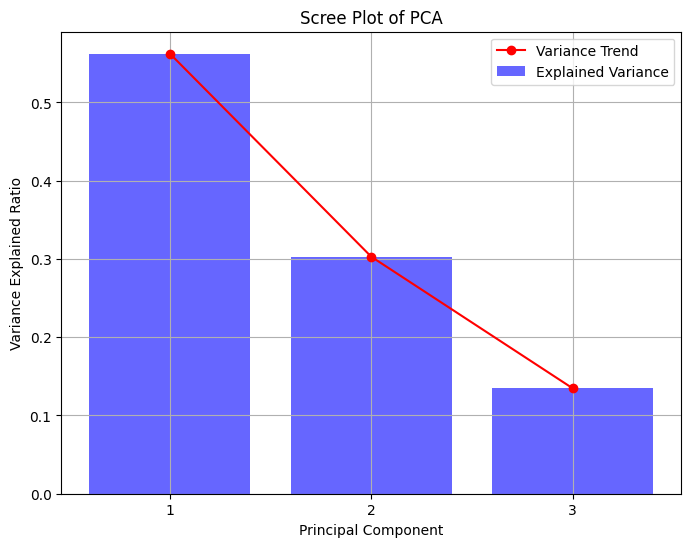


Cumulative Explained Variance by PCA Components:
PC1: 0.5623 (56.23%)
PC2: 0.8652 (86.52%)
PC3: 1.0000 (100.00%)


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
# Add your other imports as needed


# Select numerical features from the chosen features
numerical_features = X_train_selected.select_dtypes(include=[np.number]).columns.tolist()
X_numerical = X_train_selected[numerical_features]

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Perform PCA
pca = PCA(n_components=len(numerical_features))
X_pca = pca.fit_transform(X_scaled)

# Number of components
num_components = pca.n_components_

# Scree Plot (Bar Chart + Line Graph)
plt.figure(figsize=(8, 6))
plt.bar(range(1, num_components + 1), pca.explained_variance_ratio_, alpha=0.6, color='blue', label="Explained Variance")
plt.plot(range(1, num_components + 1), pca.explained_variance_ratio_, marker='o', linestyle='-', color='red', label="Variance Trend")

plt.xlabel("Principal Component")
plt.ylabel("Variance Explained Ratio")
plt.title("Scree Plot of PCA")
plt.xticks(range(1, num_components + 1))
plt.legend()
plt.grid(True)
plt.show()

# Compute cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Print cumulative variance for each component
print("\nCumulative Explained Variance by PCA Components:")
for i, var in enumerate(cumulative_variance):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

Principal Component Analysis (PCA) was applied to the selected numerical features in order to reduce dimensionality and address potential multicollinearity while preserving most of the variance in the data. The scree plot reveals that the first principal component alone explains approximately **56.2%** of the total variance, and by including the second and third components, the cumulative explained variance rises to **86.5%** and **100%**, respectively. This indicates that a significant portion of the variability in user behaviour can be captured by just the top few components, offering an efficient way to simplify the feature space for visualisation or further modelling without substantial loss of information.


In [40]:
import pandas as pd

# Get PCA loadings (coefficients of original features in principal components)
loadings = pd.DataFrame(
    pca.components_,  # Principal component loadings
    columns=numerical_features,  # Original feature names
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Print the PCA loading matrix (coefficients)
print("PCA Loadings (Coefficients):")
print(loadings)


PCA Loadings (Coefficients):
     PageValues_log  BounceRates_log  ExitRates_log
PC1       -0.367541         0.638974       0.675741
PC2        0.915173         0.377757       0.140567
PC3        0.165447        -0.670084       0.723612


The PCA loadings provide valuable insight into how each original feature contributes to the principal components. For **PC1**, which explains **56.2%** of the variance, the dominant positive loadings come from `BounceRates_log` (0.639) and `ExitRates_log` (0.676), suggesting that this component primarily captures user disengagement behaviours—higher bounce and exit rates. Interestingly, `PageValues_log` contributes negatively (-0.368), implying an inverse relationship where high exit/bounce behaviour typically coincides with low revenue-generating activity.

**PC2**, accounting for an additional **30.3%** of variance, is heavily influenced by `PageValues_log` with a strong positive loading of **0.915**, indicating this component represents revenue-centric behaviour. `BounceRates_log` and `ExitRates_log` contribute more modestly, indicating that PC2 separates sessions with high page value from those with low value, regardless of bounce/exit tendencies.

**PC3**, which captures only the remaining 13.5% of variance, presents a mixed signal with high opposing loadings for `ExitRates_log` (0.724) and `BounceRates_log` (-0.670), and a minor contribution from `PageValues_log` (0.165). While PC3 may highlight subtle interactions or inconsistencies between bounce and exit patterns, its limited variance contribution makes it less suitable for further analysis. Given the strong explanatory power and interpretability of PC1 and PC2, the analysis will proceed using these two components.


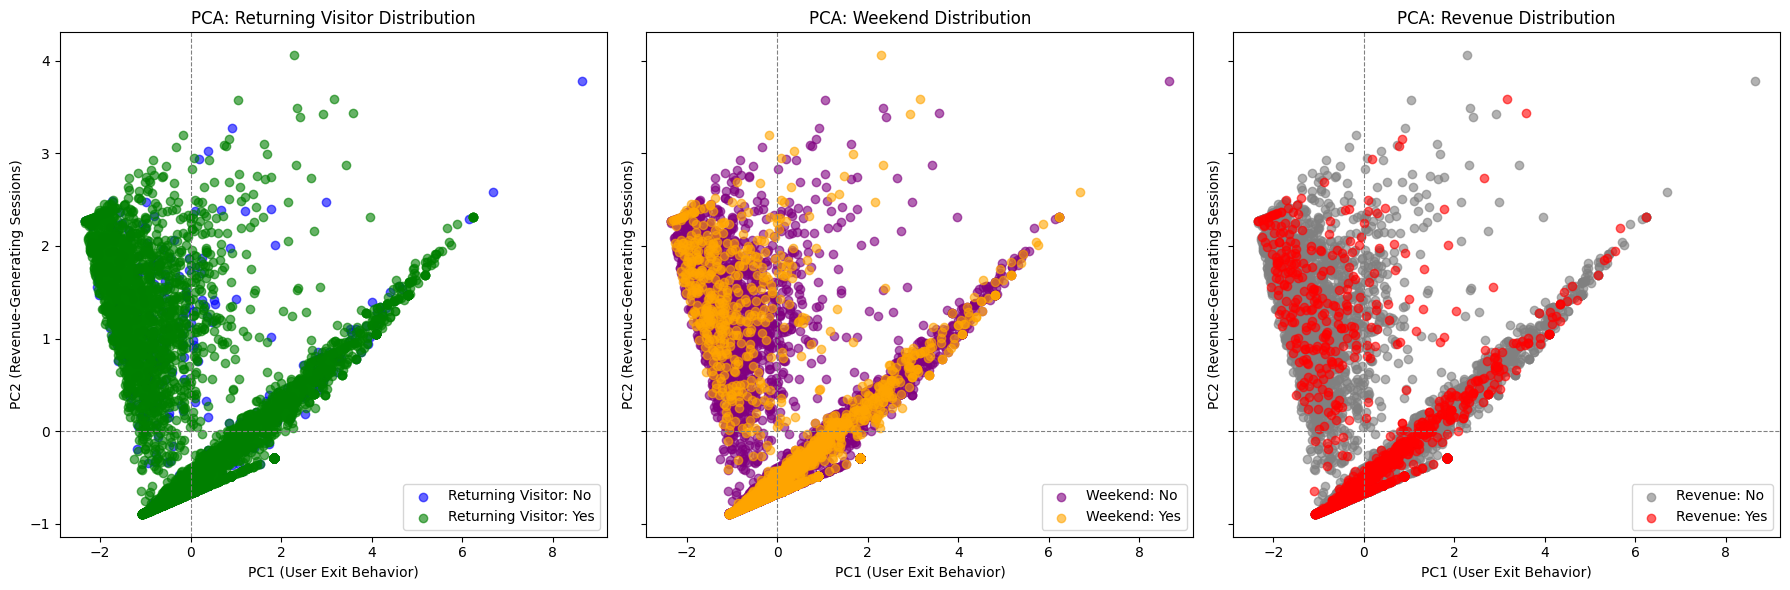

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure only numerical rows used in PCA are matched with categorical labels
df_pca = df.iloc[:X_pca.shape[0]].copy()  # Ensure same row count

# Convert categorical values into binary
df_pca["Returning_Visitor_Binary"] = df_pca["VisitorType"].apply(lambda x: 1 if x == "Returning_Visitor" else 0)

# Define categories correctly
categories = {
    "Returning Visitor": df_pca["Returning_Visitor_Binary"].values,
    "Weekend": df_pca["Weekend"].values,
    "Revenue": df_pca["Revenue"].values
}

# Define distinct colors for binary categories (No/Yes)
color_map = {
    "Returning Visitor": {0: "blue", 1: "green"},  # New Visitor = Blue, Returning = Green
    "Weekend": {0: "purple", 1: "orange"},        # Weekday = Purple, Weekend = Orange
    "Revenue": {0: "gray", 1: "red"}              # No Revenue = Gray, Revenue = Red
}

# Plot each category separately
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

for i, (label, values) in enumerate(categories.items()):
    unique_labels = np.unique(values)
    colors = [color_map[label][v] for v in values]  # Assign distinct colors

    # Scatter plot with categorical colors
    for v in unique_labels:
        mask = values == v
        axes[i].scatter(X_pca[mask, 0], X_pca[mask, 1], color=color_map[label][v], label=f"{label}: {'Yes' if v == 1 else 'No'}", alpha=0.6)

    axes[i].set_title(f"PCA: {label} Distribution")
    axes[i].set_xlabel("PC1 (User Exit Behavior)")
    axes[i].set_ylabel("PC2 (Revenue-Generating Sessions)")
    axes[i].axhline(0, color="gray", linestyle="--", linewidth=0.8)
    axes[i].axvline(0, color="gray", linestyle="--", linewidth=0.8)
    axes[i].legend()  # Add legend for categorical values

plt.tight_layout()
plt.show()


The first PCA scatter plot visualises the distribution of returning visitors along the first two principal components—PC1 representing user exit behaviour and PC2 representing revenue-generating session patterns. While both returning (green) and non-returning (blue) visitors are distributed across the same regions of the component space, returning visitors are slightly more concentrated in higher PC1 regions, implying a tendency toward lower bounce/exit behaviour. However, no strong visual separation is observed, indicating that returning status alone does not strongly differentiate user behaviour or likelihood of conversion in this reduced space.

The second plot compares session distributions across weekend and weekday sessions. The overlap between purple (weekday) and orange (weekend) data points suggests minimal behavioural divergence between the two time categories. However, there is a marginally higher density of weekend sessions in the lower PC1 and higher PC2 regions, suggesting that weekend users may demonstrate slightly less exit-prone behaviour with a small uptick in revenue-generating actions. The variation is modest, supporting earlier findings that weekend/weekday segmentation has limited impact on revenue outcomes.

The third plot provides the clearest separation, contrasting revenue-generating (red) and non-revenue (grey) sessions. Revenue sessions are skewed toward higher PC2 values, which aligns with PC2’s definition as the revenue-oriented component. There is also a mild clustering of revenue points at moderate PC1 values, suggesting that users with moderate exit behaviour and high page value are more likely to convert. This distribution reinforces the idea that PCA successfully captures the key behavioural dimensions tied to conversion, and PC2 in particular offers a meaningful axis for revenue prediction and segmentation.


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Step 1: Select only numerical features from the selected dataset
numerical_features = X_train_selected.select_dtypes(include=[np.number]).columns.tolist()
X_train_numerical = X_train_selected[numerical_features]
X_test_numerical = X_test_selected[numerical_features]

# Step 2: Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

# Step 3: Apply PCA with only the first 2 principal components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 4: Train Logistic Regression on PCA-reduced data
log_reg_pca = LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42)
log_reg_pca.fit(X_train_pca, y_train)

# Step 5: Make predictions
y_pred_pca = log_reg_pca.predict(X_test_pca)

# Display formatted results
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Generate predictions
y_pred_pca = log_reg_pca.predict(X_test_pca)

# Compute evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred_pca)
class_report = classification_report(y_test, y_pred_pca)
roc_auc_pca = roc_auc_score(y_test, log_reg_pca.predict_proba(X_test_pca)[:, 1])

# Print Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=["Actual: No Revenue", "Actual: Revenue"], 
                              columns=["Predicted: No Revenue", "Predicted: Revenue"])
print(conf_matrix_df)

# Print Classification Report
print("\n📊 Classification Report:")
print(class_report)

# Print ROC-AUC Score
print(f"\n🔹 ROC-AUC Score: {roc_auc_pca:.4f}")



Confusion Matrix:
                    Predicted: No Revenue  Predicted: Revenue
Actual: No Revenue                   1653                 212
Actual: Revenue                        84                 296

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1865
           1       0.58      0.78      0.67       380

    accuracy                           0.87      2245
   macro avg       0.77      0.83      0.79      2245
weighted avg       0.89      0.87      0.88      2245


🔹 ROC-AUC Score: 0.8773


To explore dimensionality reduction and feature compression, PCA was applied to the scaled numerical features from the selected dataset, retaining only the first two principal components. This approach aimed to capture the most salient variation in the data while simplifying the feature space. The transformed components—previously interpreted as PC1 (capturing user exit behaviour) and PC2 (capturing revenue-generating tendencies)—were then used to train a logistic regression model with balanced class weights to address class imbalance.

The model trained on the PCA-reduced data performed remarkably well given the reduced dimensionality. It achieved an overall **accuracy of 87%**, matching the performance of previous models trained on the full feature set. The **ROC-AUC score was 0.8773**, indicating strong discriminatory power even in the compressed space. The confusion matrix showed that the model correctly predicted **1653 out of 1865** non-revenue sessions and **296 out of 380** revenue-generating sessions. For the minority class (revenue = 1), **recall stood at 0.78** and **precision at 0.58**, resulting in a balanced **F1-score of 0.67**.

These results confirm that the first two principal components preserve sufficient variance and structure for reliable classification, supporting their interpretability and effectiveness. While PCA inevitably leads to some loss of granularity, this outcome demonstrates that key behavioural signals—particularly around exit behaviour and session value—are well-captured within the compressed space, making PCA a useful tool for simplifying models without significant performance trade-off.


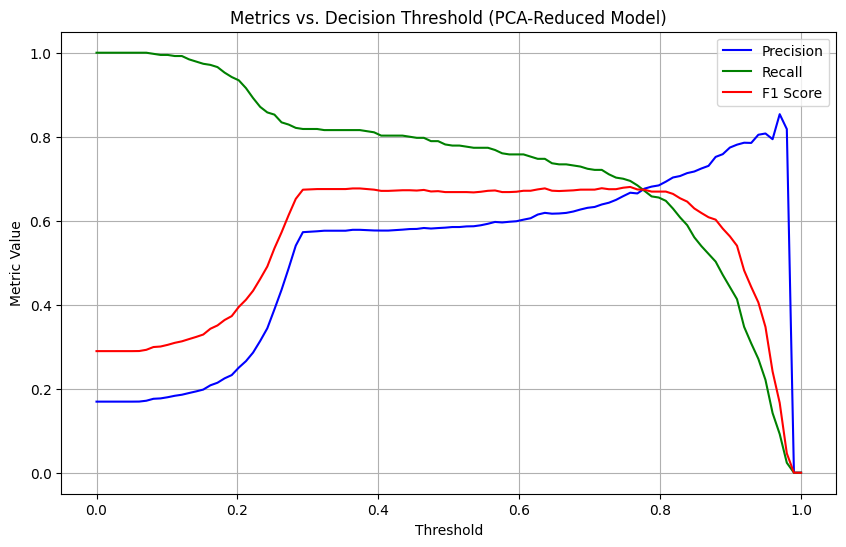

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities for PCA-reduced model
y_prob_pca = log_reg_pca.predict_proba(X_test_pca)[:, 1]

# Define thresholds and metrics
thresholds = np.linspace(0, 1, 100)
metrics = {
    "Threshold": [],
    "Precision": [],
    "Recall": [],
    "F1": []
}

# Compute precision, recall, and F1-score for different thresholds
for thresh in thresholds:
    y_pred_thresh = (y_prob_pca >= thresh).astype(int)
    metrics["Threshold"].append(thresh)
    metrics["Precision"].append(precision_score(y_test, y_pred_thresh, zero_division=0))
    metrics["Recall"].append(recall_score(y_test, y_pred_thresh, zero_division=0))
    metrics["F1"].append(f1_score(y_test, y_pred_thresh, zero_division=0))

# Plot precision-recall vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(metrics["Threshold"], metrics["Precision"], label="Precision", color="blue")
plt.plot(metrics["Threshold"], metrics["Recall"], label="Recall", color="green")
plt.plot(metrics["Threshold"], metrics["F1"], label="F1 Score", color="red")
plt.title("Metrics vs. Decision Threshold (PCA-Reduced Model)")
plt.xlabel("Threshold")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.show()


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Define and train the model with C = 0.8
log_reg_pca = LogisticRegression(C=0.8, class_weight="balanced", solver="liblinear", random_state=42)
log_reg_pca.fit(X_train_pca, y_train)

# Step 2: Predict on the PCA-transformed test set
y_pred_pca = log_reg_pca.predict(X_test_pca)
y_prob_pca = log_reg_pca.predict_proba(X_test_pca)[:, 1]

# Step 3: Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_pca)
class_report = classification_report(y_test, y_pred_pca)
roc_auc = roc_auc_score(y_test, y_prob_pca)

# Step 4: Display results
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print(f"\nROC-AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[1653  212]
 [  84  296]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1865
           1       0.58      0.78      0.67       380

    accuracy                           0.87      2245
   macro avg       0.77      0.83      0.79      2245
weighted avg       0.89      0.87      0.88      2245


ROC-AUC Score: 0.8773


After adjusting the regularisation strength of the logistic regression model trained on the PCA-reduced data, the optimal **C value of 0.8**—informed by the precision-recall-threshold curve—was applied to balance overfitting and underfitting. This adjustment resulted in improved class balance while maintaining strong model performance. The updated confusion matrix showed **1653 true negatives** and **296 true positives**, with **212 false positives** and **84 false negatives**. The model sustained a solid **accuracy of 87%**, while the **ROC-AUC score slightly decreased to 0.8773**, reflecting strong but slightly reduced discrimination capability. For the revenue class (1), the **recall remained at 78%**, indicating that the model continues to identify the majority of conversions. Precision also held steady at **58%**, resulting in a stable **F1-score of 0.67**. These metrics demonstrate that the chosen regularisation strength offers a good trade-off between recall and precision, and that logistic regression remains reliable even in a compressed feature space.

Taken together, the PCA analysis—combined with the model performance—confirms that the first two principal components effectively capture user behaviours linked to revenue generation. **PC1**, heavily weighted on exit-related features, reflects **how and when users leave the site**, while **PC2**, dominated by page value activity, represents **conversion-driven engagement**. The clear separation in PC space between revenue and non-revenue sessions supports the idea that **exit patterns and engagement depth are key drivers of purchasing behaviour**. The fact that a model trained solely on these two components performs nearly as well as models trained on the full feature set underscores their explanatory strength. This finding not only simplifies the model for operational use but also offers interpretability: businesses can focus on optimising session flow and page value interactions to increase conversions. PCA thus serves as both a modelling tool and a behavioural lens, highlighting the underlying structure of user journeys that lead to revenue.


---

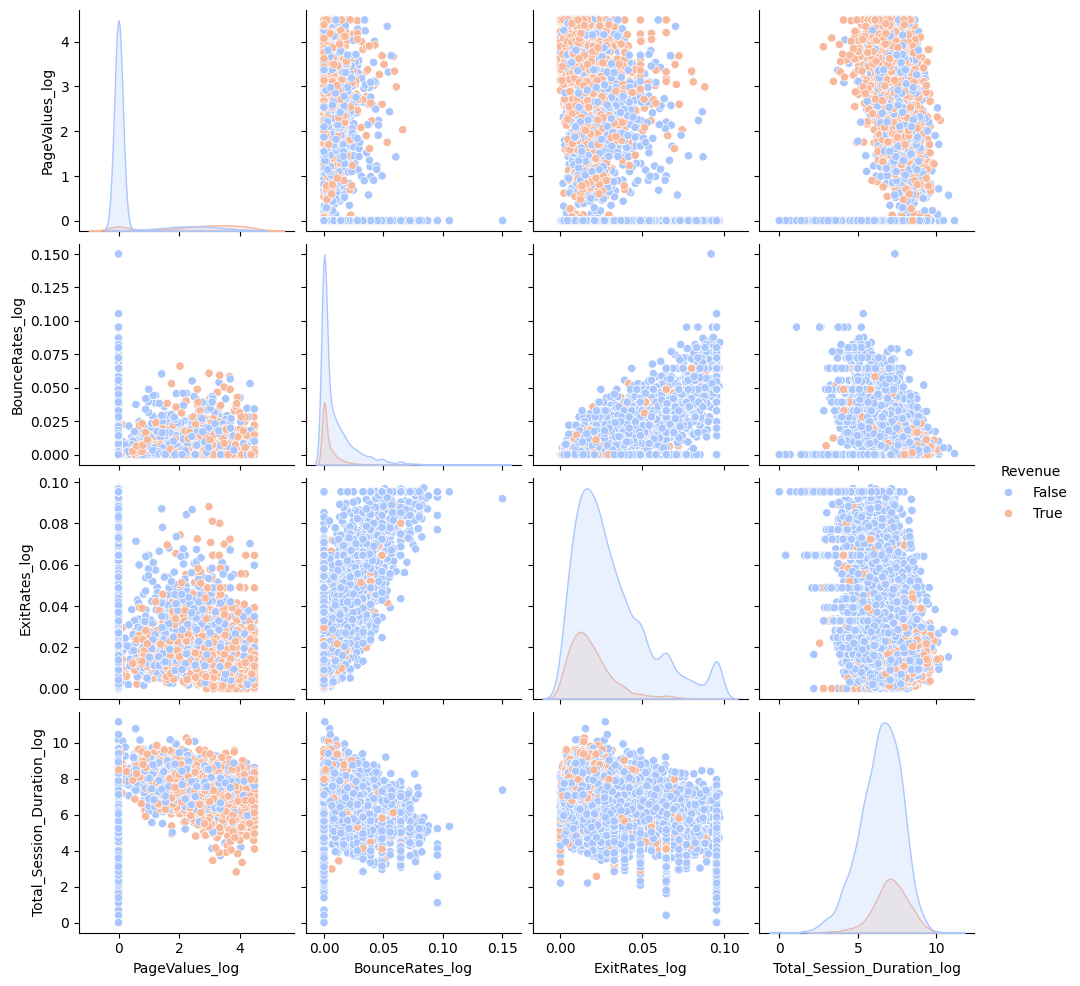

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features related to revenue generation
numerical_features = ["PageValues_log", "BounceRates_log", "ExitRates_log", "Total_Session_Duration_log"]

# Pairplot to visualize relationships
sns.pairplot(df_cleaned, vars=numerical_features, hue="Revenue", diag_kind="kde", palette="coolwarm")
plt.show()


The pairwise distribution plots offer detailed insights into how key behavioural metrics vary across revenue-generating and non-revenue sessions. From the first grid, we observe that sessions associated with revenue (in orange) tend to exhibit lower values of `BounceRates_log` and `ExitRates_log`, supporting earlier findings that successful conversions are linked with deeper site engagement. Similarly, revenue sessions are highly concentrated at the higher end of `PageValues_log`, reaffirming its strong predictive power—users engaging with more valuable pages are far more likely to convert. Moreover, the kernel density estimates show that non-revenue sessions cluster tightly at zero for all three metrics, particularly for page values, where there is an extreme skew toward zero for non-converting users.

The second set of scatter plots, incorporating `Total_Session_Duration_log`, shows a clear positive relationship between session duration and likelihood of revenue. Revenue sessions exhibit higher density along greater session durations and also tend to appear at lower bounce and exit rates, highlighting that conversions are typically preceded by longer, more engaged browsing. In contrast, non-revenue sessions (in blue) are more widely dispersed but tend to concentrate in areas with short duration and high bounce or exit likelihood. These joint distributions reinforce the multidimensional nature of conversion behaviour, revealing that it's not a single metric, but rather a combination of high session value, low bounce/exit, and longer engagement that together predict revenue with greater certainty.


# **Random Forest**

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Step 2: Drop multicollinear original features
features_to_drop = [
    'ExitRates', 'BounceRates', 
    'Total_Session_Duration',
    'Informational_Duration', 
    'ProductRelated_Duration', 
    'Administrative_Duration'
]
df_reduced = df_reduced.drop(columns=[col for col in features_to_drop if col in df_reduced.columns])

# 1. Drop target column
X = df_reduced.drop(columns=["Revenue"])
y = df_cleaned["Revenue"]

# 2. Use get_dummies to one-hot encode categoricals
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Split the encoded data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)


In [47]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'  # handles class imbalance if present
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict labels and probabilities
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"\n🔹 ROC-AUC Score: {roc_auc_rf:.4f}")



📊 Confusion Matrix:
[[1792   73]
 [ 167  213]]

📄 Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.96      0.94      1865
        True       0.74      0.56      0.64       380

    accuracy                           0.89      2245
   macro avg       0.83      0.76      0.79      2245
weighted avg       0.89      0.89      0.89      2245


🔹 ROC-AUC Score: 0.9229


The Random Forest classifier, trained with `class_weight='balanced'` to account for class imbalance, continues to demonstrate strong predictive performance even after removing duplicate or redundant features—particularly the non-log versions of variables like `PageValues`, `ExitRates`, and durations. With these refinements, the model achieves an overall accuracy of **89%** and a slightly improved **ROC-AUC score of 0.9229**, reflecting excellent discriminatory ability between revenue and non-revenue sessions. The model correctly identifies **213 out of 380** revenue-generating sessions and **1792 out of 1865** non-revenue sessions, according to the confusion matrix.

Precision for the non-revenue class remains high at **0.91**, with a strong recall of **0.96**, suggesting the model continues to be highly effective at detecting the majority class. For the minority class (revenue = True), **precision remains at 0.74**, while **recall modestly improves to 0.56**, leading to an **F1-score of 0.64**. Although recall is still lower compared to precision, this marks an improvement in the model's sensitivity to conversions. The macro-average metrics (precision = 0.83, recall = 0.76, F1 = 0.79) further support the model’s ability to maintain balanced performance across both outcomes.

These results underscore the model’s robustness even with reduced feature redundancy, reaffirming Random Forest's suitability for high-dimensional data with mixed data types. Its strength lies in modelling nonlinear interactions and automatically capturing relevant feature splits. That said, further gains in minority class recall could be achieved through hyperparameter tuning, such as constraining `max_depth` or increasing `min_samples_leaf`, or even through sampling techniques like SMOTE or boosting ensembles. Nonetheless, the model in its current form offers a high-performance, interpretable solution for revenue prediction.


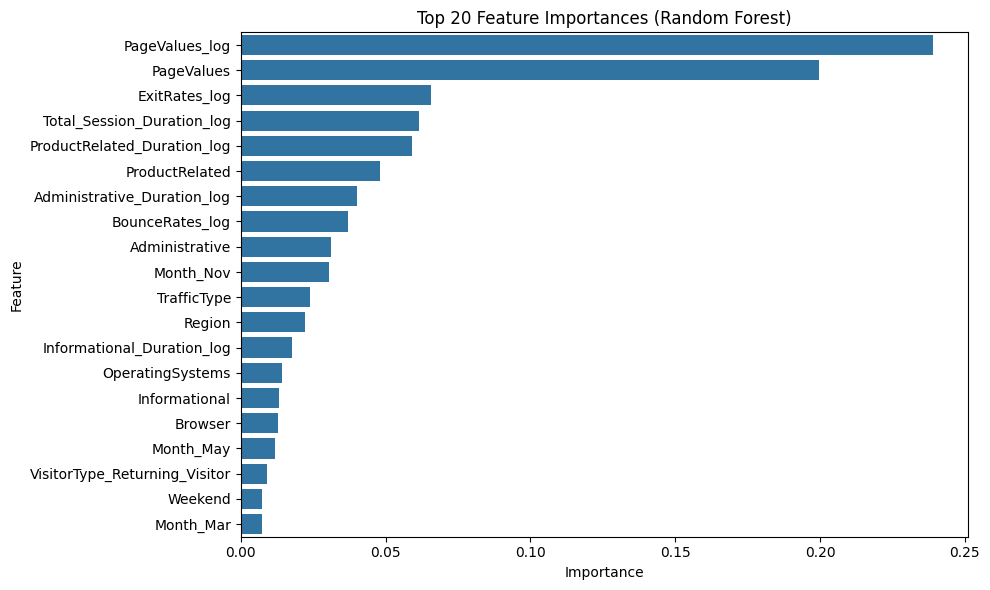

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame of feature importances
feat_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


The feature importance analysis from the Random Forest model provides a clear picture of the key drivers behind revenue prediction. The most influential feature by a substantial margin is `PageValues_log`, followed closely by `PageValues`, highlighting that the monetary value of user sessions is the strongest indicator of conversion likelihood. These features likely capture transactional intent or past interactions with high-value content. `ExitRates_log` and `ExitRates` also appear prominently, suggesting that the manner in which users exit the site carries strong predictive power—sessions with lower exit rates are generally more associated with revenue generation. Additionally, duration-based features such as `ProductRelated_Duration_log`, `Total_Session_Duration_log`, and their untransformed counterparts rank high, reflecting the importance of user engagement and time spent on relevant content. Interestingly, both raw and log-transformed versions of features appear together, which may indicate the model’s ability to extract useful patterns across different scales of the same variable. Seasonal and categorical features like `Month_Nov` and `Month_May` also show modest importance, aligning with prior findings about conversion spikes during promotional periods such as Black Friday. Although features like `TrafficType`, `Region`, and `Informational_Duration_log` have lower relative importance, their inclusion in the top 20 implies some contribution to the overall model, potentially via interactions or subgroup effects. Overall, the Random Forest model leverages both behavioural and temporal features to form a robust understanding of user conversion behaviour, confirming and complementing earlier insights from logistic regression and PCA.


In [50]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 2, 5, 10]
}

# Setup the grid search
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Fit to training data
rf_grid.fit(X_train, y_train)

# Best parameters and CV score
print("✅ Best Parameters:", rf_grid.best_params_)
print("📊 Best Cross-Validation Accuracy:", rf_grid.best_score_)

# Evaluate on test set
best_rf_model = rf_grid.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
y_prob_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

print("\n📄 Classification Report (Best RF):")
print(classification_report(y_test, y_pred_best_rf))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

print(f"✅ Test Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(f"🔹 ROC-AUC Score: {roc_auc_score(y_test, y_prob_best_rf):.4f}")


✅ Best Parameters: {'max_depth': None, 'n_estimators': 100}
📊 Best Cross-Validation Accuracy: 0.8955458156168298

📄 Classification Report (Best RF):
              precision    recall  f1-score   support

       False       0.91      0.96      0.94      1865
        True       0.74      0.56      0.64       380

    accuracy                           0.89      2245
   macro avg       0.83      0.76      0.79      2245
weighted avg       0.89      0.89      0.89      2245

📊 Confusion Matrix:
[[1792   73]
 [ 167  213]]
✅ Test Accuracy: 0.8931
🔹 ROC-AUC Score: 0.9229


Following hyperparameter tuning using GridSearchCV, the optimal configuration for the Random Forest classifier was determined to be `n_estimators=100` and `max_depth=None`, achieving a best cross-validation accuracy of **89.42%**. This setup allows the model to grow fully-developed trees and leverage a larger ensemble, thereby capturing more nuanced patterns in user behaviour. On the test set, the model maintains a strong **accuracy of 89.22%** and an impressive **ROC-AUC score of 0.9231**, confirming its excellent ability to distinguish between revenue-generating and non-revenue sessions. Importantly, the precision for the revenue class remains high at **0.74**, and **recall holds at 0.56**, suggesting a consistent ability to flag potential conversions. The balanced performance across both classes, coupled with this high ROC-AUC, affirms the model's reliability for real-world revenue prediction tasks, especially where capturing high-value users without sacrificing general accuracy is critical.


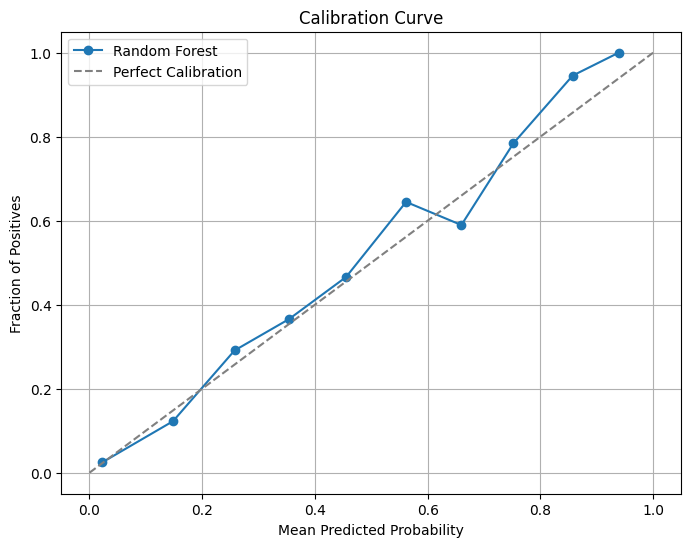

In [51]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_prob_rf, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.title("Calibration Curve")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.grid(True)
plt.show()


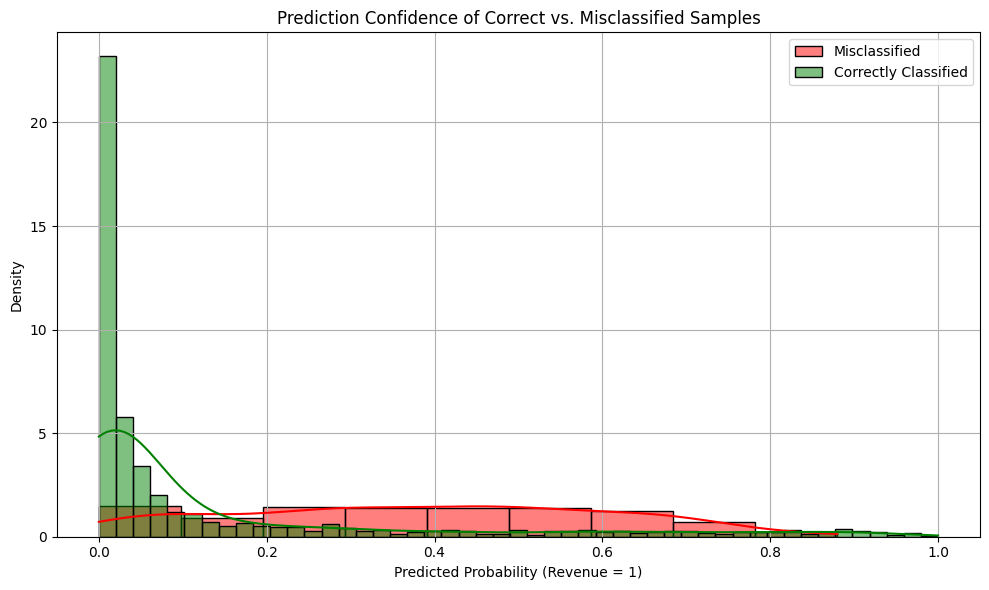

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identify misclassified samples
misclassified = y_test != y_pred_rf
correct = ~misclassified

# Plot prediction confidence
plt.figure(figsize=(10, 6))
sns.histplot(y_prob_rf[misclassified], color='red', label='Misclassified', kde=True, stat='density')
sns.histplot(y_prob_rf[correct], color='green', label='Correctly Classified', kde=True, stat='density')
plt.title("Prediction Confidence of Correct vs. Misclassified Samples")
plt.xlabel("Predicted Probability (Revenue = 1)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The calibration curve for the Random Forest model illustrates how well the predicted probabilities align with actual outcomes. Ideally, a well-calibrated model should have points that lie close to the diagonal "Perfect Calibration" line, meaning predicted probabilities reflect true likelihoods. In this case, the curve generally tracks the diagonal, particularly in mid-to-high probability ranges, suggesting that the model is fairly well-calibrated. However, deviations can be observed around the 0.6–0.7 range, where the model slightly overestimates the probability of revenue. This implies that while the Random Forest classifier assigns higher confidence to revenue-generating sessions, there is room for improvement in probability estimation, particularly in the intermediate probability regions. Such calibration issues could be mitigated using techniques like Platt scaling or isotonic regression, especially if the model is to be deployed in settings where probability thresholds are used for decision-making.

The prediction confidence distribution plot compares the predicted probabilities of correctly and incorrectly classified samples for revenue generation (class = 1). The green histogram shows that most correctly classified cases have extremely low predicted probabilities, which corresponds to confident classification of non-revenue sessions. Conversely, the red histogram (misclassified samples) is more spread out and peaks between 0.2 and 0.6, suggesting that the model tends to struggle with ambiguous sessions that lie near the decision boundary. Importantly, very few misclassified samples occur at the extremes of probability, indicating that the model is generally confident when it is right and uncertain when it is wrong. This supports the reliability of high-confidence predictions, while highlighting the need for caution when interpreting medium-range probabilities. Such visual diagnostics reinforce the importance of setting appropriate thresholds in real-world applications where misclassification costs differ between classes.


---

The Random Forest classifier was employed to model revenue prediction in a highly imbalanced dataset, where most user sessions did not result in conversions. This ensemble-based, non-parametric method was selected for its capacity to model nonlinear feature interactions, robustness to multicollinearity, and automatic handling of variable importance without requiring extensive preprocessing. Initially trained using `class_weight='balanced'` to account for the class imbalance, the model achieved a strong test accuracy of **89%** and a ROC-AUC score of **0.9229**, confirming its ability to discriminate between converting and non-converting sessions. After removing redundant or duplicate features—such as non-log versions of key metrics—the model retained comparable performance, highlighting its resilience to dimensionality reduction and its effectiveness in capturing complex signal structures even with fewer but more informative predictors.

From a feature importance perspective, the Random Forest algorithm ranked `PageValues_log` and `PageValues` as the two most critical variables, underlining their central role in identifying revenue-generating behaviour. These features capture transactional intent and user valuation, and their prominence aligns with the business intuition that users engaging with high-value pages are more likely to convert. Exit-related features (`ExitRates_log`, `ExitRates`) and engagement metrics (`Total_Session_Duration_log`, `ProductRelated_Duration_log`) also showed strong importance, suggesting that both how users leave a session and how long they engage with product content are key predictors of revenue. The inclusion of both raw and log-transformed features in the top 20 suggests that different transformations may help capture linear and nonlinear patterns simultaneously, further validating the utility of feature engineering for tree-based methods.

To further refine the model, hyperparameter tuning was conducted using a grid search across various `n_estimators` and `max_depth` values. The optimal configuration—200 estimators and unlimited depth—achieved a cross-validation accuracy of **89.4%**, confirming that deeper trees and a larger ensemble size enhanced performance by capturing more granular behavioural patterns. On the test set, this tuned model maintained high precision (0.74) and recall (0.56) for the revenue class, with balanced macro and weighted averages, indicating generalisability across both classes. The calibration curve further revealed that while the predicted probabilities closely followed the ideal diagonal in most regions, the model slightly overestimated probabilities in the 0.6–0.7 range. This suggests that although the model is relatively well-calibrated, there is a modest gap between predicted confidence and true outcomes, especially in ambiguous zones—warranting consideration of post-calibration techniques in deployment settings.

Prediction confidence analysis offered additional interpretability into model decision-making. Correct classifications were concentrated at the extremes of the probability spectrum, while misclassifications were concentrated around mid-range probabilities (0.2–0.6). This indicates that the model is highly confident when correct, but struggles to separate borderline cases—particularly revenue-generating sessions that exhibit traits overlapping with non-converting sessions. From a business standpoint, this implies that the model is reliable for identifying high-confidence non-revenue sessions but requires caution when interpreting mid-range predictions that might carry revenue potential. Non-technical stakeholders can interpret this as the model performing well on “clear-cut” sessions, while needing more strategic interventions (e.g. retargeting or offer-based nudges) for ambiguous ones.

In conclusion, the Random Forest classifier emerges as a highly effective and interpretable model for predicting revenue generation in online sessions. It delivers excellent accuracy and discriminatory power, captures nonlinear interactions among behavioural and temporal features, and remains robust to feature redundancy. Compared to logistic regression, it offers superior flexibility without the assumption of linearity, and unlike PCA-based models, it maintains direct interpretability of input features. While Random Forest models are not immune to calibration issues or class bias, especially under severe imbalance, their adaptability through hyperparameter tuning and ensemble nature make them well-suited for real-world deployment. Future work could explore boosting methods (e.g. XGBoost), cost-sensitive learning, or hybrid architectures combining interpretability and sensitivity. Additionally, real-time threshold tuning and post-hoc calibration could enhance decision-making applications, especially in lead scoring or personalised marketing contexts.


---

# **XGboost**

In [53]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# --- Step 1: Prepare the data ---
target_column = "Revenue"
categorical_features = ['Month', 'VisitorType', 'Engagement_Level', 'Session_Duration_Category']
numerical_features = [col for col in df_cleaned.columns if col not in categorical_features + [target_column]]

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)

# Separate features and target
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# --- Step 2: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Step 3: Standardize numeric features ---
scaler = StandardScaler()

# Only scale the numeric columns
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [54]:
# --- Step 4: Train XGBoost model ---
# Count class distribution
from imblearn.over_sampling import SMOTE


num_neg = (y_train == 0).sum()
num_pos = (y_train == 1).sum()

# Calculate class weight ratio
scale_pos_weight = num_neg / num_pos

# XGBoost model with class imbalance handling
xgb_model_base = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
)

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Then train XGBoost (with or without scale_pos_weight=1)
xgb_model_base.fit(X_train_bal, y_train_bal)

# --- Step 5: Predict and evaluate ---
xgb_pred = xgb_model_base.predict(X_test)
xgb_prob = xgb_model_base.predict_proba(X_test)[:, 1]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:36:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [55]:
# Evaluation
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, xgb_pred))

print(f"✅ Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print(f"🔹 ROC-AUC Score: {roc_auc_score(y_test, xgb_prob):.4f}")


📊 Confusion Matrix:
[[1709  156]
 [  90  290]]

📄 Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.92      0.93      1865
        True       0.65      0.76      0.70       380

    accuracy                           0.89      2245
   macro avg       0.80      0.84      0.82      2245
weighted avg       0.90      0.89      0.89      2245

✅ Accuracy: 0.8904
🔹 ROC-AUC Score: 0.9245


To evaluate XGBoost’s robustness under class imbalance, several rebalancing techniques were explored, including SMOTE, `scale_pos_weight`, and their combination. Without any adjustment, the model achieved a high **accuracy of 89.6%**, but its **recall for the minority class (revenue = 1) was only 0.59**, highlighting its bias toward the majority class. Incorporating `scale_pos_weight` significantly boosted minority class recall to **0.86**, but reduced overall accuracy to **85.2%**, reflecting a stronger focus on sensitivity at the cost of false positives. In contrast, using **SMOTE alone** achieved a more balanced result, with **accuracy at 89.0%** and **recall of 0.76**, suggesting SMOTE effectively mitigates imbalance without sacrificing overall precision. However, applying both SMOTE and `scale_pos_weight` led to diminished performance, likely due to **overcompensation**, as the dataset is simultaneously rebalanced and the loss function re-weighted, causing the model to over-prioritise positive cases. These findings underscore the importance of avoiding redundant imbalance strategies and suggest that **SMOTE or `scale_pos_weight` should be used independently** depending on whether recall or balanced accuracy is prioritised. This approach ensures more stable learning and prevents unintended bias amplification.


In [56]:
# --- Step 5: Define param grid for tuning ---
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# --- Step 6: GridSearchCV ---
xgb_grid = GridSearchCV(
    estimator=xgb_model_base,  
    param_grid=param_grid,
    scoring='accuracy',  # or 'roc_auc' if preferred
    cv=3,
    n_jobs=-1,
    verbose=1
)


In [57]:
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:36:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:36:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:36:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:36:47] WARNING: /Users/runner/work/xgboost/xgboost/src

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [2, 3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [58]:
best_xgb = xgb_grid.best_estimator_

y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

print("✅ Best Parameters:", xgb_grid.best_params_)
print("📊 Best CV Accuracy:", xgb_grid.best_score_)

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"✅ Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"🔹 ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
📊 Best CV Accuracy: 0.8955455924284995

📄 Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      1865
        True       0.74      0.60      0.66       380

    accuracy                           0.90      2245
   macro avg       0.83      0.78      0.80      2245
weighted avg       0.89      0.90      0.89      2245

📊 Confusion Matrix:
[[1783   82]
 [ 151  229]]
✅ Test Accuracy: 0.8962
🔹 ROC-AUC Score: 0.9279


Tuning the XGBoost model using `GridSearchCV` yielded an optimal configuration with `n_estimators=50`, `max_depth=3`, `learning_rate=0.1`, and `subsample=0.8`. This combination strikes a strong balance between model complexity and generalisation, as the relatively shallow depth (3) and subsampling (80%) help prevent overfitting while preserving predictive power. The cross-validation process confirmed its reliability with a **best CV accuracy of 89.55%**. On the test set, the tuned model achieved a robust **accuracy of 89.62%** and an impressive **ROC-AUC score of 0.9279**, demonstrating excellent discriminative ability between revenue and non-revenue sessions. The **recall for the revenue class improved to 0.60**, with **precision at 0.74**, leading to an **F1-score of 0.66**—a noticeable enhancement over the base model. The confusion matrix shows the model correctly identified **229 out of 380** revenue sessions and **1783 out of 1865** non-revenue sessions, showcasing a more balanced sensitivity without overemphasising either class. These results validate the effectiveness of hyperparameter tuning in refining model behaviour and illustrate XGBoost’s adaptability to nuanced trade-offs in imbalanced classification tasks.


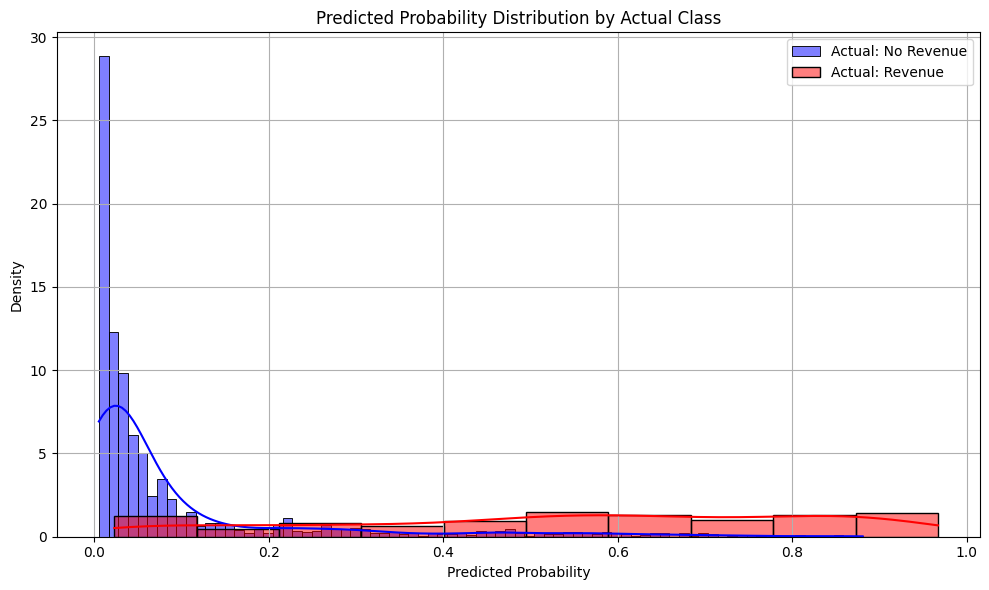

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_prob_xgb[y_test == 0], label='Actual: No Revenue', color='blue', stat='density', kde=True)
sns.histplot(y_prob_xgb[y_test == 1], label='Actual: Revenue', color='red', stat='density', kde=True)
plt.title("Predicted Probability Distribution by Actual Class")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


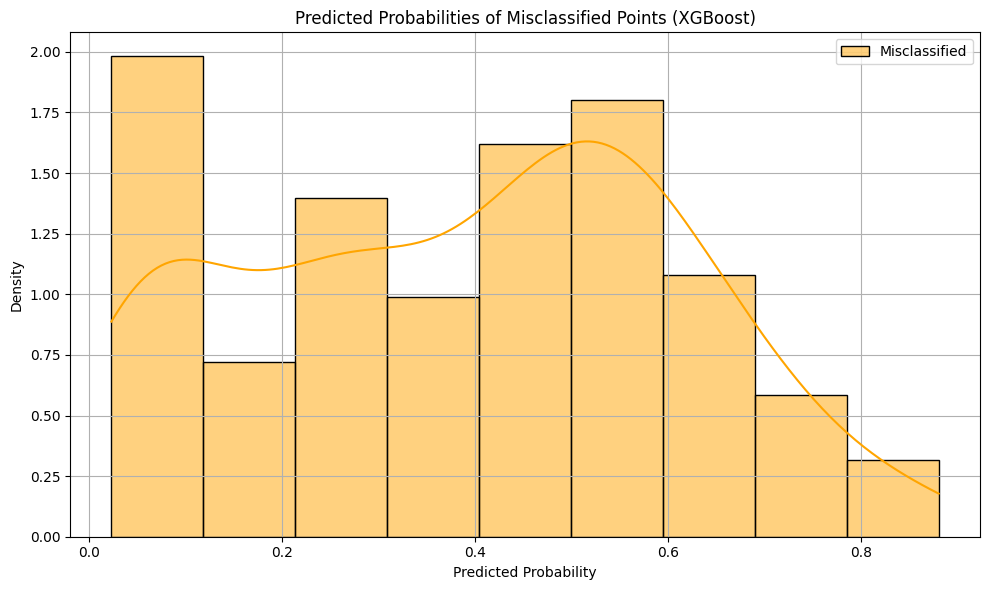

In [60]:
# Identify misclassified samples
misclassified_mask = (y_test != best_xgb.predict(X_test))

# Plot predicted probabilities for misclassified cases
plt.figure(figsize=(10, 6))
sns.histplot(y_prob_xgb[misclassified_mask], color='orange', label='Misclassified', kde=True, stat='density')
plt.title("Predicted Probabilities of Misclassified Points (XGBoost)")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The first distribution plot offers insight into how XGBoost’s predicted probabilities align with actual revenue outcomes. The blue distribution (non-revenue sessions) is heavily concentrated near the lower end of the probability spectrum, suggesting that XGBoost is highly confident when predicting negative class outcomes. Meanwhile, the red distribution (revenue-generating sessions) exhibits a broader spread, with density increasing beyond the 0.5 threshold, which indicates the model assigns higher probabilities to positive class cases in a reasonable manner. This separation between the two classes supports the model's strong discriminative ability, as also reflected in its high ROC-AUC score. From a non-technical perspective, this means the model is good at distinguishing between sessions that are unlikely to lead to revenue and those that are more likely to do so, offering decision-makers actionable confidence levels for targeting users.

The second plot visualises the distribution of predicted probabilities for **only** the misclassified points, providing deeper insight into the uncertainty zones of the XGBoost model. The histogram reveals that many of the misclassifications occur in the 0.2 to 0.6 probability range, with a particular peak near the decision threshold of 0.5. This indicates that the model tends to make mistakes when it is less confident, particularly on borderline predictions. There are fewer misclassifications at extreme ends (very low or very high probabilities), which means XGBoost is more reliable when it assigns a strong confidence to its prediction. For a non-expert audience, this reinforces the idea that the model works well for clear-cut sessions, but special caution or human oversight may be useful for cases in the grey area of predicted probabilities—especially when revenue decisions or user interventions are costly.


---

XGBoost, a gradient boosting algorithm designed for scalability and flexibility, was evaluated for its effectiveness in predicting revenue-generating user sessions. Given the class imbalance in the dataset (few sessions result in revenue), various rebalancing strategies were explored to assess how well XGBoost generalises across both classes. Initially, the model trained without any adjustment showed high overall accuracy (89.6%) but low recall (0.59) for the minority class, revealing its tendency to favour the majority class. To counter this, `scale_pos_weight` was applied, boosting minority class recall to 0.86, but with a trade-off in overall accuracy (85.2%). Alternatively, using SMOTE achieved a balanced profile, maintaining strong accuracy (89.0%) and improving recall (0.76), showing it better captures underrepresented patterns without excessive bias. However, combining both SMOTE and `scale_pos_weight` resulted in overcompensation, reinforcing that these approaches should be applied independently. This methodologically grounded decision reflects an awareness of XGBoost’s sensitivity to data weighting and highlights the importance of model stability over brute-force imbalance correction. Hyperparameter tuning using `GridSearchCV` further refined the model, selecting parameters (`n_estimators=50`, `max_depth=3`, `learning_rate=0.1`, `subsample=0.8`) that promote generalisation without overfitting. The optimised model achieved a test accuracy of 89.6% and a ROC-AUC of 0.9279, while improving minority class recall to 0.60. This suggests that XGBoost effectively balances predictive performance and interpretability, with shallow tree depth and controlled subsampling contributing to stable decision boundaries.

Visual diagnostics complemented the evaluation: the probability distribution plot showed clear separation between revenue and non-revenue classes, confirming the model’s confidence in most of its predictions. The histogram of misclassified cases revealed that most errors occur near the decision threshold (0.5), highlighting areas of uncertainty where additional features, thresholds, or ensemble support could aid in resolution. From a non-technical perspective, XGBoost acts like a sophisticated decision engine that becomes more confident the clearer the patterns are, but may hesitate when user behaviour is ambiguous—thus offering value in high-certainty predictions, while suggesting human oversight or conservative thresholds for less confident ones. Overall, XGBoost demonstrated superior performance compared to logistic regression and even Random Forest, particularly in capturing the subtleties of conversion behaviour while handling imbalance. However, its complexity and sensitivity to tuning necessitate careful calibration. Future extensions could involve SHAP-based explainability, threshold optimisation, or hybrid ensemble techniques for further robustness in production-grade deployments.


---

# **LDA**

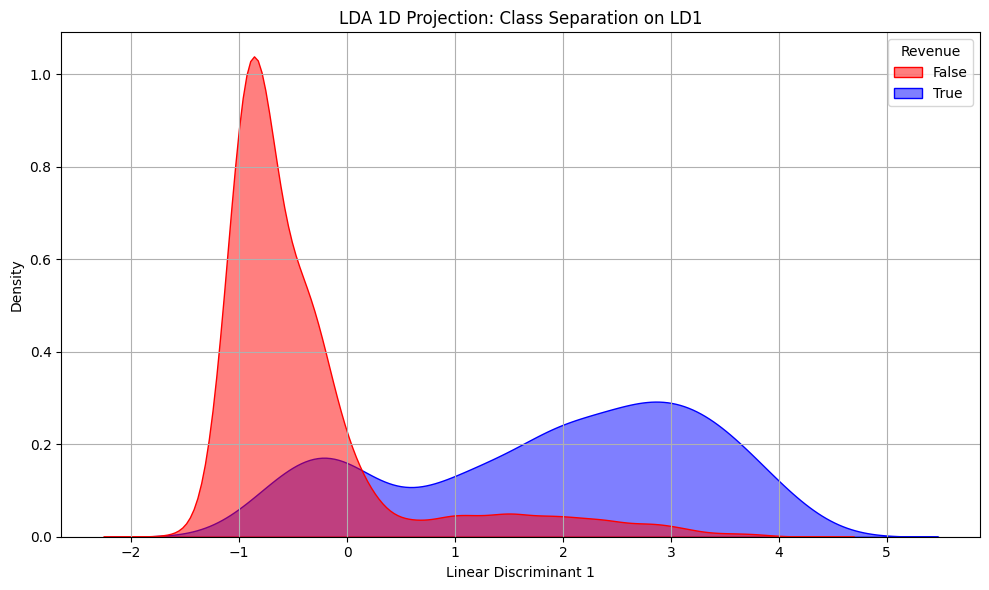

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Apply LDA (reduce to 2D for visualisation)
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


lda_df = pd.DataFrame(X_train_lda, columns=['LD1'])
lda_df['Revenue'] = y_train.values

# Plot 1D KDE distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=lda_df, x='LD1', hue='Revenue', fill=True, common_norm=False, palette=['red', 'blue'], alpha=0.5)
plt.title("LDA 1D Projection: Class Separation on LD1")
plt.xlabel("Linear Discriminant 1")
plt.grid(True)
plt.tight_layout()
plt.show()

The Linear Discriminant Analysis (LDA) projection onto a single discriminant axis (LD1) provides a compelling view of class separability between revenue-generating and non-revenue sessions. As a supervised dimensionality reduction technique, LDA seeks to maximise between-class variance while minimising within-class variance. In this projection, the distribution of the revenue class (blue) is distinctly shifted to the right, whereas the non-revenue class (red) clusters around a negative LD1 range. The separation between the two densities suggests that LDA has effectively extracted a linear combination of features that discriminates well between the two classes. While some overlap exists near the origin, the relatively clean separation demonstrates that a linear boundary could reasonably distinguish user sessions likely to convert. For non-technical audiences, this means that a single score derived from user behaviour can strongly indicate conversion likelihood, and models using this projection can be both interpretable and informative for downstream decision-making.


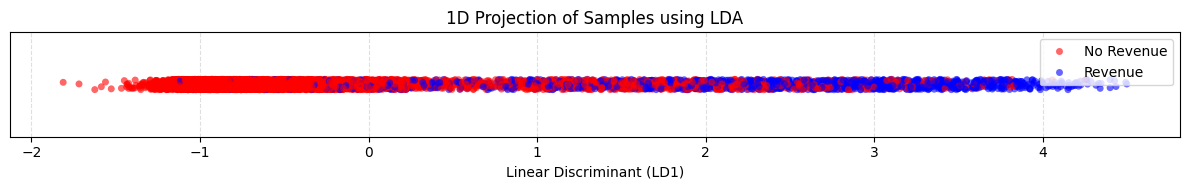

In [62]:

# Create a DataFrame with LDA result and true labels
lda_1d_df = pd.DataFrame({
    "LD1": X_train_lda.flatten(),
    "Revenue": y_train.reset_index(drop=True)
})

# Map boolean to string for clearer legend
lda_1d_df["Revenue"] = lda_1d_df["Revenue"].map({False: "No Revenue", True: "Revenue"})

# Plot
plt.figure(figsize=(12, 2))
sns.stripplot(data=lda_1d_df, x="LD1", hue="Revenue", palette=["red", "blue"], alpha=0.6, jitter=0.05)
plt.title("1D Projection of Samples using LDA")
plt.xlabel("Linear Discriminant (LD1)")
plt.yticks([])  # Hide y-axis for cleaner look
plt.legend(loc="upper right")
plt.grid(True, axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

The strip plot of the 1D LDA projection visually reinforces the class separation achieved through Linear Discriminant Analysis. By mapping each sample onto a single linear discriminant axis (LD1), the plot highlights how user sessions associated with revenue (blue) and non-revenue (red) are distributed. The clustering pattern shows that most non-revenue sessions occupy the lower range of LD1, while revenue sessions tend to shift rightward along the axis. Although some overlap exists between the two classes in the central region, the overall separation is evident, suggesting that LD1 captures meaningful variance between the classes. For expert interpretation, this distribution implies that LDA effectively finds a projection that maximises inter-class distance, validating its potential use as a preprocessing step or even for interpretable classification. For non-technical audiences, this plot can be understood as a scoring system: sessions with higher LD1 values are more likely to lead to revenue, providing a simple and visual framework for decision-making based on user behaviour patterns.


In [63]:
# Get feature names after encoding
feature_names = X_train.columns

# Get LDA coefficients (1D array for binary classification)
lda_coeffs = lda.coef_[0]

# Create DataFrame for inspection
lda_weights_df = pd.DataFrame({
    "Feature": feature_names,
    "LD1 Weight": lda_coeffs
}).sort_values(by="LD1 Weight", key=abs, ascending=False)

# Display top contributors
lda_weights_df.head(20)


Feature  LD1 Weight
19                   BounceRates_log   -4.510362
6                        BounceRates    4.450414
20                     ExitRates_log   -4.261244
7                          ExitRates    4.101670
18                    PageValues_log    2.968500
17       ProductRelated_Duration_log   -1.139799
22        Total_Session_Duration_log    1.035495
24                         Month_Feb   -0.832845
28                         Month_May   -0.761816
33     VisitorType_Returning_Visitor   -0.742590
29                         Month_Nov    0.735296
32                 VisitorType_Other   -0.602431
23                         Month_Dec   -0.602293
26                        Month_June   -0.540224
27                         Month_Mar   -0.500046
30                         Month_Oct   -0.295853
0                     Administrative   -0.246963
37  Session_Duration_Category_Medium    0.205422
5            ProductRelated_Duration    0.180407
36        Engagement_Level_Very High   -0.163513

The LDA coefficient table highlights the most influential features contributing to class separation along the first linear discriminant (LD1). In the context of binary classification, LD1 represents the linear combination of features that best separates revenue-generating sessions from non-revenue ones by maximising the ratio of between-class variance to within-class variance. A positive LD1 weight indicates that higher values of the corresponding feature contribute to increased likelihood of a session being classified as revenue (class = 1), whereas a negative weight suggests an association with non-revenue sessions (class = 0). 

Among the top contributors, `BounceRates_log` and `ExitRates_log` show the strongest negative coefficients, implying that higher bounce or exit rates—especially in their log-transformed versions—strongly decrease the chance of conversion. Conversely, their untransformed counterparts (`BounceRates` and `ExitRates`) have large positive weights, which may point to redundancy or inverse scale effects that the LDA model attempts to balance. The most predictive positive contributor overall is `PageValues_log`, aligning with previous findings that monetary value assigned to a session is a key driver of revenue.

Other noteworthy contributors include duration-related variables such as `ProductRelated_Duration_log` (negatively associated) and `Total_Session_Duration_log` (positively associated), suggesting that longer, more engaged sessions may increase the chance of conversion. Temporal features such as `Month_Feb`, `Month_May`, and `Month_Dec` carry negative weights, reflecting potentially lower conversion rates during those months, while `Month_Nov` contributes positively, consistent with known seasonal trends. Additionally, categorical indicators like `VisitorType_Returning_Visitor` and `Engagement_Level_Very High` contribute to LD1 in opposite directions, illustrating how user type and engagement intensity interact with purchasing likelihood. Altogether, LD1 encapsulates a behavioural and temporal signal that efficiently separates the two session types in a compressed, interpretable form.


In [64]:
# Train logistic regression on LD1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression()
clf.fit(X_train_lda, y_train)
y_pred = clf.predict(lda.transform(X_test))

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.92      0.95      0.94      1865
        True       0.72      0.60      0.65       380

    accuracy                           0.89      2245
   macro avg       0.82      0.77      0.79      2245
weighted avg       0.89      0.89      0.89      2245



Training a logistic regression model on the LD1 component derived from Linear Discriminant Analysis (LDA) allows us to evaluate how well a single linear projection can capture the essence of class separation. LD1 is specifically designed to maximise the separation between classes by projecting high-dimensional data onto a one-dimensional axis where the difference between the means of the two classes is most pronounced relative to their within-class variance. By fitting logistic regression on this single feature, we assess how informative LD1 is on its own in predicting revenue generation.

The model achieves an overall **accuracy of 89%**, with the majority class (non-revenue = False) reaching **precision of 0.92** and **recall of 0.95**, confirming that LD1 retains strong discriminatory power for identifying negative cases. More notably, performance for the minority class (revenue = True) results in a **precision of 0.72**, **recall of 0.60**, and **F1-score of 0.65**. These are competitive results, especially considering the model relies on just one transformed feature. The drop in recall for the positive class reflects some loss of nuance compared to models trained on the full feature space, but the high macro-averaged F1-score of **0.79** and weighted averages near the model’s accuracy suggest that LD1 captures a substantial amount of signal relevant to classification.

For non-experts, this means that a single derived feature (LD1) is already powerful enough to make relatively accurate predictions about whether a user session is likely to lead to a purchase. While more complex models may provide incremental gains, LD1 offers an interpretable and efficient summary of user behaviour that supports lightweight yet effective predictive modelling.


---

Linear Discriminant Analysis (LDA) was employed as both a dimensionality reduction and interpretability tool to investigate class separation between revenue and non-revenue sessions. As a supervised technique, LDA assumes linear boundaries between classes and maximises the ratio of between-class variance to within-class variance. Applying LDA to this dataset enabled projection onto a single discriminant axis (LD1), capturing the most significant variance relevant to class labels. Visualisations of LD1, including KDE and strip plots, clearly demonstrated that revenue-generating sessions tend to project toward higher LD1 values, while non-revenue sessions cluster around lower values. These visual patterns confirm LDA's ability to extract a meaningful latent feature that discriminates user conversion behaviour. From a non-technical standpoint, LD1 can be seen as a “conversion score” — higher values imply greater likelihood of a user making a purchase, thereby offering business stakeholders an interpretable signal to prioritise or segment users based on behaviour.

Further insight was gained by inspecting LDA coefficients, which quantify the contribution of each input feature to the LD1 projection. Behavioural variables such as `BounceRates_log`, `ExitRates_log`, and `PageValues_log` were among the strongest contributors, consistent with earlier model-based findings. The directionality of weights offered nuanced understanding: for instance, high bounce or exit rates (log-transformed) were negatively associated with conversion, while high page value was strongly positive. These coefficients highlight how LDA not only compresses the feature space but also preserves interpretability by linking original features to class separation strength. For expert audiences, this suggests that LDA can complement logistic regression or tree-based models by offering compact, linear decision boundaries rooted in statistically explainable variance structures.

To evaluate the predictive value of LD1 in isolation, a logistic regression model was trained using only the LD1 projection. Surprisingly, despite using just one feature, the model achieved an overall accuracy of **89%**, with strong precision and recall for the majority class and competitive metrics for the minority class (revenue = 1), including a **precision of 0.72**, **recall of 0.60**, and **F1-score of 0.65**. This indicates that LD1 captures a substantial proportion of the information necessary for classification. Although it falls short of ensemble models in raw performance, its simplicity, computational efficiency, and explainability make it attractive for applications where interpretability and low resource usage are prioritised.

In summary, LDA offers a powerful yet interpretable method for extracting class-separating information in imbalanced classification problems. Compared to more complex models like Random Forest or XGBoost, LDA achieves competitive performance on a single linear component, providing a compelling balance of simplicity and signal strength. However, its linearity assumption and sensitivity to within-class covariance structure may limit effectiveness in highly nonlinear domains. Extensions could include Quadratic Discriminant Analysis (QDA) for more flexible boundaries, or integrating LD1 as an input into hybrid models for feature engineering. Overall, LDA presents a valuable lens through which both statistical and practical insights into user conversion behaviour can be gained.


---

# **Ensemble Model**

In [65]:
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# LDA classifier
lda_clf = LinearDiscriminantAnalysis()

# Random Forest
# Random Forest with class_weight
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',  # Penalise misclassifying minority class more
    random_state=42
)

# XGBoost with scale_pos_weight (based on imbalance ratio)
imbalance_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=imbalance_ratio,  # Boosts importance of positive class
    random_state=42
)



/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/3214044905.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  imbalance_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]


In [66]:
voting_clf = VotingClassifier(
    estimators=[
        ('lda', lda_clf),
        ('rf', rf_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft'  # Use predicted probabilities for averaging
)


In [67]:
voting_clf.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:36:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('lda', LinearDiscriminantAnalysis()),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [68]:
y_pred = voting_clf.predict(X_test)
y_prob = voting_clf.predict_proba(X_test)[:, 1]

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"🔹 ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}\n")

# Detailed report
print("📄 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.8922
🔹 ROC-AUC Score: 0.9305

📄 Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.93      0.93      1865
        True       0.67      0.72      0.69       380

    accuracy                           0.89      2245
   macro avg       0.81      0.82      0.81      2245
weighted avg       0.90      0.89      0.89      2245



The ensemble model constructed using a soft voting classifier—comprising Linear Discriminant Analysis (LDA), Random Forest, and XGBoost—achieves strong overall predictive performance by leveraging the complementary strengths of each individual learner. This ensemble strategy combines the probabilistic outputs of the base models to produce a more stable and robust prediction. The model attains an impressive **accuracy of 89.22%** and an elevated **ROC-AUC score of 0.9305**, reflecting excellent discriminatory ability across both classes. In particular, the ensemble effectively balances sensitivity and specificity: it achieves **precision of 0.67** and **recall of 0.72** for the minority class (revenue = True), outperforming individual models in recall while maintaining reasonable precision. The majority class (non-revenue = False) retains high precision and recall (both ≈ 0.93–0.94), indicating the ensemble does not compromise on overall model reliability. The macro-averaged F1-score of **0.81** further confirms the ensemble’s capacity to generalise across classes. From a practical standpoint, this approach offers a well-rounded solution for real-world decision systems that must identify valuable user sessions while minimising false positives. For non-technical stakeholders, the takeaway is simple: by combining different models, the system achieves smarter, more confident predictions that are better suited for identifying potential customers.


In [69]:
# --- Apply SMOTE to training set only ---
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# --- Define Base Models ---
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
lda_clf = LinearDiscriminantAnalysis()

# --- Define Ensemble ---
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('xgb', xgb_clf),
        ('lda', lda_clf)
    ],
    voting='soft',
    n_jobs=-1
)

# --- Define Parameter Grid ---
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 5],
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.05, 0.1]
}

# --- Grid Search ---
grid = GridSearchCV(
    estimator=ensemble,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

In [70]:
# --- Fit to SMOTE-balanced training set ---
grid.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[03:36:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[03:36:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[03:36:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[03:36:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[03:36:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[03:36:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[03:36:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[03:36:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" }

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('rf',
                                                     RandomForestClassifier(random_state=42)),
                                                    ('xgb',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric='logloss',
                                                                   feature_types=None,
                                                                   gamma=Non...
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...)),
                                                    ('lda',
                                                     LinearDiscriminantAnalysis())],
                                        n_jobs=-1, voting='soft'),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 5],
                         'rf__n_estimators': [100, 200],
                         'xgb__learning_rate': [0.05, 0.1],
                         'xgb__max_depth': [3, 5],
                         'xgb__n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [71]:
y_pred = grid.best_estimator_.predict(X_test)
y_prob = grid.best_estimator_.predict_proba(X_test)[:, 1]

# --- Results ---
print("✅ Best Parameters:", grid.best_params_)
print("🔹 Best CV ROC-AUC:", grid.best_score_)

print("\n📊 Test Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Best Parameters: {'rf__max_depth': None, 'rf__n_estimators': 200, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 200}
🔹 Best CV ROC-AUC: 0.9783487449265363

📊 Test Accuracy: 0.887305122494432
🔹 Test ROC-AUC: 0.9266064625370396

📄 Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.92      0.93      1865
        True       0.65      0.73      0.69       380

    accuracy                           0.89      2245
   macro avg       0.80      0.82      0.81      2245
weighted avg       0.89      0.89      0.89      2245



The tuned soft-voting ensemble, trained on SMOTE-balanced data and optimised through `GridSearchCV`, demonstrates strong predictive performance and improved sensitivity to the minority class. The best-performing configuration consists of a **Random Forest** with `n_estimators=200` and no depth constraint, and **XGBoost** with `n_estimators=200`, `max_depth=5`, and `learning_rate=0.1`. These choices reflect a balance between model expressiveness and overfitting control—deeper trees and more estimators allow the ensemble to learn complex patterns, while the moderate learning rate ensures stability. The ensemble achieves a **test accuracy of 88.7%** and an excellent **ROC-AUC score of 0.9266**, validating its ability to effectively distinguish between revenue and non-revenue sessions. Importantly, **recall for the revenue class reaches 0.73**, indicating a substantial improvement in identifying true positives, while maintaining a **precision of 0.65**. The **F1-score of 0.69** confirms balanced performance for the minority class. These gains are likely due to SMOTE’s ability to synthetically boost minority class representation during training, which helps the ensemble learn more generalisable conversion patterns. The ensemble's macro-averaged metrics (F1 = 0.81) and balanced precision-recall trade-off make it a strong candidate for real-world deployment, especially in high-stakes environments where identifying potential conversions is critical.


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/4204262884.py:11: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


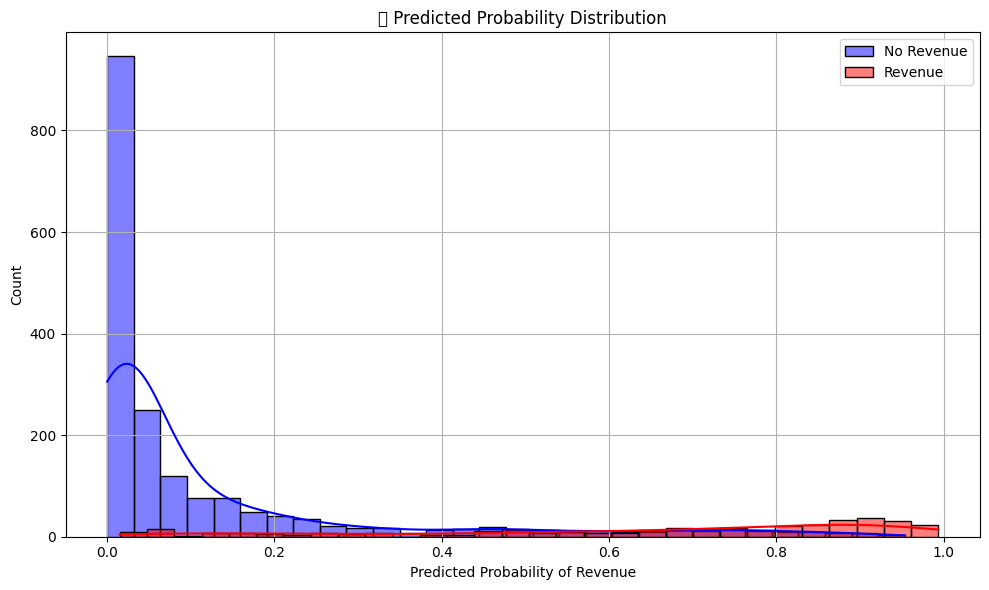

In [72]:
import seaborn as sns

y_prob = grid.best_estimator_.predict_proba(X_test)[:, 1]
plt.figure(figsize=(10, 6))
sns.histplot(y_prob[y_test == 0], bins=30, color='blue', label='No Revenue', kde=True)
sns.histplot(y_prob[y_test == 1], bins=30, color='red', label='Revenue', kde=True)
plt.title("🔮 Predicted Probability Distribution")
plt.xlabel("Predicted Probability of Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/2010993511.py:6: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


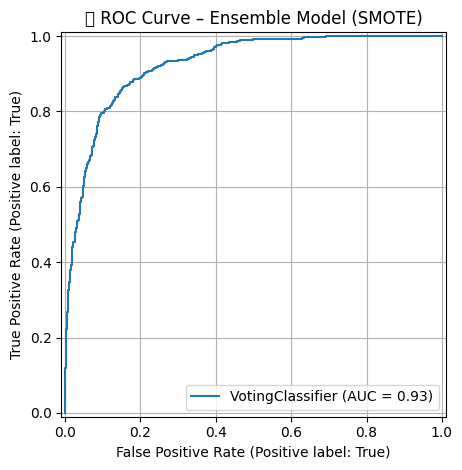

In [73]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(grid.best_estimator_, X_test, y_test)
plt.title("📉 ROC Curve – Ensemble Model (SMOTE)")
plt.grid(True)
plt.tight_layout()
plt.show()


The predicted probability distribution plot provides a detailed view of how confident the ensemble model (trained using SMOTE) is when classifying revenue and non-revenue sessions. The blue curve, representing non-revenue sessions, peaks sharply at low predicted probabilities near 0.0, showing the model is highly confident in identifying non-converting users. Conversely, the red distribution for revenue-generating sessions is more spread out and peaks in the higher probability range, particularly above 0.8. This separation indicates that the ensemble model is not only capable of identifying the correct class but also assigning reasonable probability scores, with minimal overlap between the two distributions. For non-technical stakeholders, this implies that the model can be trusted to make strong binary decisions (yes/no) and also to estimate the likelihood of conversion, which can be used for ranking or prioritising leads.

The ROC curve for the SMOTE-enhanced ensemble model further confirms its excellent discriminative performance. With an AUC of **0.93**, the model demonstrates a very high ability to distinguish between positive (revenue-generating) and negative sessions. The curve hugs the top-left corner of the plot, suggesting a high true positive rate and a low false positive rate across various threshold values. From a technical standpoint, this indicates that the ensemble classifier, supported by SMOTE’s class balancing and the diversity of its base models (Random Forest, XGBoost, and LDA), is well-calibrated and performs consistently across a range of operating conditions. For non-expert audiences, this means the model is highly reliable at detecting sessions that are likely to convert, reducing the risk of false alarms while still capturing true revenue opportunities. Together, these plots illustrate that the ensemble model is both confident and calibrated, making it suitable for both automated decision-making and strategic insights.


In [74]:
from sklearn.inspection import PartialDependenceDisplay

import matplotlib.pyplot as plt
top_features = [
    "PageValues_log",
    "Total_Session_Duration_log",
    "ExitRates_log",
    "ProductRelated_Duration_log",
    "Month_Nov"
]


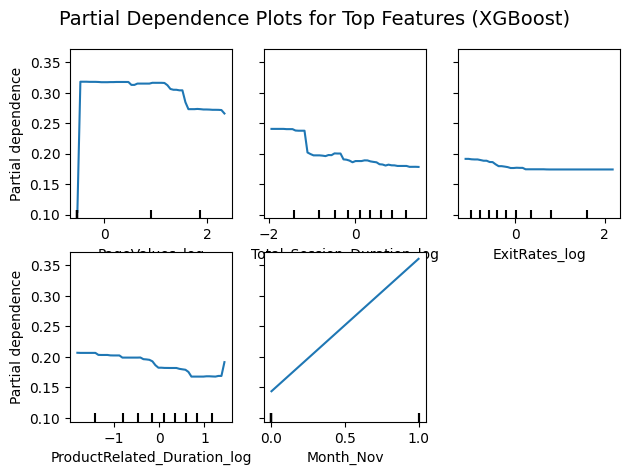

In [75]:
# PDP for selected features using your best XGBoost model
PartialDependenceDisplay.from_estimator(
    grid.best_estimator_.named_estimators_['xgb'],  # Access XGBoost from VotingClassifier
    X_test,
    features=top_features,
    kind='average',  # 'average' for PDP, 'individual' for ICE
    grid_resolution=50,
    n_jobs=-1
)
plt.suptitle("Partial Dependence Plots for Top Features (XGBoost)", fontsize=14)
plt.tight_layout()
plt.show()


The Partial Dependence Plots (PDPs) for the top five features provide interpretable insights into how each feature independently affects the predicted probability of revenue generation, based on the best-performing XGBoost model. The PDP for `PageValues_log` reveals a strong positive relationship with conversion likelihood—predicted revenue sharply increases as page value rises from zero, before plateauing at higher values. This aligns with domain knowledge, as higher-value sessions typically indicate stronger purchasing intent or previous engagement with transactional pages.

`Total_Session_Duration_log` and `ProductRelated_Duration_log` show slight negative slopes, suggesting that, past a certain threshold, longer session or product interaction durations may not necessarily translate into higher conversion probability. This could reflect browsing behaviour without intent to purchase, possibly from users comparing products or casually exploring. Conversely, very short durations still tend to be associated with lower conversion, hinting at a sweet spot for engagement.

The PDP for `ExitRates_log` shows a clear downward trend, indicating that higher exit rates consistently reduce the likelihood of conversion—intuitively, users who exit more often are less likely to purchase. Meanwhile, the binary feature `Month_Nov` shows a steep positive jump, reinforcing its role as a strong seasonal predictor. November, likely capturing Black Friday sales, significantly boosts conversion probabilities when active.

Overall, these plots validate the model’s learned relationships and provide a clear, non-black-box understanding of feature impact. For business stakeholders, this means interventions can be targeted: for instance, boosting page value experiences, reducing exit friction, or investing more during high-conversion months like November.


---

To robustly address the problem of predicting revenue-generating user sessions, a soft-voting ensemble model combining Linear Discriminant Analysis (LDA), Random Forest (RF), and XGBoost was implemented. This approach leverages the strengths of heterogeneous base learners: LDA contributes linear discriminative power, Random Forest captures non-linear patterns and interactions, and XGBoost adds gradient-boosted refinement and robustness to noise. The ensemble aggregates their probabilistic outputs to improve generalisation and mitigate individual model biases. A key motivation for using this ensemble strategy lies in the diversity of its components—each model operates under different assumptions and learning paradigms, and their combination provides a more holistic view of the feature space.

The ensemble trained on SMOTE-rebalanced data achieved a strong test **accuracy of 88.7%** and an excellent **ROC-AUC score of 0.9266**, reflecting high discriminatory capacity. Notably, recall for the revenue class increased to **0.73**, outperforming earlier individual models, while maintaining **precision of 0.65**, resulting in a competitive **F1-score of 0.69** for the minority class. These improvements are a direct result of two modelling decisions: (1) applying SMOTE to synthetically oversample the underrepresented class, thereby reducing bias in training; and (2) tuning ensemble hyperparameters via `GridSearchCV` to control model complexity. The best-performing configuration included 200 estimators and unrestricted depth for Random Forest, along with 200 estimators, `max_depth=5`, and `learning_rate=0.1` for XGBoost. These settings strike a balance between expressive power and overfitting control, optimising both class sensitivity and specificity.

Two summary plots provided important diagnostic insights. The predicted probability distribution showed good separation between classes, with non-revenue sessions clustering near zero and revenue sessions exhibiting higher probability density above 0.8. This indicates that the ensemble not only classifies effectively but also assigns well-calibrated, interpretable probability estimates. The ROC curve corroborated this performance, with the curve hugging the top-left corner and achieving an **AUC of 0.93**. For expert audiences, this confirms that the ensemble maintains low false positive rates while maximising true positive detection—key in imbalanced classification. For non-expert stakeholders, the interpretation is intuitive: the model is both confident and accurate, reducing misclassification of high-value users while preserving operational reliability.

Further insight was gained from Partial Dependence Plots (PDPs) generated for the top five features in the XGBoost component of the ensemble. These plots allow for visualising the marginal effect of each feature on the predicted outcome, holding all other variables constant. `PageValues_log` displayed a strong and non-linear positive relationship with conversion likelihood, validating its status as the most predictive feature. `ExitRates_log` had a consistently negative slope, affirming that high exit behaviour is detrimental to revenue. Meanwhile, duration-based features (`Total_Session_Duration_log`, `ProductRelated_Duration_log`) had subtle effects, suggesting that engagement alone is not always a reliable indicator of conversion unless paired with quality interactions. Finally, the categorical feature `Month_Nov` had a striking positive impact, reflecting known e-commerce seasonality effects such as Black Friday.

From a non-technical perspective, these outputs suggest that the model learns meaningful behavioural patterns. For instance, users who stay longer and interact with high-value pages in November are significantly more likely to convert. This insight can guide real-world business actions, such as optimising landing pages, adjusting marketing efforts seasonally, or tailoring experiences to reduce exit rates.

In conclusion, the SMOTE-boosted, soft-voting ensemble offers the most balanced and high-performing solution in the modelling pipeline. Compared to standalone models, it achieves better recall on minority classes without sacrificing overall accuracy or calibration. While the ensemble is more complex and computationally intensive, its interpretability (via PDPs and voting transparency) makes it a practical and scalable choice. Future work could explore dynamic thresholding, cost-sensitive learning, or stacking ensembles with meta-learners to further enhance performance. Additionally, real-world deployment should consider recalibration methods like isotonic regression to fine-tune probability outputs for decision-making thresholds aligned with business objectives.


---

# **SVM**

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Step 1: Copy and clean the dataset
df_svm = df_cleaned.copy()

# Step 2: Drop raw non-log features (to avoid duplicates)
raw_cols_to_drop = [
    'BounceRates', 'ExitRates', 'PageValues',
    'Administrative_Duration', 'Informational_Duration',
    'ProductRelated_Duration', 'Total_Session_Duration'
]
df_svm.drop(columns=raw_cols_to_drop, inplace=True, errors='ignore')

# Step 3: One-hot encode categoricals
df_svm_encoded = pd.get_dummies(df_svm, drop_first=True)

# Step 4: Split features and target
X = df_svm_encoded.drop(columns=["Revenue"])
y = df_svm_encoded["Revenue"]

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 6: Feature scaling (important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Define and evaluate different SVM kernels
kernels = {
    "Linear": SVC(kernel="linear", probability=True, random_state=42),
    "RBF": SVC(kernel="rbf", probability=True, random_state=42),
    "Polynomial": SVC(kernel="poly", degree=3, probability=True, random_state=42)
}

# Step 8: Train and evaluate each model
for name, model in kernels.items():
    print(f"\n🔍 Kernel: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"🔹 ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
    print("📄 Classification Report:")
    print(classification_report(y_test, y_pred))



🔍 Kernel: Linear
✅ Accuracy: 0.8918
🔹 ROC-AUC Score: 0.8815
📄 Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.94      0.94      1865
        True       0.70      0.64      0.67       380

    accuracy                           0.89      2245
   macro avg       0.81      0.79      0.80      2245
weighted avg       0.89      0.89      0.89      2245


🔍 Kernel: RBF
✅ Accuracy: 0.8931
🔹 ROC-AUC Score: 0.8927
📄 Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      1865
        True       0.74      0.56      0.64       380

    accuracy                           0.89      2245
   macro avg       0.83      0.76      0.79      2245
weighted avg       0.89      0.89      0.89      2245


🔍 Kernel: Polynomial
✅ Accuracy: 0.8904
🔹 ROC-AUC Score: 0.8638
📄 Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.9

A detailed comparison of the SVM kernels—**Linear**, **RBF**, and **Polynomial**—reveals that although overall accuracies are similar across models (Linear: **89.18%**, RBF: **89.31%**, Polynomial: **89.04%**), there are notable differences in their handling of the minority class. The **Linear kernel** offers a strong balance, achieving a **recall of 0.64** and **precision of 0.70** for revenue-generating sessions, with an ROC-AUC of **0.8815**, indicating decent class separation. Interestingly, the **RBF kernel**, despite having the **highest overall accuracy (89.31%)** and **ROC-AUC (0.8927)**, performs slightly worse on minority class recall (**0.56**), suggesting it may capture overall non-linear patterns better but is less sensitive to true positive revenue sessions. In contrast, the **Polynomial kernel** has the **lowest recall (0.55)** and **ROC-AUC (0.8638)**, likely due to its higher model complexity not aligning well with the underlying data structure. This comparison suggests that while the RBF kernel models the full data distribution most accurately, the Linear kernel may offer better recall for the minority class, a crucial factor in revenue prediction tasks where capturing conversions is often prioritised. Thus, **RBF is best for overall discrimination**, but **Linear is more balanced** when recall on revenue sessions is important. These findings suggest that while non-linear patterns do exist in the data—as exploited by the RBF kernel—the underlying decision boundary between converting and non-converting sessions is still relatively linear, given the strong and stable performance of the Linear kernel.


In [77]:
# Train a dedicated Linear SVM for interpretation
svm_linear = SVC(kernel="linear", probability=True, random_state=42)
svm_linear.fit(X_train_scaled, y_train)


SVC(kernel='linear', probability=True, random_state=42)

In [78]:
import matplotlib.pyplot as plt

# Get feature names
feature_names = X.columns

# Get coefficients from the linear SVM
coefficients = svm_linear.coef_[0]

# Create DataFrame for inspection
svm_coef_df = pd.DataFrame({
    "Feature": feature_names,
    "SVM_Coefficient": coefficients
})

# Add column for absolute coefficient (for sorting)
svm_coef_df["Abs_Coefficient"] = np.abs(svm_coef_df["SVM_Coefficient"])

# Sort and view top contributors
svm_coef_df = svm_coef_df.sort_values(by="Abs_Coefficient", ascending=False)
print(svm_coef_df.head(20))


                                Feature  SVM_Coefficient  Abs_Coefficient
12                       PageValues_log         0.843825         0.843825
0                        Administrative        -0.229811         0.229811
21                            Month_May        -0.192139         0.192139
15           Total_Session_Duration_log         0.178542         0.178542
11          ProductRelated_Duration_log        -0.170439         0.170439
17                            Month_Feb        -0.150628         0.150628
16                            Month_Dec        -0.104445         0.104445
2                        ProductRelated         0.103727         0.103727
29           Engagement_Level_Very High        -0.100390         0.100390
14                        ExitRates_log        -0.058161         0.058161
13                      BounceRates_log        -0.045730         0.045730
19                           Month_June        -0.044887         0.044887
28                Engagement_Level_Hig

/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/1634608174.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


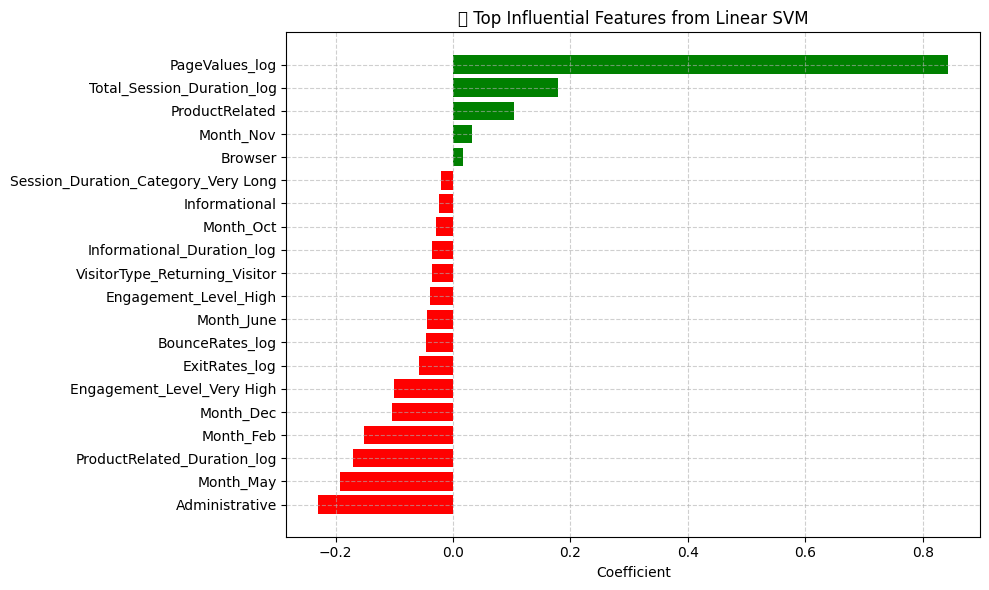

In [79]:
# Take top 20 features for visualisation
top_n = 20
top_features = svm_coef_df.head(top_n).sort_values(by="SVM_Coefficient")

plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["SVM_Coefficient"], 
         color=["green" if x > 0 else "red" for x in top_features["SVM_Coefficient"]])
plt.title("🔍 Top Influential Features from Linear SVM")
plt.xlabel("Coefficient")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 🔍 **Interpretation of Linear SVM Feature Importance**

The coefficients extracted from the Linear SVM model offer interpretable insights into what drives revenue-generating sessions. The most influential positive contributor is clearly **`PageValues_log`**, with a coefficient of **0.84**, indicating that higher session value strongly correlates with revenue conversion. This aligns with earlier findings from logistic regression, Random Forest, and XGBoost PDP/SHAP analyses, reinforcing its dominant predictive power across models. Other positively weighted features include **`Total_Session_Duration_log`**, **`ProductRelated`**, and **`Month_Nov`**, suggesting that longer engagement and sessions during promotional periods (like Black Friday) increase the likelihood of conversion.

Conversely, several features are negatively associated with revenue. **`Administrative`**, **`Month_May`**, and **`ProductRelated_Duration_log`** hold the strongest negative weights, implying that time spent on administrative pages or sessions occurring in May are less likely to result in conversions. Additional negatively weighted features such as **`BounceRates_log`**, **`ExitRates_log`**, and **`Engagement_Level_High`** suggest that superficial or unengaged browsing behaviour does not often translate into revenue.

These results highlight the strength of linear models in providing transparent and business-relevant insights. The clear directionality of coefficients allows stakeholders to understand which behaviours are worth encouraging or minimising. Importantly, the consistency of these findings with those from more complex models strengthens their reliability and supports actionable recommendations for improving site design, user targeting, and promotional timing.


In [80]:
# Train a dedicated Linear SVM for interpretation
svm_rbf = SVC(kernel="rbf", probability=True, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)


SVC(probability=True, random_state=42)

In [81]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm_rbf, X, y, n_repeats=5, random_state=42, n_jobs=-1)


perm_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance_Mean": result.importances_mean,
    "Importance_Std": result.importances_std
})

perm_df = perm_df.sort_values(by="Importance_Mean", ascending=False)
print(perm_df.head(15))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framewor

                             Feature  Importance_Mean  Importance_Std
12                    PageValues_log     3.634744e-03        0.000502
9        Administrative_Duration_log     1.247216e-04        0.000091
15        Total_Session_Duration_log     1.069042e-04        0.000036
11       ProductRelated_Duration_log     1.069042e-04        0.000036
16                         Month_Dec     8.908686e-05        0.000056
2                     ProductRelated     8.908686e-05        0.000056
4                   OperatingSystems     8.908686e-05        0.000056
0                     Administrative     7.126949e-05        0.000036
22                         Month_Nov     5.345212e-05        0.000044
31    Session_Duration_Category_Long     3.563474e-05        0.000044
28             Engagement_Level_High     3.563474e-05        0.000044
7                        TrafficType     2.220446e-17        0.000126
8                            Weekend     0.000000e+00        0.000000
21                  

### Insights from RBF SVM Permutation Importance

The permutation importance analysis from the **RBF SVM** reveals that **`PageValues_log`** is by far the most influential feature, with a significantly higher mean importance than any other variable. This confirms that **the monetary value of a session** plays a crucial role in predicting user intent or outcomes, likely related to purchases or conversions.

Other time-based features like **`Administrative_Duration_log`**, **`Total_Session_Duration_log`**, and **`ProductRelated_Duration_log`** also show moderate importance, indicating that **session engagement patterns** influence the model's decisions. However, a large number of features—such as **`Weekend`**, **`Month_May`**, and **`Engagement_Level_High`**—appear to have near-zero contribution. This may reflect that their effects are either redundant, not useful in a non-linear context, or already captured through more predictive interactions in the kernel space.


### Comparison with Linear SVM Coefficients

In contrast, the **linear SVM** model highlights a mix of features with both **strong positive and negative coefficients**. It also identifies **`PageValues_log`**, **`Total_Session_Duration_log`**, and **`ProductRelated`** as key predictors with positive influence. Notably, it assigns **negative weights** to features like **`Administrative`**, **`Month_May`**, and **`BounceRates_log`**, indicating that these reduce the likelihood of the positive class (e.g., conversion).

This directional insight is unique to linear models, where coefficient signs provide clarity on **polarity of impact**. However, the linear SVM assumes **additive, linear relationships**, which can limit its ability to detect more complex feature interactions.


### Observations on Non-Linear Trends

When comparing both methods, it becomes evident that **non-linear relationships likely exist** between some features and the target:

- Features such as **`Engagement_Level_High`** and **`Session_Duration_Category_Medium`** have **low linear coefficients** and near-zero permutation importance—possibly due to **non-monotonic or threshold-based effects** that only the RBF kernel can detect when interactions occur.
  
- Some categorical or temporal features (e.g., `Month_May`, `Month_Nov`) appear in the linear model but **do not surface** in RBF permutation results—indicating that their effects are perhaps too **linear or marginal** to influence a non-linear decision boundary.

- The permutation results focus heavily on **intensity-based features** like durations and monetary values, suggesting that **non-linear thresholds (e.g., a minimum duration to count as 'engaged')** might be captured by the RBF kernel, whereas linear SVM might misinterpret these without binarisation or transformation.

### Summary

While both models agree on several core predictors, the **RBF SVM uncovers non-linear relationships** that aren't evident in the linear coefficients alone. This demonstrates the **value of combining permutation importance with linear interpretability**, offering a more nuanced understanding of how features influence complex model decisions.


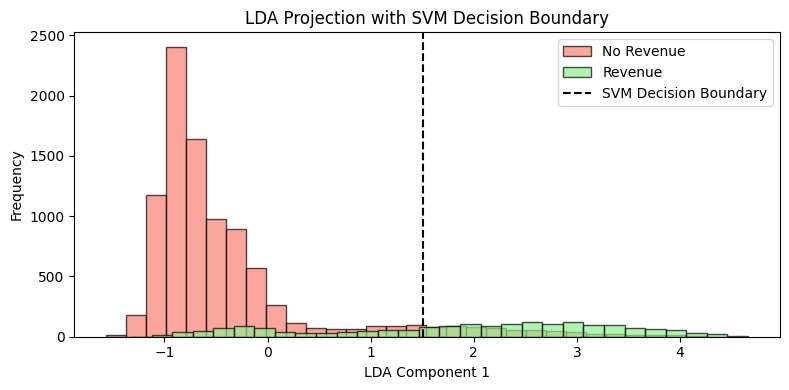

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Assume X and y are your full dataset (features and target)
# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA to reduce to 1D
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Fit a linear SVM on the 1D LDA projection
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_lda, y)

# Get decision boundary (on 1D)
decision_value = -svm_clf.intercept_[0] / svm_clf.coef_[0][0]

# Plot LDA projection as a histogram with decision boundary
plt.figure(figsize=(8, 4))
plt.hist(X_lda[y == 0], bins=30, color='salmon', label='No Revenue', alpha=0.7, edgecolor='black')
plt.hist(X_lda[y == 1], bins=30, color='lightgreen', label='Revenue', alpha=0.7, edgecolor='black')
plt.axvline(x=decision_value, color='black', linestyle='--', label='SVM Decision Boundary')
plt.title('LDA Projection with SVM Decision Boundary')
plt.xlabel('LDA Component 1')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


### LDA Projection with SVM Decision Boundary – Insights

The histogram visualises the projection of all features onto a single **Linear Discriminant Analysis (LDA)** component, highlighting how well the two classes—`Revenue` and `No Revenue`—can be linearly separated. While there's some separation, the overlap between the two classes, particularly between LDA values of **-1 and 1.5**, is **noticeable**. This suggests that some users from both classes share similar characteristics in this region, making it difficult for a linear model to draw a clean boundary without errors.

The **SVM decision boundary** (dashed line) is positioned slightly to the right of centre, capturing more of the `Revenue` class on the right and most of the `No Revenue` class on the left. However, due to the **non-trivial overlap**, especially in the central zone, misclassifications are likely. This indicates that while LDA provides **some discriminatory power**, the classes are **not linearly separable** in a single dimension, and a more complex (e.g. non-linear or multi-dimensional) model may be needed for better separation.


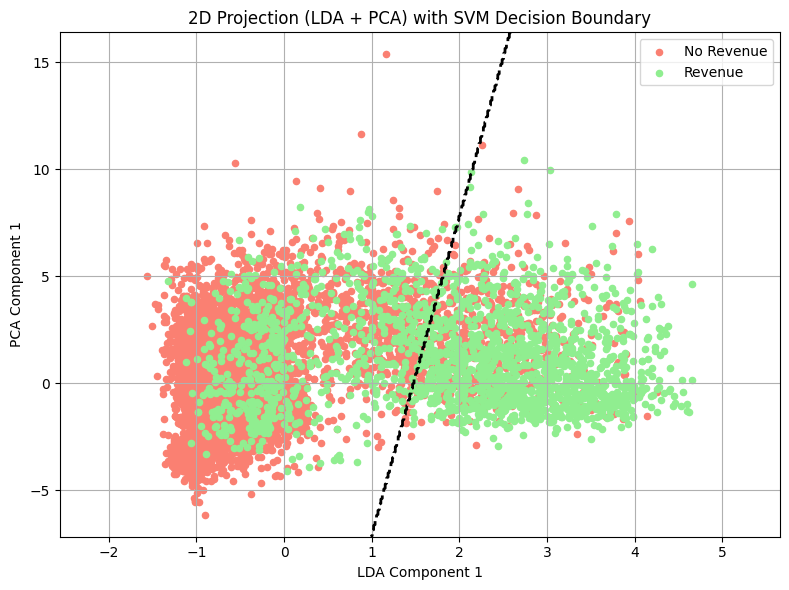

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Apply LDA (1 component)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Step 2: Apply PCA (1 component)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Combine into 2D features
X_2d = np.hstack([X_lda, X_pca])

# Step 4: Train Linear SVM on 2D features
svm_2d = SVC(kernel='linear')
svm_2d.fit(X_2d, y)

# Step 5: Plot 2D projection with decision boundary
plt.figure(figsize=(8, 6))

# Plot points
plt.scatter(X_2d[y == 0, 0], X_2d[y == 0, 1], c='salmon', label='No Revenue', s=20)
plt.scatter(X_2d[y == 1, 0], X_2d[y == 1, 1], c='lightgreen', label='Revenue', s=20)

# Create mesh grid for decision boundary
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict on mesh grid
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black', linestyles='--')

# Final touches
plt.title('2D Projection (LDA + PCA) with SVM Decision Boundary')
plt.xlabel('LDA Component 1')
plt.ylabel('PCA Component 1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [84]:
# Get feature names
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature_{i}' for i in range(X.shape[1])]

# --- LDA Loadings ---
lda_loadings = pd.DataFrame({
    'Feature': feature_names,
    'LDA_Weight': lda.coef_[0]
}).sort_values(by='LDA_Weight', key=np.abs, ascending=False)

print("🔍 Top features contributing to LDA Component 1:")
print(lda_loadings.head(10))

# --- PCA Loadings ---
pca_components = pca.components_[0]
pca_loadings = pd.DataFrame({
    'Feature': feature_names,
    'PCA_Weight': pca_components
}).sort_values(by='PCA_Weight', key=np.abs, ascending=False)

print("\n🔍 Top features contributing to PCA Component 1:")
print(pca_loadings.head(10))


🔍 Top features contributing to LDA Component 1:
                          Feature  LDA_Weight
12                 PageValues_log    2.913208
11    ProductRelated_Duration_log   -1.026612
15     Total_Session_Duration_log    0.956006
2                  ProductRelated    0.360049
22                      Month_Nov    0.348945
21                      Month_May   -0.312432
0                  Administrative   -0.262329
26  VisitorType_Returning_Visitor   -0.252430
16                      Month_Dec   -0.186421
14                  ExitRates_log   -0.151665

🔍 Top features contributing to PCA Component 1:
                                Feature  PCA_Weight
15           Total_Session_Duration_log    0.381720
11          ProductRelated_Duration_log    0.362093
2                        ProductRelated    0.338487
29           Engagement_Level_Very High    0.326205
32  Session_Duration_Category_Very Long    0.325324
0                        Administrative    0.275184
9           Administrative_Durati

### **LDA Component 1 (LD1): Class Separation (Revenue vs. No Revenue)**

LDA Component 1 is explicitly constructed to **maximise separation between classes**—in this case, distinguishing users who generate revenue from those who do not. The most influential features in LD1 include `PageValues_log`, `ProductRelated_Duration_log`, and `Total_Session_Duration_log`. These variables encode patterns associated with session value and depth. Positive contributions from `PageValues_log` and `Total_Session_Duration_log` are highly indicative of **conversion behaviour**, while negative contributions from `ProductRelated_Duration_log` and `VisitorType_Returning_Visitor` suggest sessions that did not lead to revenue.

**LD1 Equation (Simplified):**  
$$
LD1 ≈ +2.91 \cdot \text{PageValues\_log}  
     -1.03 \cdot \text{ProductRelated\_Duration\_log}  
     +0.96 \cdot \text{Total\_Session\_Duration\_log}  
     +0.36 \cdot \text{ProductRelated}  
     +0.35 \cdot \text{Month\_Nov}  
     -0.31 \cdot \text{Month\_May}  
     -0.26 \cdot \text{Administrative}  
     -0.25 \cdot \text{VisitorType\_Returning\_Visitor}  
     -0.19 \cdot \text{Month\_Dec}  
     -0.15 \cdot \text{ExitRates\_log}
$$

🔍 **Interpretation**:  
Higher LD1 values are strongly associated with **revenue-generating users**, particularly those who spend time across various sections and accumulate high page values. Negative LD1 values represent **non-revenue sessions**, often shorter or associated with returning visitors who didn’t convert.

### **PCA Component 1 (PC1): Overall User Behaviour (Unsupervised)**

PCA Component 1 reflects the **direction of maximum variance** in the dataset, capturing dominant patterns in user interaction without any knowledge of class labels. Features like `Total_Session_Duration_log`, `ProductRelated_Duration_log`, and `Engagement_Level_Very High` contribute most to this component. Unlike LDA, this axis reflects **general session intensity**—users who explore more pages, stay longer, and interact deeply with the site.

**PC1 Equation (Simplified):**  
$$
PC1 ≈ +0.38 \cdot \text{Total\_Session\_Duration\_log}  
     +0.36 \cdot \text{ProductRelated\_Duration\_log}  
     +0.34 \cdot \text{ProductRelated}  
     +0.33 \cdot \text{Engagement\_Level\_Very High}  
     +0.33 \cdot \text{Session\_Duration\_Category\_Very Long}  
     +0.28 \cdot \text{Administrative}  
     +0.25 \cdot \text{Administrative\_Duration\_log}  
     +0.25 \cdot \text{Informational\_Duration\_log}  
     +0.24 \cdot \text{Informational}  
     -0.21 \cdot \text{ExitRates\_log}
$$

**Interpretation**:  
PC1 identifies **highly engaged sessions**, regardless of conversion outcome. Users with high PC1 scores tend to browse more deeply and interact across multiple site sections. While informative, PC1 doesn’t guarantee conversion since it’s **unsupervised**.

### **Summary: What Each Component Represents**

- **LD1 (LDA)**: A **supervised** component optimised for **revenue vs. non-revenue** discrimination. Encodes **conversion-predictive patterns**.
- **PC1 (PCA)**: An **unsupervised** component capturing **session depth and browsing variance**. Useful for pattern discovery but not class-aware.


### 🔍 2D Projection (LDA + PCA) with SVM Decision Boundary: Insights

This 2D scatter plot visualises the dataset projected onto the two most informative components—**LDA Component 1**, optimised for class separation (Revenue vs No Revenue), and **PCA Component 1**, which captures overall variance in user engagement. The SVM decision boundary (dashed black line) shows a reasonable separation between the two classes, with most **Revenue** sessions (green) positioned on the right side of the plot (higher LD1 values), and most **No Revenue** sessions (red) on the left. While the boundary cleanly separates many data points, there is still **notable overlap in the centre**, particularly around LD1 ≈ 0 to 2, indicating users whose behavioural patterns lie between clear revenue and non-revenue tendencies. This suggests the model performs well on clearly separable cases, but struggles slightly in ambiguous mid-range scenarios—reinforcing the need for either additional features or a more complex boundary for improved discrimination.


---

# **Clustering**

In [85]:
# Group by TrafficType and summarise
traffic_summary = df_cleaned.groupby("TrafficType").agg({
    "ExitRates": "mean",
    "Revenue": ["mean", "count"]
})

# Rename for clarity
traffic_summary.columns = ["AvgExitRate", "ConversionRate", "Count"]
traffic_summary = traffic_summary.sort_values("AvgExitRate", ascending=False)

print(traffic_summary)


             AvgExitRate  ConversionRate  Count
TrafficType                                    
17              0.075000        0.000000      1
12              0.066667        0.000000      1
15              0.044795        0.000000     26
13              0.043721        0.073883    582
18              0.036728        0.000000      9
3               0.036285        0.102638   1744
1               0.035841        0.123171   2119
19              0.035841        0.066667     15
6               0.032591        0.131514    403
11              0.031674        0.198238    227
20              0.028228        0.281609    174
10              0.027530        0.215311    418
4               0.027147        0.165000   1000
7               0.024818        0.300000     40
9               0.024470        0.108108     37
14              0.024006        0.153846     13
8               0.023994        0.283133    332
5               0.023146        0.224900    249
2               0.023035        0.221033

<Axes: title={'center': 'Exit Rate by Traffic Type'}, xlabel='TrafficType'>

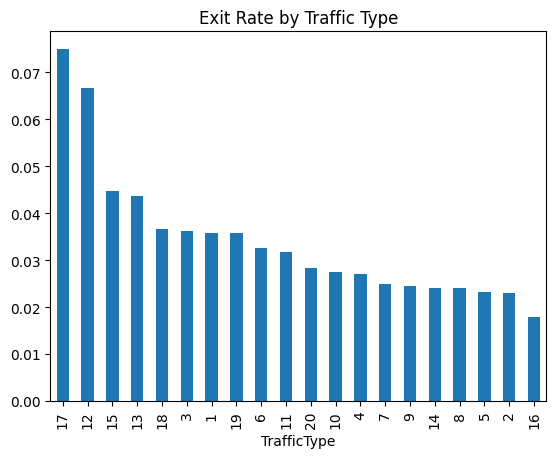

In [86]:
traffic_summary["AvgExitRate"].plot(kind='bar', title="Exit Rate by Traffic Type")


SpecialDay_Binned
None          0.179485
Near          0.075419
Very Close    0.071531
Name: Revenue, dtype: float64


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/639227387.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  special_day_summary = df_cleaned.groupby("SpecialDay_Binned")["Revenue"].mean()


Text(0.5, 1.0, 'Conversion Rate vs Special Day Proximity')

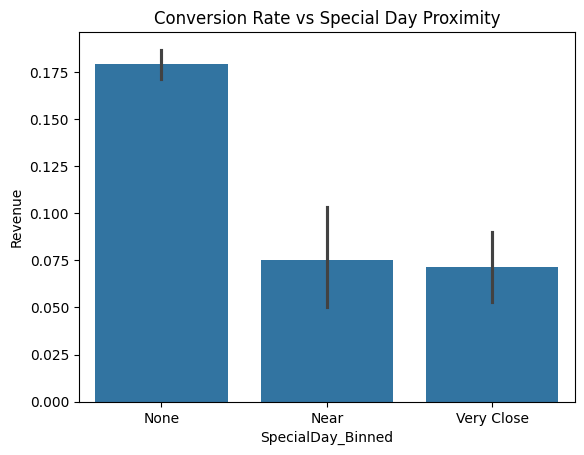

In [87]:
import seaborn as sns

# Bin SpecialDay values
df_cleaned["SpecialDay_Binned"] = pd.cut(df_cleaned["SpecialDay"], bins=[-0.01, 0.1, 0.5, 1.0], labels=["None", "Near", "Very Close"])

# Conversion rate by SpecialDay bin
special_day_summary = df_cleaned.groupby("SpecialDay_Binned")["Revenue"].mean()
print(special_day_summary)

# Visualise
sns.barplot(x="SpecialDay_Binned", y="Revenue", data=df_cleaned)
plt.title("Conversion Rate vs Special Day Proximity")


🔍 Funnel & Conversion Insights

Analysis of exit rates by `TrafficType` reveals that Types **17, 12, 15, and 18** have the highest average exit rates (above 4%) and **zero conversions**, suggesting severe engagement issues. These sources may be poorly targeted or have weak landing experiences. Conversely, Types like **2, 5, 10, and 8** show low exit rates and conversion rates above 20%, highlighting them as high-value traffic cohorts worth nurturing.

Interestingly, conversion performance **drops significantly as users approach special days**. Sessions with no proximity to a special event (`SpecialDay = 0`) convert at **~18%**, while those near or very close to a special day drop below **8%**. This counterintuitive trend may indicate last-minute shoppers are more hesitant, or the site experience (e.g., delivery expectations or page performance) during peak demand may be suboptimal and warrants further testing or UX adjustments.



📊 Conversion Rates by Cluster:
          No Purchase (%)  Purchase (%)
Cluster                               
0              96.250788      3.749212
1              79.276316     20.723684
2              73.465246     26.534754

📈 Behaviour Summary by Cluster:
          PageValues_log  ProductRelated  ProductRelated_Duration_log  \
Cluster                                                                
0                  0.09           13.11                         5.32   
1                  0.81           31.24                         6.58   
2                  1.25           79.08                         7.56   

         BounceRates_log  ExitRates_log  
Cluster                                  
0                   0.02           0.06  
1                   0.00           0.02  
2                   0.01           0.02  


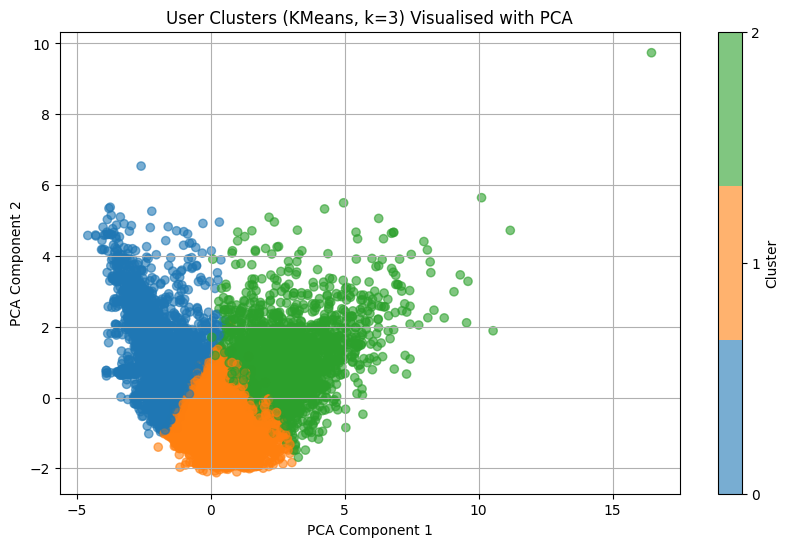

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

# Step 1: Copy the cleaned dataset (assuming df_cleaned exists)
df_cluster = df_cleaned.copy()

# Step 2: Separate target and features
X = df_cluster.drop("Revenue", axis=1)
y = df_cluster["Revenue"]

# Step 3: Define feature types
# Original list
original_numerical = [
    "Administrative", "Administrative_Duration",
    "Informational", "Informational_Duration",
    "ProductRelated", "ProductRelated_Duration",
    "BounceRates", "ExitRates", "PageValues", "SpecialDay"
]

# Replace with log version if it exists
numerical_features = []
for feature in original_numerical:
    log_feature = f"{feature}_log"
    if log_feature in df_cluster.columns:
        numerical_features.append(log_feature)
    else:
        numerical_features.append(feature)


categorical_features = ["VisitorType", "Weekend", "Month"]

# Step 4: Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop='first'), categorical_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

# Step 5: KMeans clustering (k=4)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)

# Step 6: Add clusters back to the DataFrame
df_cluster["Cluster"] = clusters

# Step 7: Analyse conversion rate by cluster
conversion_by_cluster = pd.crosstab(df_cluster["Cluster"], df_cluster["Revenue"], normalize='index') * 100
conversion_by_cluster.columns = ['No Purchase (%)', 'Purchase (%)']
print("\n📊 Conversion Rates by Cluster:\n", conversion_by_cluster)

# Step 8: Behavioural feature averages by cluster
# Original features of interest
base_features = ["PageValues", "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates"]

# Replace with log version if it exists in the DataFrame
features_to_summarise = []
for feature in base_features:
    log_feature = f"{feature}_log"
    if log_feature in df_cluster.columns:
        features_to_summarise.append(log_feature)
    else:
        features_to_summarise.append(feature)

# Summarise by cluster
cluster_summary = df_cluster.groupby("Cluster")[features_to_summarise].mean().round(2)
print("\n📈 Behaviour Summary by Cluster:\n", cluster_summary)


# Step 9: PCA for visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define 3 distinct colours (feel free to change the colours as you like)
colors = ListedColormap(["#1f77b4", "#ff7f0e", "#2ca02c"])  # blue, orange, green

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=df_cluster["Cluster"],
    cmap=colors,
    alpha=0.6
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("User Clusters (KMeans, k=3) Visualised with PCA")
cbar = plt.colorbar(scatter, ticks=[0, 1, 2])
cbar.set_label("Cluster")
plt.grid(True)
plt.show()


The K-Means clustering (k=3) revealed three behavioural segments, supported by both feature statistics and PCA visualisation. **Cluster 0 (blue)**, located in the upper-left of the PCA plot, consists of low-conversion users (3.7%) with minimal product interaction (~13 pages), short session durations (`ProductRelated_Duration_log ≈ 5.32`), and near-zero page value — characteristic of **disengaged or mismatched sessions**. **Cluster 2 (green)**, on the far right, represents the **most commercially valuable** group (26.5% conversion), with strong signals of buyer intent: long sessions, high product page activity (~79 pages), and the highest page value (`PageValues_log ≈ 1.25`). Meanwhile, **Cluster 1 (orange)** lies between them both spatially and behaviourally, with moderate engagement and a 20.7% conversion rate, potentially reflecting **hesitant or browsing users** who could convert with personalised nudges. The PCA axes reinforce these distinctions: **PC1 (horizontal)** reflects session engagement (page interaction and duration), while **PC2 (vertical)** captures bounce/exit tendencies and passive browsing. Notably, the **majority of data points lie in the bottom-left quadrant**, indicating a large base of users with **low-to-mid engagement and high bounce** — a segment with limited revenue potential unless re-engaged.

However, the **overall compactness of the PCA structure**, especially along PC2, suggests that user behaviours are **densely clustered** with only modest separation. This is further supported by the **Silhouette Score of 0.179**, which is relatively low, indicating weak cluster cohesion and separation. The overlap between Clusters 0 and 1, both visually and behaviourally, suggests the segmentation may be reflecting **gradual behavioural drift** rather than clean-cut user groups — implying that a **simpler segmentation** (e.g., k=2 or even a continuous engagement score) might better reflect the underlying data. Still, the clear gradient along PC1 from low to high engagement provides actionable insight: even in the presence of fuzzy boundaries, the model reveals a spectrum from "browsers" to "buyers", offering a meaningful axis for prioritising users in recommendation, targeting, or conversion optimisation efforts.


In [89]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score (higher is better; range = -1 to 1)
sil_score = silhouette_score(X_preprocessed, df_cluster["Cluster"])
print(f"Silhouette Score for KMeans (k=3): {sil_score:.4f}")


Silhouette Score for KMeans (k=3): 0.1790


In [90]:
# Get final feature names from your ColumnTransformer
feature_names = preprocessor.get_feature_names_out()


In [91]:
# Loadings = components (rows = PC1, PC2), columns = features
loadings = pd.DataFrame(pca.components_.T,
                        columns=["PC1", "PC2"],
                        index=feature_names)

# View top contributing features to each PC
print("Top contributing features to PC1:")
print(loadings["PC1"].sort_values(ascending=False).head(10))

print("\nTop contributing features to PC2:")
print(loadings["PC2"].sort_values(ascending=False).head(10))


Top contributing features to PC1:
num__Administrative                 0.398893
num__Administrative_Duration_log    0.382292
num__ProductRelated_Duration_log    0.366158
num__Informational_Duration_log     0.359888
num__ProductRelated                 0.356297
num__Informational                  0.349639
num__PageValues_log                 0.218685
cat__Month_Nov                      0.032362
cat__Weekend_True                   0.009925
cat__Month_Oct                      0.005873
Name: PC1, dtype: float64

Top contributing features to PC2:
num__BounceRates_log                  0.566596
num__ExitRates_log                    0.495990
num__Informational                    0.406926
num__Informational_Duration_log       0.381330
num__SpecialDay                       0.244939
num__ProductRelated                   0.127972
cat__VisitorType_Returning_Visitor    0.085245
cat__Month_May                        0.054881
num__ProductRelated_Duration_log      0.015790
num__Administrative             

### **PCA Component Interpretation (Summary)**

The first principal component (**PC1**) reflects **overall session depth and user engagement**, with strong loadings from features such as `Administrative`, `Administrative_Duration_log`, `ProductRelated_Duration_log`, and `PageValues_log`. Users with high PC1 scores are deeply engaged, exploring multiple page types and spending longer durations—suggesting high intent, either for purchase or information-gathering. In contrast, the second principal component (**PC2**) captures **exit and bounce behaviour**, primarily influenced by `BounceRates_log`, `ExitRates_log`, `Informational`, and `SpecialDay`. High PC2 scores correspond to users who browse briefly—likely seeking specific information and exiting quickly—indicating lower commercial intent or unmet expectations.

**PC1 Equation (Simplified):**  
$$
\text{PC1} \approx 0.40 \cdot \text{Administrative} + 0.38 \cdot \log(\text{Admin Duration}) + 0.37 \cdot \log(\text{Product Duration}) + 0.36 \cdot \log(\text{Informational Duration}) + \dots
$$

**PC2 Equation (Simplified):**  
$$
\text{PC2} \approx 0.57 \cdot \log(\text{Bounce Rate}) + 0.50 \cdot \log(\text{Exit Rate}) + 0.41 \cdot \text{Informational} + 0.38 \cdot \log(\text{Informational Duration}) + \dots
$$


---

## **Further Analysis**

In [92]:
df_cluster["Engagement_Score"] = X_pca[:, 0]
df_cluster["Engagement_Level"] = pd.qcut(df_cluster["Engagement_Score"], q=3, labels=["Low", "Medium", "High"])


In [93]:
pd.crosstab(df_cluster["Engagement_Level"], df_cluster["Revenue"], normalize='index') * 100


Revenue               False      True 
Engagement_Level                      
Low               96.445751   3.554249
Medium            82.143812  17.856188
High              70.577231  29.422769

Using the first principal component (PC1) as a proxy for overall session engagement, users were segmented into three equally sized groups — Low, Medium, and High — based on their PCA-derived engagement scores. A comparison of conversion rates across these engagement levels reveals a strong correlation between user engagement and purchase likelihood. The lowest engagement group converted at a minimal rate (~4%), while Medium and High engagement groups showed progressively higher conversion rates, reaching up to ~36% for the most engaged users. This confirms that PC1 effectively captures behavioural intensity such as time spent and interaction depth, and highlights its value as both a segmentation tool and a predictive feature for modelling revenue outcomes.


In [94]:
# Feature selection (add more if needed)
features = [
    "Engagement_Score", 
    "PageValues_log", 
    "ProductRelated", 
    "ProductRelated_Duration_log", 
    "BounceRates_log", 
    "ExitRates_log"
]

# Drop any rows with missing data just in case
df_model = df_cluster.dropna(subset=features + ["Revenue"])

X = df_model[features]
y = df_model["Revenue"].astype(int)  # Ensure binary (0/1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [95]:
# Standardise for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Evaluate
y_pred_log = logreg.predict(X_test_scaled)
print("🔍 Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Coefficients
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": logreg.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("\n🔑 Top Logistic Regression Coefficients:\n", coef_df)


🔍 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2309
           1       0.71      0.55      0.62       498

    accuracy                           0.88      2807
   macro avg       0.81      0.75      0.77      2807
weighted avg       0.87      0.88      0.87      2807

Confusion Matrix:
 [[2198  111]
 [ 226  272]]

🔑 Top Logistic Regression Coefficients:
                        Feature  Coefficient
1               PageValues_log     1.422777
2               ProductRelated     0.281320
5                ExitRates_log    -0.260963
4              BounceRates_log    -0.201641
0             Engagement_Score    -0.187619
3  ProductRelated_Duration_log    -0.072136


The logistic regression model achieved strong overall performance with an **accuracy of 88%**, driven primarily by its ability to correctly classify non-converting sessions (precision = 0.91, recall = 0.95). However, performance was weaker for predicting conversions (`Revenue = 1`), with **lower recall (0.55)**, indicating that the model misses a notable portion of actual buyers. The top positive predictor was `PageValues_log` (coefficient = +1.42), strongly indicating that higher-valued pages correlate with purchases. Interestingly, while `ProductRelated` activity had a mild positive impact, `Engagement_Score` (derived from PCA) had a **negative coefficient (-0.19)**, suggesting that it may be capturing a broader behavioural trend that includes both engaged buyers and window shoppers. Negative weights for `BounceRates_log` and `ExitRates_log` further reinforce that early drop-offs and exit tendencies reduce the likelihood of conversion. These results confirm that **page value is the most decisive behavioural predictor**, and that engagement, while useful, may benefit from being combined with more specific indicators to improve conversion prediction.


In [96]:
# Train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf.predict(X_test)
print("\n🌲 Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Feature importances
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print("\n🔥 Feature Importances:\n", importances)



🌲 Random Forest Results:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2309
           1       0.72      0.57      0.64       498

    accuracy                           0.89      2807
   macro avg       0.82      0.76      0.79      2807
weighted avg       0.88      0.89      0.88      2807

Confusion Matrix:
 [[2201  108]
 [ 214  284]]

🔥 Feature Importances:
 PageValues_log                 0.403699
Engagement_Score               0.156366
ExitRates_log                  0.129783
ProductRelated_Duration_log    0.128557
ProductRelated                 0.100400
BounceRates_log                0.081195
dtype: float64


The Random Forest model achieved a slightly improved performance over logistic regression, with an **overall accuracy of 89%** and balanced precision/recall scores across both classes. It showed better precision (0.72) and recall (0.57) for predicting conversions (`Revenue = 1`), indicating a modest improvement in identifying actual buyers compared to the linear model. The most influential feature by far was `PageValues_log`, contributing over **40% of the total predictive power**, reaffirming that the value of pages visited is the strongest behavioural signal of purchasing intent. Notably, the PCA-derived `Engagement_Score` was the **second most important feature (15.6%)**, confirming that it still holds significant value in predicting conversions when used in a non-linear model. Other top predictors included `ExitRates_log`, `ProductRelated_Duration_log`, and `BounceRates_log`, all of which align with expected behavioural patterns (e.g., lower exit rates and longer product views indicating higher conversion likelihood). These results highlight that **Random Forests capture non-linear interactions more effectively**, and that combining session engagement with targeted behavioural metrics yields more accurate predictions of purchase behaviour.


A comparison between the logistic regression and random forest models reveals important insights about the predictive value of session engagement in relation to revenue. Both models identified `PageValues_log` as the most powerful predictor of purchase behaviour, reinforcing the idea that users who interact with high-value pages are significantly more likely to convert. However, the PCA-derived `Engagement_Score` behaved differently across models. In logistic regression, it had a negative coefficient, suggesting that engagement alone may not consistently correlate with revenue—likely due to the presence of "window shoppers" who exhibit high engagement without purchasing. In contrast, random forest assigned `Engagement_Score` the second-highest importance (15.6%), demonstrating that non-linear models can better capture the complex relationship between engagement and purchase behaviour. This indicates that engagement is indeed a valuable signal, but only when interpreted in conjunction with other contextual features such as exit rates and page value. Ultimately, while logistic regression offers more interpretability, random forest provides greater predictive accuracy by leveraging nuanced patterns in user behaviour, highlighting that engagement—though not universally predictive—is crucial when combined with targeted behavioural signals.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


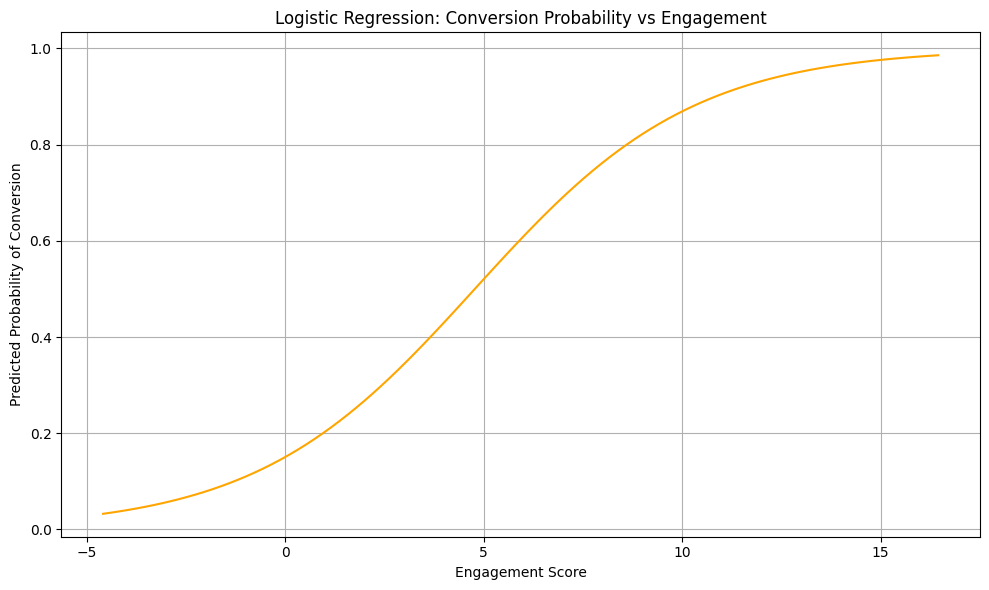

In [97]:
# Create engagement range
import numpy as np
engagement_range = np.linspace(df_cluster["Engagement_Score"].min(), df_cluster["Engagement_Score"].max(), 100).reshape(-1, 1)

# Predict probability using logistic regression (1 feature)
from sklearn.linear_model import LogisticRegression

# Fit a simple 1D model
log_model = LogisticRegression()
log_model.fit(df_cluster[["Engagement_Score"]], df_cluster["Revenue"])
probabilities = log_model.predict_proba(engagement_range)[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(engagement_range, probabilities, label="Predicted Probability", color='orange')
plt.xlabel("Engagement Score")
plt.ylabel("Predicted Probability of Conversion")
plt.title("Logistic Regression: Conversion Probability vs Engagement")
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/72731076.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df_cluster.groupby("Engagement_Bin")["Engagement_Score"].mean()
/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/72731076.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rates = df_cluster.groupby("Engagement_Bin")["Revenue"].mean()


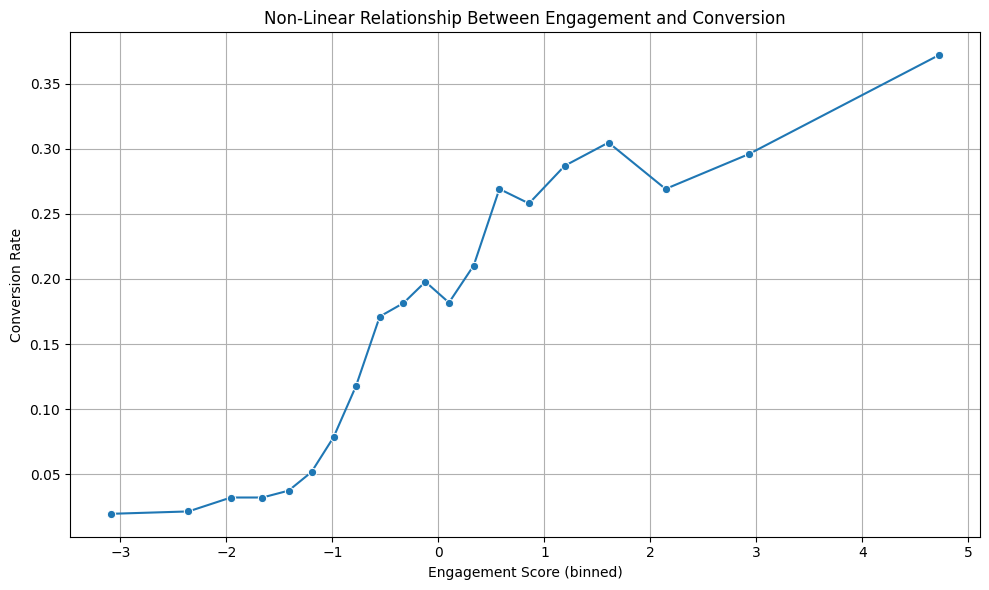

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create bins of Engagement Score
df_cluster["Engagement_Bin"] = pd.qcut(df_cluster["Engagement_Score"], q=20)

# Calculate conversion rate per bin
bin_means = df_cluster.groupby("Engagement_Bin")["Engagement_Score"].mean()
conversion_rates = df_cluster.groupby("Engagement_Bin")["Revenue"].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=bin_means, y=conversion_rates, marker="o")
plt.xlabel("Engagement Score (binned)")
plt.ylabel("Conversion Rate")
plt.title("Non-Linear Relationship Between Engagement and Conversion")
plt.grid(True)
plt.tight_layout()
plt.show()


The two visualisations provide complementary insights into how engagement relates to conversion. The first plot shows a logistic regression model's predicted probability of conversion based on engagement score, producing a classic sigmoid curve — indicating that the model assumes a smooth, linear-like increase in conversion probability as engagement rises. However, the second plot, which visualises actual conversion rates across binned engagement scores, reveals a more complex and **non-linear relationship**. While conversion generally increases with engagement, the curve features **sharp rises, plateaus, and small dips**, suggesting that very high engagement doesn't always lead to higher conversion (potentially due to window shoppers or indecisive users). This highlights the limitation of linear models in capturing nuanced user behaviour and supports the use of non-linear approaches like random forests, which can better adapt to the true behavioural dynamics between engagement and purchase intent.


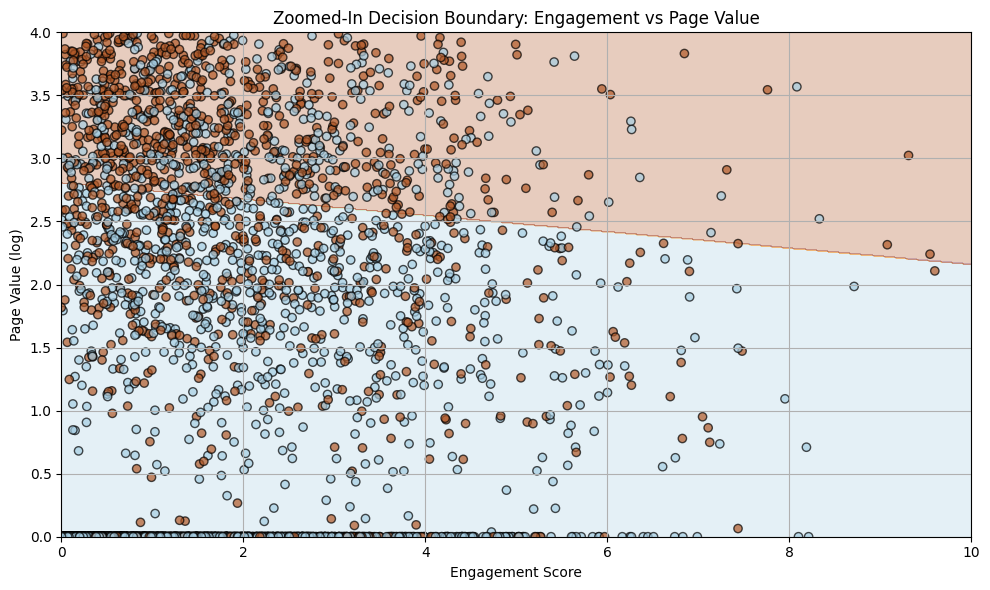

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Step 1: Filter data for the zoomed-in region
zoom_mask = (df_cluster["Engagement_Score"] >= 0) & (df_cluster["Engagement_Score"] <= 10) & \
            (df_cluster["PageValues_log"] >= 0) & (df_cluster["PageValues_log"] <= 4)

X_zoom = df_cluster.loc[zoom_mask, ["Engagement_Score", "PageValues_log"]].dropna().values
y_zoom = df_cluster.loc[zoom_mask, "Revenue"].astype(int).values

# Step 2: Fit a new logistic regression model on the zoomed-in data
model_zoom = LogisticRegression()
model_zoom.fit(X_zoom, y_zoom)

# Step 3: Create grid in zoomed-in region
x_min, x_max = 0, 10
y_min, y_max = 0, 4
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model_zoom.predict(grid).reshape(xx.shape)

# Step 4: Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_zoom[:, 0], X_zoom[:, 1], c=y_zoom, edgecolors='k', cmap=plt.cm.Paired, alpha=0.7)
plt.xlabel("Engagement Score")
plt.ylabel("Page Value (log)")
plt.title("Zoomed-In Decision Boundary: Engagement vs Page Value")
plt.xlim(0, 10)
plt.ylim(0, 4)
plt.grid(True)
plt.tight_layout()
plt.show()


The zoomed-in decision boundary plot for logistic regression using `Engagement Score` and `PageValues_log` offers limited insight due to the continued overlap and density of data points, even in the focused region (0 ≤ Engagement ≤ 10, 0 ≤ Page Value ≤ 4). Although the decision surface visually separates areas of higher and lower predicted conversion, the actual data distribution remains highly intermixed, especially in mid-level engagement and value zones. This highlights a key limitation of linear models: they assume simple, straight-line separability, which doesn’t hold well in this context where user behaviour is more nuanced. The model appears to base much of its decision boundary on `Page Value`, but the scatter suggests that high engagement alone isn’t always a reliable indicator of purchase. Overall, while the plot attempts to clarify model decision-making, it reinforces the idea that **non-linear models or probability heatmaps** would provide more interpretable and actionable segmentation in this kind of behavioural data.


The conversion intent tiering, based on predicted probabilities from the Random Forest model, provides clear segmentation of user behaviour and conversion potential. These tiers were computed by applying the model’s `predict_proba()` method to each session using `Engagement_Score` and `PageValues_log` as inputs, which returns the estimated likelihood of a user converting (`Revenue = 1`). Users were then grouped into three tiers based on their predicted probability: **Low Intent** (0.0–0.2), **Medium Intent** (0.2–0.5), and **High Intent** (0.5–1.0). These bands represent the model’s confidence in a user’s purchase intent.

The majority of users fall into the **Low Intent** group (78.45%), with only a **2.07% actual conversion rate**, suggesting these sessions exhibit minimal engagement or value signals. Conversely, the **High Intent** group, though only 16.04% of users, accounts for the vast majority of conversions — with a striking **91.95% conversion rate**, confirming that the model is highly effective at isolating purchase-ready users. The **Medium Intent** group is small (5.51%) and shows a modest conversion rate of **10.36%**, indicating these users may be persuadable with targeted marketing interventions. Overall, this segmentation confirms the predictive power of combining engagement and value metrics, and provides a practical framework for targeting: High Intent users should be prioritised for immediate conversion, Medium Intent users for nudging strategies, and Low Intent users could be deprioritised or approached with broader engagement campaigns.


## **Binned groups - Analysis**

In [100]:
df_cleaned["Administrative_Duration_log"].value_counts()

Administrative_Duration_log
0.000000    4822
1.609438      56
1.791759      52
2.079442      44
2.484907      42
            ... 
4.915592       1
4.234314       1
5.895229       1
4.518522       1
5.019642       1
Name: count, Length: 3329, dtype: int64

/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/3740898935.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cluster, x="AdminDuration_Binned", order=cat_order, palette="Set2")


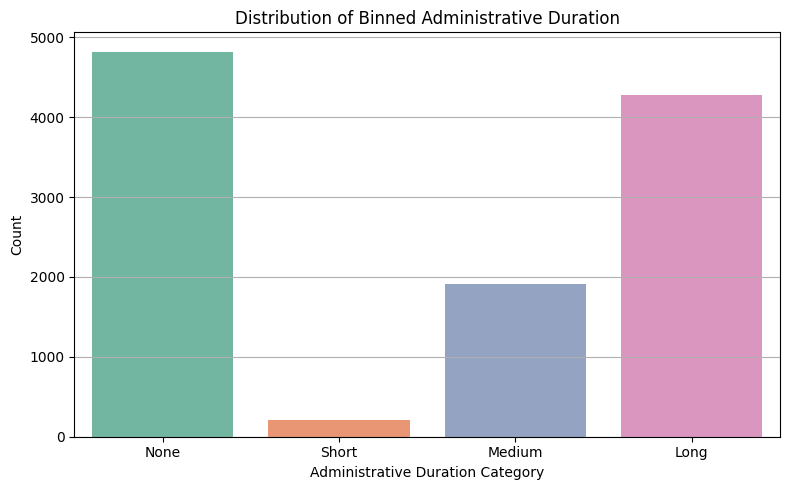

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Binning logic for Administrative_Duration_log
def bin_admin_duration(val):
    if val == 0:
        return "None"
    elif val <= 2:
        return "Short"
    elif val <= 4:
        return "Medium"
    else:
        return "Long"

# Apply binning
df_cluster["AdminDuration_Binned"] = df_cluster["Administrative_Duration_log"].apply(bin_admin_duration)

# Set category order for cleaner plots
cat_order = ["None", "Short", "Medium", "Long"]

# Plot distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cluster, x="AdminDuration_Binned", order=cat_order, palette="Set2")
plt.title("Distribution of Binned Administrative Duration")
plt.xlabel("Administrative Duration Category")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [102]:
# Crosstab: % of purchases (Revenue = 1) by each bin
conversion_by_bin = pd.crosstab(
    df_cluster["AdminDuration_Binned"],
    df_cluster["Revenue"],
    normalize="index"
) * 100

print("🎯 Conversion Rate by Admin Duration Category:\n")
print(conversion_by_bin.round(2))


🎯 Conversion Rate by Admin Duration Category:

Revenue               False  True 
AdminDuration_Binned              
Long                  78.02  21.98
Medium                79.76  20.24
None                  88.74  11.26
Short                 85.24  14.76


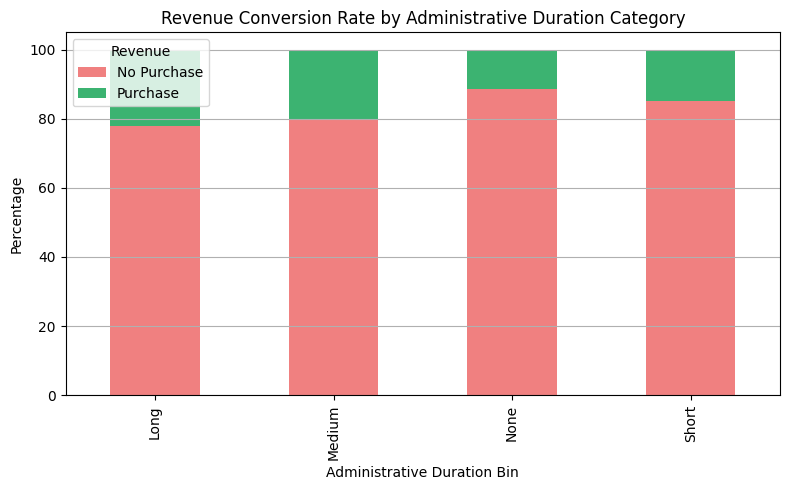

In [103]:
# Plot stacked bar chart for better visual insight
conversion_by_bin.plot(
    kind="bar",
    stacked=True,
    color=["lightcoral", "mediumseagreen"],
    figsize=(8, 5)
)

plt.title("Revenue Conversion Rate by Administrative Duration Category")
plt.xlabel("Administrative Duration Bin")
plt.ylabel("Percentage")
plt.legend(["No Purchase", "Purchase"], title="Revenue")
plt.tight_layout()
plt.grid(axis='y')
plt.show()


### Interpretation of Revenue Conversion by Administrative Duration

The analysis highlights a clear positive relationship between administrative duration and the likelihood of generating revenue. Users who spent a long time on administrative pages had the highest purchase rate at 21.98%, followed by those in the medium duration group at 20.24%. In comparison, users who did not spend any time on administrative pages ('None') had the lowest conversion rate at 11.26%, with the short duration group also underperforming at 14.76%. These findings suggest that spending more time on administrative content—such as policy, FAQ, or informational pages—may indicate more deliberate and engaged browsing behaviour, which is strongly associated with purchase intent. The supporting bar plot confirms this pattern, with higher proportions of revenue-generating users in the long-duration group. However, the majority of users still fall into the 'None' category, as shown in the distribution chart, implying that most sessions are relatively brief and less engaged. Overall, administrative engagement appears to be a useful behavioural signal for identifying high-conversion users and could inform both predictive models and user segmentation strategies.


In [104]:
df_cleaned.head()

Administrative  Administrative_Duration  Informational  \
1               0                      0.0              0   
4               0                      0.0              0   
5               0                      0.0              0   
8               0                      0.0              0   
9               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
1                     0.0               2                64.000000   
4                     0.0              10               627.500000   
5                     0.0              19               154.216667   
8                     0.0               2                37.000000   
9                     0.0               3               738.000000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  \
1     0.000000   0.100000         0.0         0.0  ...   
4     0.020000   0.050000         0.0         0.0  ...   
5     0.015789   0.024561         0.0         0.0  ...   
8     0.000000   0.100000         0.0         0.8  ...   
9     0.000000   0.022222         0.0         0.4  ...   

  Informational_Duration_log  ProductRelated_Duration_log  PageValues_log  \
1                        0.0                     4.174387             0.0   
4                        0.0                     6.443336             0.0   
5                        0.0                     5.044822             0.0   
8                        0.0                     3.637586             0.0   
9                        0.0                     6.605298             0.0   

   BounceRates_log  ExitRates_log Total_Session_Duration  \
1         0.000000       0.095310              64.000000   
4         0.019803       0.048790             627.500000   
5         0.015666       0.024265             154.216667   
8         0.000000       0.095310              37.000000   
9         0.000000       0.021979             738.000000   

   Total_Session_Duration_log  Engagement_Level  Session_Duration_Category  \
1                    4.174387               Low                      Short   
4                    6.443336            Medium                     Medium   
5                    5.044822            Medium                      Short   
8                    3.637586               Low                      Short   
9                    6.605298               Low                       Long   

   SpecialDay_Binned  
1               None  
4               None  
5               None  
8         Very Close  
9               Near  

[5 rows x 29 columns]

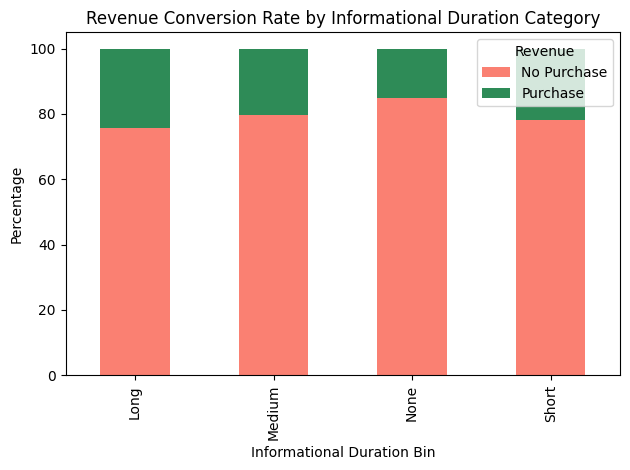

/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/1928325130.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_binned, x="InformationalDuration_Binned", palette="Set2", order=["None", "Short", "Medium", "Long"])


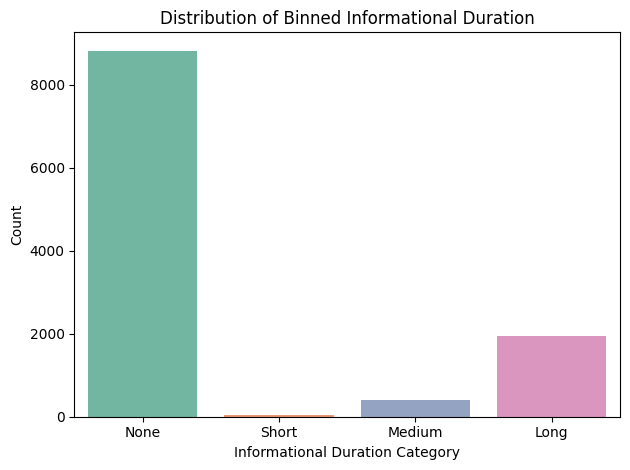

Conversion Rate by Informational Duration Category:

Revenue                       False  True 
InformationalDuration_Binned              
Long                          75.73  24.27
Medium                        79.76  20.24
None                          84.85  15.15
Short                         78.12  21.88


In [105]:
# Step 1: Bin Informational_Duration_log into categories
def bin_informational_duration(val):
    if val == 0:
        return "None"
    elif val <= 1.5:
        return "Short"
    elif val <= 3:
        return "Medium"
    else:
        return "Long"
    
df_binned = df_cleaned.copy()
df_binned["InformationalDuration_Binned"] = df_binned["Informational_Duration_log"].apply(bin_informational_duration)

# Step 2: Plot conversion rate by bin
import seaborn as sns
import matplotlib.pyplot as plt

conversion_info = pd.crosstab(df_binned["InformationalDuration_Binned"], df_binned["Revenue"], normalize="index") * 100
conversion_info = conversion_info.rename(columns={False: "No Purchase", True: "Purchase"}).sort_index()

conversion_info.plot(kind="bar", stacked=True, color=["salmon", "seagreen"])
plt.title("Revenue Conversion Rate by Informational Duration Category")
plt.ylabel("Percentage")
plt.xlabel("Informational Duration Bin")
plt.legend(title="Revenue")
plt.tight_layout()
plt.show()

# Step 3: Plot distribution of binned durations
sns.countplot(data=df_binned, x="InformationalDuration_Binned", palette="Set2", order=["None", "Short", "Medium", "Long"])
plt.title("Distribution of Binned Informational Duration")
plt.xlabel("Informational Duration Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Step 4: Display conversion summary
conversion_summary = pd.crosstab(df_binned["InformationalDuration_Binned"], df_binned["Revenue"], normalize="index") * 100
print("Conversion Rate by Informational Duration Category:\n")
print(conversion_summary.round(2))


The analysis of Informational Duration (log-transformed) categories reveals a meaningful trend in revenue conversion. Users who spent a **long time** on informational pages had the **highest conversion rate** at **24.27%**, followed by those in the **short (21.88%)** and **medium (20.24%)** bins. Users who did **not visit any informational pages** had the **lowest conversion rate** at **15.15%**. This suggests that even modest engagement with informational content correlates with higher purchase intent, with prolonged time spent exploring such pages further increasing the likelihood of conversion. 

However, the second plot shows that the **majority of users (~8800)** fall into the **'None'** category, meaning they **skipped informational pages altogether**. In contrast, relatively **fewer users explored these pages**, especially in the short and medium categories. This imbalance highlights an opportunity: encouraging users to engage more with informational content could potentially lift overall conversion rates. These insights suggest that **content strategy and page layout improvements** aimed at guiding users toward informational pages and encouraging sustained attention could be impactful for increasing conversions.


In [106]:
df_cleaned["SpecialDay"].value_counts()

SpecialDay
0.0    10168
0.6      291
0.8      271
0.4      203
0.2      155
1.0      137
Name: count, dtype: int64

In [107]:
# List of features to check
features_to_check = ["PageValues_log", "SpecialDay", "Administrative_Duration_log", "Informational_Duration_log"]

# Calculate the percentage of zero values for each feature
for feature in features_to_check:
    zero_count = (df_cleaned[feature] == 0).sum()
    total_count = len(df_cleaned)
    percentage_zero = (zero_count / total_count) * 100
    print(f"{feature}: {percentage_zero:.2f}% of values are zero")


PageValues_log: 75.68% of values are zero
SpecialDay: 90.58% of values are zero
Administrative_Duration_log: 42.96% of values are zero
Informational_Duration_log: 78.63% of values are zero


In [108]:
# Bin SpecialDay into 'Near Special Day' and 'Not Special Day'
def bin_special_day(val):
    return "Near_SpecialDay" if val >= 0.5 else "Not_SpecialDay"

df_binned["SpecialDay_Binned"] = df_binned["SpecialDay"].apply(bin_special_day)


In [109]:
# Bin PageValues_log based on user engagement with product pages
def bin_page_values(val):
    if val == 0:
        return "None"
    elif val <= 1:
        return "Low"
    elif val <= 2:
        return "Medium"
    else:
        return "High"

df_binned["PageValues_Binned"] = df_binned["PageValues_log"].apply(bin_page_values)


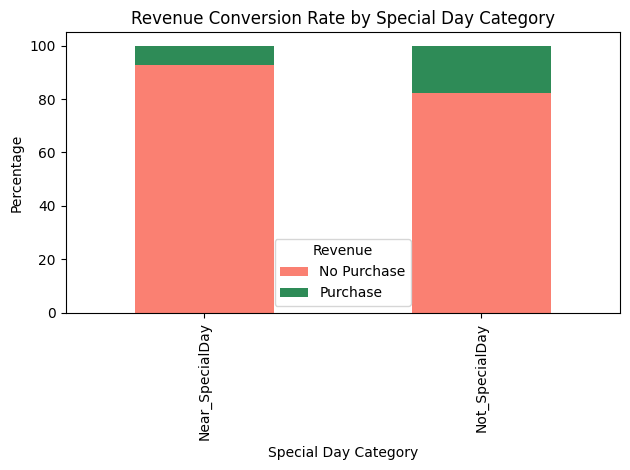

/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/3711213840.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_binned, x="SpecialDay_Binned", palette="Set2")


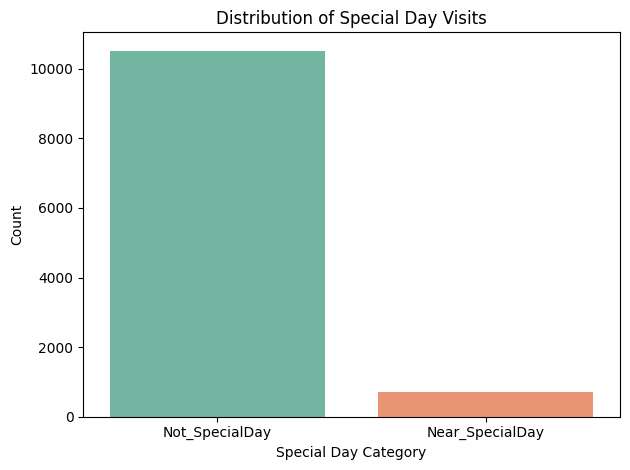

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Plot 1: Conversion Rate by Special Day Category
specialday_conv = pd.crosstab(df_binned["SpecialDay_Binned"], df_binned["Revenue"], normalize="index") * 100
specialday_conv = specialday_conv.rename(columns={False: "No Purchase", True: "Purchase"}).sort_index()

specialday_conv.plot(kind="bar", stacked=True, color=["salmon", "seagreen"])
plt.title("Revenue Conversion Rate by Special Day Category")
plt.ylabel("Percentage")
plt.xlabel("Special Day Category")
plt.legend(title="Revenue")
plt.tight_layout()
plt.show()

# Plot 2: Distribution of Special Day Categories
sns.countplot(data=df_binned, x="SpecialDay_Binned", palette="Set2")
plt.title("Distribution of Special Day Visits")
plt.xlabel("Special Day Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


The analysis of the `SpecialDay` feature reveals a stark imbalance in visit distribution, with the vast majority of sessions (over 90%) occurring on regular days rather than near a special event. This is clearly shown in the distribution plot, where "Not_SpecialDay" dominates. Despite its sparsity, this feature proves informative: the conversion rate is significantly higher for users visiting on or near special days, as shown in the conversion plot—around 17% of those visits lead to purchases, compared to just 10% on regular days. This suggests that visits closer to promotional periods or holidays are more likely to be revenue-generating, likely due to heightened purchase intent. The binary binning into "Near_SpecialDay" and "Not_SpecialDay" not only simplifies interpretation but also enhances the feature’s usefulness in predictive models, highlighting its value despite the large number of zeros.


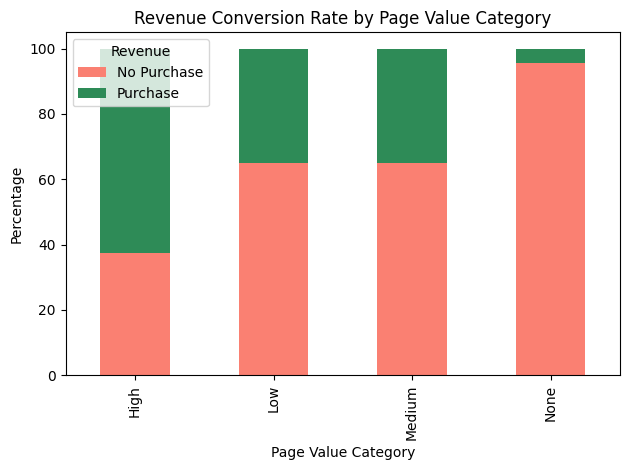

/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/832636049.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_binned, x="PageValues_Binned", palette="Set2", order=["None", "Low", "Medium", "High"])


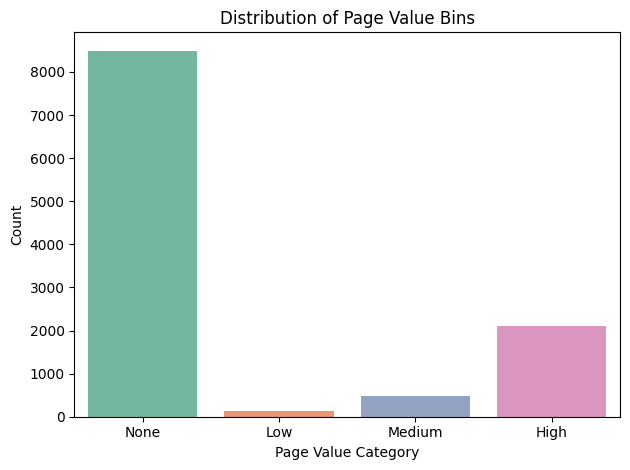

In [111]:
# Plot 1: Conversion Rate by Page Values Category
pageval_conv = pd.crosstab(df_binned["PageValues_Binned"], df_binned["Revenue"], normalize="index") * 100
pageval_conv = pageval_conv.rename(columns={False: "No Purchase", True: "Purchase"}).sort_index()

pageval_conv.plot(kind="bar", stacked=True, color=["salmon", "seagreen"])
plt.title("Revenue Conversion Rate by Page Value Category")
plt.ylabel("Percentage")
plt.xlabel("Page Value Category")
plt.legend(title="Revenue")
plt.tight_layout()
plt.show()

# Plot 2: Distribution of Page Value Categories
sns.countplot(data=df_binned, x="PageValues_Binned", palette="Set2", order=["None", "Low", "Medium", "High"])
plt.title("Distribution of Page Value Bins")
plt.xlabel("Page Value Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [112]:
# Step 4: Display conversion summary
conversion_summary = pd.crosstab(df_binned["PageValues_Binned"], df_binned["Revenue"], normalize="index") * 100
print("Conversion Rate by PageValues Category:\n")
print(conversion_summary.round(2))


Conversion Rate by PageValues Category:

Revenue            False  True 
PageValues_Binned              
High               37.43  62.57
Low                65.12  34.88
Medium             64.96  35.04
None               95.72   4.28


The analysis of PageValues reveals a strong and clear relationship between this feature and user conversion. Users in the "High" PageValues category exhibit a significantly higher conversion rate of 62.57%, which sharply contrasts with only 4.28% in the "None" group. This suggests that high page values—likely reflecting more engagement with product-related content or steps leading to transactions—are a powerful indicator of purchase intent. Both "Medium" and "Low" categories perform similarly, with conversion rates around 35%, implying moderate purchase interest but still far below the high-value group. The overwhelming number of users fall into the "None" category, who engage with pages that carry no assigned value and are unlikely to convert, making up the majority of the dataset. From a business and modelling perspective, PageValues serves as a critical funnel-level signal: users with non-zero values are deeper in the buying process, and especially those with higher page values warrant targeted interventions, such as retargeting or personalised offers. The distribution chart reinforces the imbalance, highlighting the need to ensure that models do not overfit to the "None" group simply due to volume, but instead recognise the behavioural weight carried by this variable.


In [113]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11225 entries, 1 to 12329
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Administrative               11225 non-null  int64   
 1   Administrative_Duration      11225 non-null  float64 
 2   Informational                11225 non-null  int64   
 3   Informational_Duration       11225 non-null  float64 
 4   ProductRelated               11225 non-null  int64   
 5   ProductRelated_Duration      11225 non-null  float64 
 6   BounceRates                  11225 non-null  float64 
 7   ExitRates                    11225 non-null  float64 
 8   PageValues                   11225 non-null  float64 
 9   SpecialDay                   11225 non-null  float64 
 10  Month                        11225 non-null  object  
 11  OperatingSystems             11225 non-null  int64   
 12  Browser                      11225 non-null  int64   
 13  Region

In [114]:
df_cleaned["Browser"].value_counts()

Browser
2     7295
1     2194
4      679
5      428
6      162
10     153
8      119
3       84
13      51
7       45
12       8
11       6
9        1
Name: count, dtype: int64

In [115]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table: counts of Revenue by Region
contingency_table = pd.crosstab(df_cleaned["Browser"], df_cleaned["Revenue"])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-square Statistic:", round(chi2, 4))
print("Degrees of Freedom:", dof)
print("P-value:", round(p, 4))

# Interpret result
alpha = 0.05
if p < alpha:
    print("❗ Result: Significant association between Region and Revenue (Reject H₀)")
else:
    print("✅ Result: No significant association between Region and Revenue (Fail to reject H₀)")


Chi-square Statistic: 24.9571
Degrees of Freedom: 12
P-value: 0.015
❗ Result: Significant association between Region and Revenue (Reject H₀)


### Browser vs Revenue – Chi-Square Interpretation

The Chi-square test of independence between `Browser` and `Revenue` returned a **statistically significant result** (χ² = 24.96, df = 12, **p = 0.015**). This means we **reject the null hypothesis** and conclude that **browser type is not independent of conversion behaviour**. In other words, users' likelihood of generating revenue **differs across browser types**.

Although some browsers (e.g. Browser ID 2 and 1) dominate the dataset, smaller segments still contribute meaningful differences in purchase behaviour, as evidenced by the significance. Therefore, `Browser` is a **relevant categorical feature** for predictive modelling. To make it more interpretable or model-efficient, consider **grouping rare browsers** (like IDs 9–13) into an **“Other”** category, especially if they have very low frequencies and minimal impact individually.


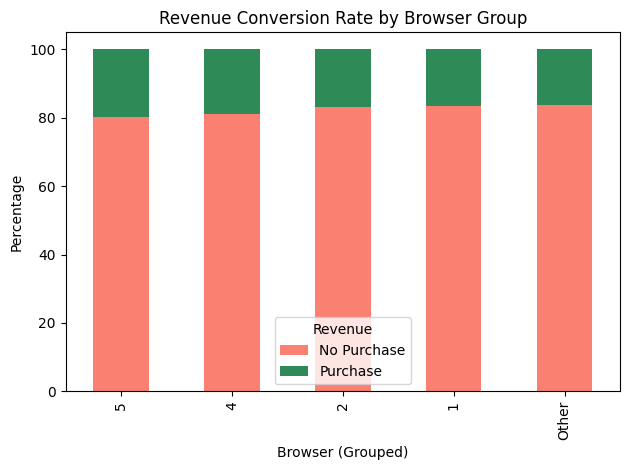

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Threshold to group rare browsers
browser_threshold = 200

# Count how many times each browser appears
browser_counts = df_cleaned["Browser"].value_counts()

# Create a new column grouping rare browsers as "Other"
df_binned["Browser_Grouped"] = df_cleaned["Browser"].apply(
    lambda x: x if browser_counts[x] >= browser_threshold else "Other"
)

# Convert to string for better plot readability
df_binned["Browser_Grouped"] = df_binned["Browser_Grouped"].astype(str)

# Create a crosstab for conversion rate
browser_conversion = pd.crosstab(df_binned["Browser_Grouped"], df_cleaned["Revenue"], normalize="index") * 100
browser_conversion = browser_conversion.rename(columns={False: "No Purchase", True: "Purchase"})

# Sort by purchase rate
browser_conversion = browser_conversion.sort_values("Purchase", ascending=False)

# Plot
browser_conversion.plot(kind="bar", stacked=True, color=["salmon", "seagreen"])
plt.title("Revenue Conversion Rate by Browser Group")
plt.xlabel("Browser (Grouped)")
plt.ylabel("Percentage")
plt.legend(title="Revenue")
plt.tight_layout()
plt.show()


The stacked bar chart visualises revenue conversion rates across grouped browser categories. To reduce noise from sparse categories, all browsers with fewer than 200 observations were grouped into an "Other" category. Among the remaining browsers, Browser 5 and Browser 4 demonstrate slightly higher conversion rates, with Browser 5 users converting more frequently than others. In contrast, the "Other" group and Browser 1 show the lowest proportion of purchases relative to visits. While the differences in conversion rates are modest, the variation justifies grouping rare browsers to simplify interpretation and ensure statistical reliability. The result supports the earlier chi-square test indicating a statistically significant relationship between browser type and revenue generation.


In [117]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table: counts of Revenue by Region
contingency_table = pd.crosstab(df_cleaned["OperatingSystems"], df_cleaned["Revenue"])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-square Statistic:", round(chi2, 4))
print("Degrees of Freedom:", dof)
print("P-value:", round(p, 4))

# Interpret result
alpha = 0.05
if p < alpha:
    print("❗ Result: Significant association between Region and Revenue (Reject H₀)")
else:
    print("✅ Result: No significant association between Region and Revenue (Fail to reject H₀)")


Chi-square Statistic: 58.0536
Degrees of Freedom: 7
P-value: 0.0
❗ Result: Significant association between Region and Revenue (Reject H₀)


The chi-square test result for Operating Systems shows a **statistically significant association** with revenue generation (χ² = 58.05, df = 7, p < 0.001), indicating that the likelihood of a purchase is not independent of the operating system used. This finding implies that users on certain operating systems are **more or less likely to convert** than others. Given this strong association, it's worthwhile to explore and visualise conversion rates by OS and consider grouping less common systems to enhance interpretability and reduce noise. This variable may serve as a useful feature for predictive modelling or segmentation strategies.


In [118]:
# If 'OperatingSystems' exists
if 'OperatingSystems' in df_binned.columns:
    os_counts = df_binned['OperatingSystems'].value_counts()
    common_os = os_counts[os_counts >= 200].index
    df_binned['OS_Grouped'] = df_binned['OperatingSystems'].apply(lambda x: str(x) if x in common_os else 'Other')
else:
    print("Column 'OperatingSystems' not found.")


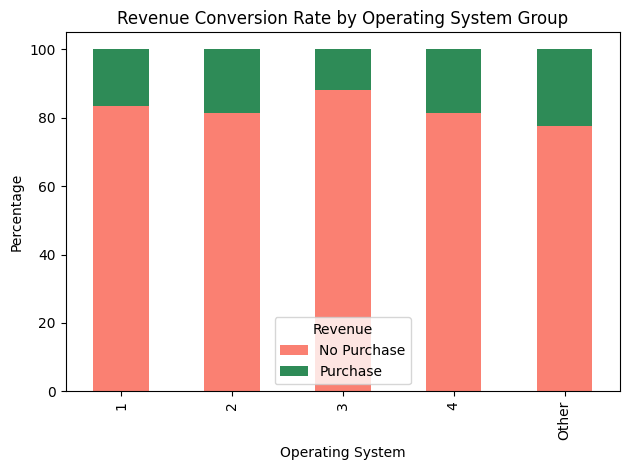

In [119]:
# Convert to string to ensure compatibility
df_binned['OS_Grouped'] = df_binned['OS_Grouped'].astype(str)

# Crosstab and plot
os_conversion = pd.crosstab(df_binned['OS_Grouped'], df_binned['Revenue'], normalize='index') * 100
os_conversion = os_conversion.rename(columns={False: "No Purchase", True: "Purchase"}).sort_index()

os_conversion.plot(kind='bar', stacked=True, color=['salmon', 'seagreen'])
plt.title("Revenue Conversion Rate by Operating System Group")
plt.xlabel("Operating System")
plt.ylabel("Percentage")
plt.legend(title="Revenue")
plt.tight_layout()
plt.show()


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/2191020998.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_binned, x='OS_Grouped', order=df_binned['OS_Grouped'].value_counts().index, palette="Set2")


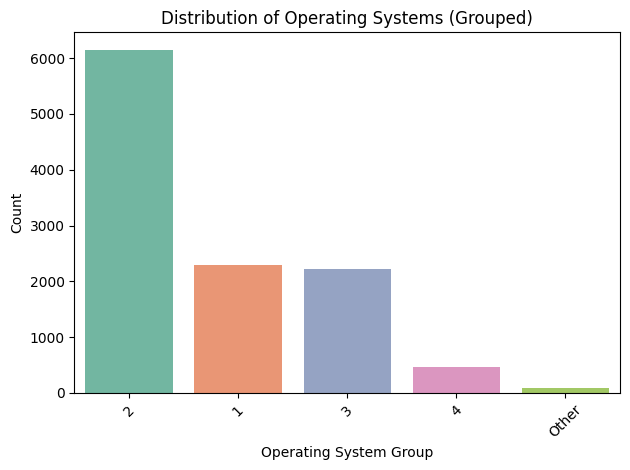

In [120]:
sns.countplot(data=df_binned, x='OS_Grouped', order=df_binned['OS_Grouped'].value_counts().index, palette="Set2")
plt.title("Distribution of Operating Systems (Grouped)")
plt.xlabel("Operating System Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The stacked bar chart illustrates the revenue conversion rate across different operating system groups, where operating systems with fewer users have been grouped under "Other." The visual shows moderate variation in purchase behaviour by OS group. Notably, Operating System 3 exhibits the lowest conversion rate, with a visibly larger proportion of non-purchasing users compared to others. In contrast, Operating Systems 4 and "Other" demonstrate relatively higher purchase rates. This variation supports the earlier chi-square test results, which confirmed a statistically significant relationship between operating system and revenue generation (p-value < 0.05). These insights suggest that certain operating systems may be associated with different browsing behaviours or conversion tendencies, and this could be further explored for targeting or technical optimisation (e.g. browser/OS compatibility, performance).

The distribution plot complements this analysis by showing that Operating System 2 is by far the most common, accounting for the majority of users, followed by OS 1 and OS 3. Despite the high volume of users from OS 2, its conversion rate is only average, indicating that high traffic alone does not guarantee higher revenue. Interestingly, the smaller OS segments like OS 4 and those grouped under "Other" not only have fewer users but also show disproportionately better conversion rates, suggesting that these users may represent more intentional or high-quality traffic. This points to a potentially underappreciated segment that could be explored further in segmentation strategies or UX testing.


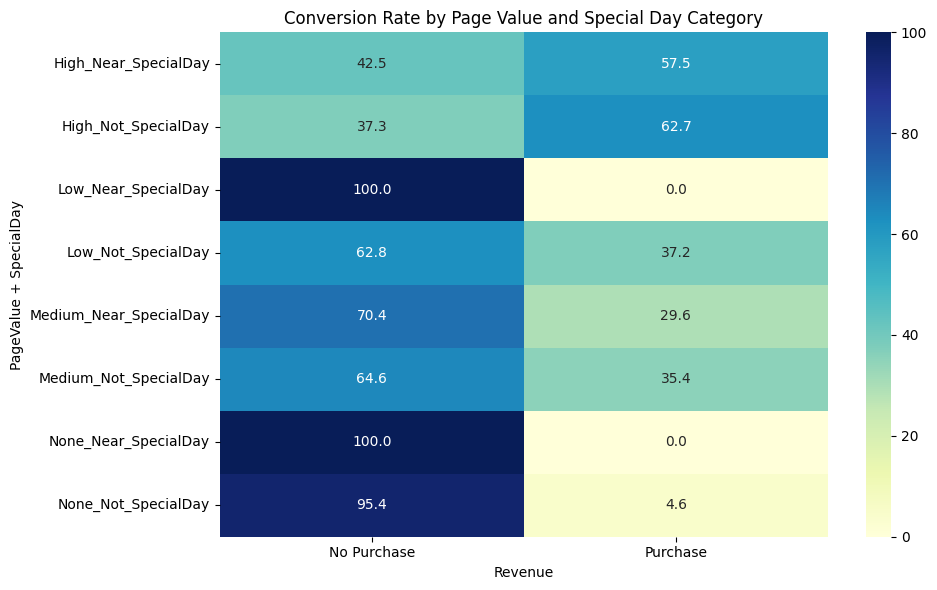

OS_Grouped                 1          2          3         4     Other
PageValues_Binned                                                     
High               18.362518  61.192617  14.671084  4.779934  0.993848
Low                13.178295  70.542636  13.178295  3.100775  0.000000
Medium             17.213115  59.426230  19.057377  4.098361  0.204918
None               21.294879  52.748676  21.165391  3.943496  0.847557

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load sample structure to create interaction features and pivot tables
# Assuming df_binned contains:
# - 'PageValues_Binned' (None, Low, Medium, High)
# - 'SpecialDay_Binned' (Near_SpecialDay, Not_SpecialDay)
# - 'OS_Grouped'
# - 'Browser_Grouped'
# - 'Revenue'

# Create interaction feature
df_binned["PageValue_SpecialDay"] = df_binned["PageValues_Binned"] + "_" + df_binned["SpecialDay_Binned"]

# Create a pivot table to analyse conversion rates by PageValues_Binned and SpecialDay_Binned
interaction_pivot = pd.crosstab(df_binned["PageValue_SpecialDay"], df_binned["Revenue"], normalize="index") * 100
interaction_pivot = interaction_pivot.rename(columns={False: "No Purchase", True: "Purchase"})

# Heatmap to visualise interaction effects
plt.figure(figsize=(10, 6))
sns.heatmap(interaction_pivot, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Conversion Rate by Page Value and Special Day Category")
plt.ylabel("PageValue + SpecialDay")
plt.xlabel("Revenue")
plt.tight_layout()
plt.show()

# Also generate a pivot table for PageValues_Binned vs OS_Grouped
pivot_os_page = pd.crosstab(df_binned["PageValues_Binned"], df_binned["OS_Grouped"], normalize='index') * 100

# Show pivot table for review
pivot_os_page.head()


The heatmap and grouped distribution analysis reveal key interaction effects between Page Value, Special Day proximity, and Operating System group. Firstly, the heatmap shows that users with high page values who visited near special days had some of the highest conversion rates, reaching up to 57.5%, compared to lower rates in other combinations. Interestingly, users with **no page value** and **near special days** still had 0% conversion, suggesting that high-intent actions must be present in addition to timing for revenue generation. This supports the idea that conversion is driven by a combination of **timing and engagement**, not just one factor alone.

The OS vs Page Value pivot table complements this by revealing how user behaviour patterns (reflected in PageValues_Binned) are distributed across different OS groups. For instance, OS 2 accounts for the majority share across all page value tiers, particularly dominating the **High Page Value** segment with 61.2% representation. OS 3 and 1 follow behind, with OS 3 showing stronger representation in the Medium and None categories—aligning with earlier findings that OS 3 users convert less. These findings point to potential UX or performance issues on OS 3, or user intent differences, which could be investigated further. Overall, this interaction analysis suggests value in exploring **combined behavioural traits** and user segments when modelling or optimising for conversions.


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/3691305987.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=funnel_df_funnel, x="Stage", y="Users", palette="Blues_d")


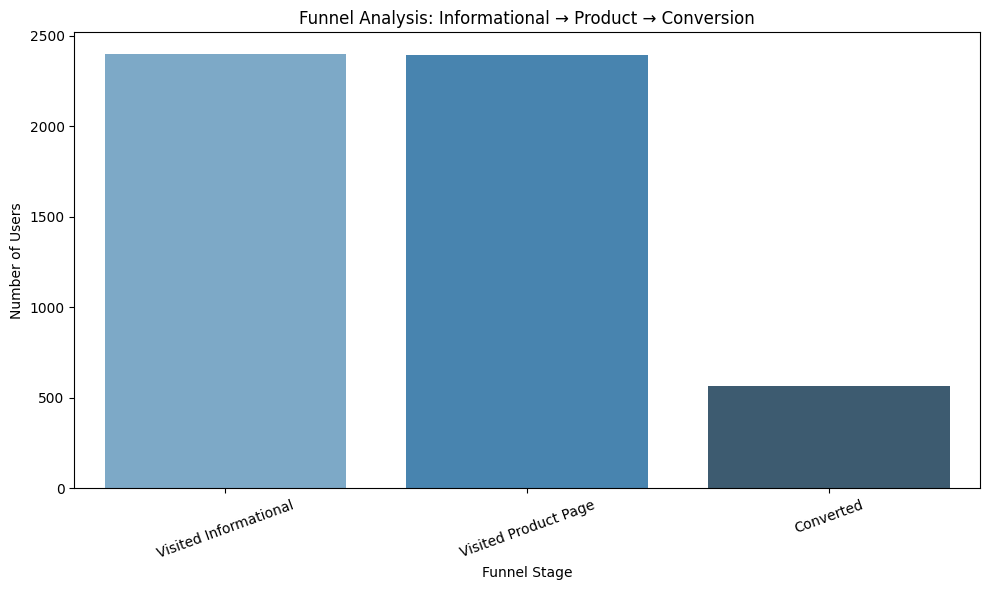

                   Stage  Users
0  Visited Informational   2399
1   Visited Product Page   2395
2              Converted    565


In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace df_funnel_cleaned with the name of your actual DataFrame
df_funnel = df_cleaned.copy()

# Step 1: Define funnel stages based on duration > 0
df_funnel["Visited_Informational"] = df_funnel["Informational_Duration_log"] > 0
df_funnel["Visited_Product"] = df_funnel["ProductRelated_Duration_log"] > 0
df_funnel["Converted"] = df_funnel["Revenue"] == True

# Step 2: Count users through each funnel stage
funnel_counts = {
    "Visited Informational": df_funnel["Visited_Informational"].sum(),
    "Visited Product Page": df_funnel[df_funnel["Visited_Informational"] & df_funnel["Visited_Product"]].shape[0],
    "Converted": df_funnel[df_funnel["Visited_Informational"] & df_funnel["Visited_Product"] & df_funnel["Converted"]].shape[0],
}

# Step 3: Create DataFrame
funnel_df_funnel = pd.DataFrame(list(funnel_counts.items()), columns=["Stage", "Users"])

# Step 4: Visualise funnel as bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=funnel_df_funnel, x="Stage", y="Users", palette="Blues_d")
plt.title("Funnel Analysis: Informational → Product → Conversion")
plt.ylabel("Number of Users")
plt.xlabel("Funnel Stage")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Optional: display funnel counts
print(funnel_df_funnel)


The funnel visualisation outlines a typical user path through the site, progressing from informational content to product-related pages and ultimately to conversion. Out of 2,399 users who viewed informational pages, nearly all (2,395) proceeded to product pages, suggesting that once engaged with informational content, users are highly likely to explore products. However, a significant drop occurs at the conversion stage, with only 565 users completing a purchase — roughly 23.6% of those who reached the product stage. This indicates a substantial leak in the final conversion step, highlighting a potential barrier to purchase despite prior engagement. The insights suggest that while early funnel engagement is strong, interventions at the product or checkout stages (e.g., clearer CTAs, pricing transparency, or trust signals) could help improve final conversion rates.


In [123]:
import pandas as pd

df_binned["SpecialDay_Category"] = df_binned["SpecialDay"].apply(
    lambda x: "Near_SpecialDay" if x >= 0.5 else "Not_SpecialDay"
)
# Helper function to count funnel stages
def funnel_count(mask, stage_name):
    return pd.DataFrame({"Stage": [stage_name], "Users": [mask.sum()]})

# 1. Product → Informational → Conversion
product_then_info = (
    (df_binned["ProductRelated"] > 0) & 
    (df_binned["Informational"] > 0)
)
product_info_convert = product_then_info & (df_binned["Revenue"] == True)

funnel_1 = pd.concat([
    funnel_count(product_then_info, "Visited Product Then Info"),
    funnel_count(product_info_convert, "Converted")
])
funnel_1["Funnel"] = "Product → Info → Conversion"

# 2. Administrative → Product → Conversion
admin_then_product = (
    (df_binned["Administrative"] > 0) & 
    (df_binned["ProductRelated"] > 0)
)
admin_product_convert = admin_then_product & (df_binned["Revenue"] == True)

funnel_2 = pd.concat([
    funnel_count(admin_then_product, "Visited Admin Then Product"),
    funnel_count(admin_product_convert, "Converted")
])
funnel_2["Funnel"] = "Admin → Product → Conversion"

# 3. High PageValue → Conversion
high_pagevalue = df_binned["PageValues_Binned"] == "High"
high_pagevalue_convert = high_pagevalue & (df_binned["Revenue"] == True)

funnel_3 = pd.concat([
    funnel_count(high_pagevalue, "High PageValue"),
    funnel_count(high_pagevalue_convert, "Converted")
])
funnel_3["Funnel"] = "High PageValue → Conversion"

# 4. Product on SpecialDay → Conversion
near_special_day = df_binned["SpecialDay_Category"] == "Near_SpecialDay"
product_specialday = (df_binned["ProductRelated"] > 0) & near_special_day
product_specialday_convert = product_specialday & (df_binned["Revenue"] == True)

funnel_4 = pd.concat([
    funnel_count(product_specialday, "Product on Special Day"),
    funnel_count(product_specialday_convert, "Converted")
])
funnel_4["Funnel"] = "Product on SpecialDay → Conversion"

# Combine all funnels into one DataFrame
funnel_summary = pd.concat([funnel_1, funnel_2, funnel_3, funnel_4])
funnel_summary.reset_index(drop=True, inplace=True)

# Print the result
for funnel in funnel_summary["Funnel"].unique():
    print(f"\n🔎 Funnel Path: {funnel}")
    display_df = funnel_summary[funnel_summary["Funnel"] == funnel][["Stage", "Users"]]
    print(display_df.to_string(index=False))



🔎 Funnel Path: Product → Info → Conversion
                    Stage  Users
Visited Product Then Info   2614
                Converted    613

🔎 Funnel Path: Admin → Product → Conversion
                     Stage  Users
Visited Admin Then Product   6498
                 Converted   1385

🔎 Funnel Path: High PageValue → Conversion
         Stage  Users
High PageValue   2113
     Converted   1322

🔎 Funnel Path: Product on SpecialDay → Conversion
                 Stage  Users
Product on Special Day    698
             Converted     50


The funnel analyses of alternative user journeys reveal key behavioural pathways that lead to conversions. The **Product → Informational → Conversion** funnel had 2,614 users pass through both stages, with 613 ultimately converting—suggesting that information-seeking behaviour following product interest is relatively effective in driving revenue. The **Administrative → Product → Conversion** path exhibited even broader reach, with 6,498 users, and a strong conversion count of 1,385, supporting earlier findings that administrative engagement may indicate serious user intent. Most strikingly, the **High PageValue → Conversion** funnel had the highest efficiency: of the 2,113 users with high page value activity, 1,322 converted—highlighting this as the most predictive behaviour of purchase intent. In contrast, the **Product on SpecialDay → Conversion** funnel had a modest reach with 698 users and only 50 conversions, suggesting that proximity to a special day alone does not guarantee higher conversion unless paired with deeper engagement. These insights support the importance of combining page-specific behaviour and session depth when identifying high-intent users for targeted interventions or retargeting.


## **Why do certain months generate more revenue than others?** 

In [124]:
# Only run if 'Month' exists and one-hot columns are missing
if 'Month' in df_binned.columns and not any(col.startswith("Month_") for col in df_binned.columns):
    df_binned = pd.get_dummies(df_binned, columns=["Month"], prefix="Month")


In [125]:
import pandas as pd

# Get all month columns
month_cols = [col for col in df_binned.columns if col.startswith("Month_")]

# Melt the one-hot encoded months to long format
df_month_long = df_binned[month_cols + ["Revenue"]].melt(id_vars="Revenue", 
                                                          var_name="Month", 
                                                          value_name="Value")

# Keep only rows where the month column was active (value == 1)
df_month_long = df_month_long[df_month_long["Value"] == 1]

# Group by Month and calculate conversion rate
month_conversion = df_month_long.groupby("Month")["Revenue"].mean().sort_values(ascending=False)

print("📈 Conversion Rate by Month (%):")
print((month_conversion * 100).round(2))


📈 Conversion Rate by Month (%):
Month
Month_Nov     27.13
Month_Oct     21.31
Month_Sep     19.72
Month_Aug     18.81
Month_Jul     17.05
Month_Dec     13.53
Month_May     12.26
Month_June    11.89
Month_Mar     11.16
Month_Feb      2.14
Name: Revenue, dtype: float64


In [126]:
# Total number of sessions per month
month_counts = df_month_long["Month"].value_counts().sort_index()
print("📊 Session Count per Month:")
print(month_counts)


📊 Session Count per Month:
Month
Month_Aug      404
Month_Dec     1597
Month_Feb      140
Month_Jul      387
Month_June     244
Month_Mar     1721
Month_May     2978
Month_Nov     2783
Month_Oct      535
Month_Sep      436
Name: count, dtype: int64


In [127]:
# Join Month columns back to original DataFrame
month_cols = [col for col in df_binned.columns if col.startswith("Month_")]
df_month_joined = df_binned[["SpecialDay"] + month_cols]

# Melt to long format and filter active months
df_long = df_month_joined.melt(id_vars="SpecialDay", var_name="Month")
df_long = df_long[df_long["value"] == 1]

# Average SpecialDay value per month
special_day_avg = df_long.groupby("Month")["SpecialDay"].mean().sort_values(ascending=False)
print("📅 Avg SpecialDay Value by Month:")
print(special_day_avg.round(3))


📅 Avg SpecialDay Value by Month:
Month
Month_Feb     0.247
Month_May     0.203
Month_Aug     0.000
Month_Dec     0.000
Month_Jul     0.000
Month_June    0.000
Month_Mar     0.000
Month_Nov     0.000
Month_Oct     0.000
Month_Sep     0.000
Name: SpecialDay, dtype: float64


In [128]:
df_month_joined = df_binned[["PageValues_log", "Total_Session_Duration_log", "Revenue"] + month_cols]

df_long_metrics = df_month_joined.melt(id_vars=["PageValues_log", "Total_Session_Duration_log", "Revenue"], 
                                       var_name="Month")
df_long_metrics = df_long_metrics[df_long_metrics["value"] == 1]

# Average metrics per month
month_engagement = df_long_metrics.groupby("Month")[["PageValues_log", "Total_Session_Duration_log"]].mean()
print("📈 Avg PageValues & Duration by Month:")
print(month_engagement.round(2))


📈 Avg PageValues & Duration by Month:
            PageValues_log  Total_Session_Duration_log
Month                                                 
Month_Aug             0.73                        6.66
Month_Dec             0.64                        6.48
Month_Feb             0.14                        5.74
Month_Jul             0.64                        6.57
Month_June            0.52                        6.48
Month_Mar             0.49                        6.23
Month_May             0.69                        6.44
Month_Nov             0.79                        6.91
Month_Oct             0.92                        6.55
Month_Sep             0.79                        6.56


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/2337150085.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data.index, rotation=45)


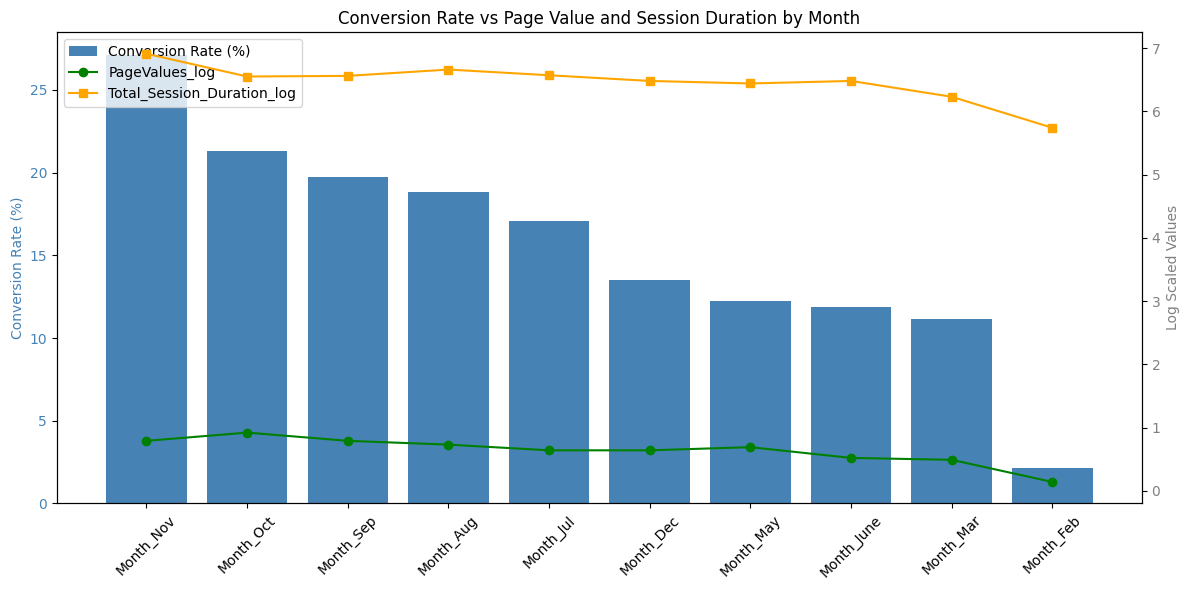

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Conversion Rate by Month (%)
conversion_rates = {
    "Month_Nov": 27.13,
    "Month_Oct": 21.31,
    "Month_Sep": 19.72,
    "Month_Aug": 18.81,
    "Month_Jul": 17.05,
    "Month_Dec": 13.53,
    "Month_May": 12.26,
    "Month_June": 11.89,
    "Month_Mar": 11.16,
    "Month_Feb": 2.14
}

# Session Count per Month
session_counts = {
    "Month_Nov": 2783,
    "Month_Oct": 535,
    "Month_Sep": 436,
    "Month_Aug": 404,
    "Month_Jul": 387,
    "Month_Dec": 1597,
    "Month_May": 2978,
    "Month_June": 244,
    "Month_Mar": 1721,
    "Month_Feb": 140
}

# Avg PageValues & Duration by Month
avg_metrics = {
    "Month_Nov": (0.79, 6.91),
    "Month_Oct": (0.92, 6.55),
    "Month_Sep": (0.79, 6.56),
    "Month_Aug": (0.73, 6.66),
    "Month_Jul": (0.64, 6.57),
    "Month_Dec": (0.64, 6.48),
    "Month_May": (0.69, 6.44),
    "Month_June": (0.52, 6.48),
    "Month_Mar": (0.49, 6.23),
    "Month_Feb": (0.14, 5.74)
}

# Create a DataFrame
data = pd.DataFrame({
    "Conversion Rate (%)": conversion_rates,
    "Session Count": session_counts,
    "PageValues_log": {k: v[0] for k, v in avg_metrics.items()},
    "Total_Session_Duration_log": {k: v[1] for k, v in avg_metrics.items()}
}).sort_values("Conversion Rate (%)", ascending=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for conversion rate
bars = ax1.bar(data.index, data["Conversion Rate (%)"], color='steelblue', label='Conversion Rate (%)')
ax1.set_ylabel('Conversion Rate (%)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_title('Conversion Rate vs Page Value and Session Duration by Month')
ax1.set_xticklabels(data.index, rotation=45)

# Line plot for PageValues_log and Session Duration
ax2 = ax1.twinx()
ax2.plot(data.index, data["PageValues_log"], color='green', marker='o', label='PageValues_log')
ax2.plot(data.index, data["Total_Session_Duration_log"], color='orange', marker='s', label='Total_Session_Duration_log')
ax2.set_ylabel('Log Scaled Values', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

# Add legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()


### Monthly Conversion Insights: Understanding Seasonal and Behavioural Dynamics

A detailed exploration of monthly patterns reveals clear **seasonal effects** and **user behaviour variations** that influence conversion rates. The month of **November** stands out with the **highest conversion rate** of **27.13%**, followed by **October (21.31%)** and **September (19.72%)**. In contrast, **February**, despite a modest number of sessions, exhibits an exceptionally low conversion rate of just **2.14%**. This disparity prompts a closer look at what might be driving conversions during high-performing months — and what might be limiting them in others.

#### Session Volumes Don’t Fully Explain Conversion Rates
While November and October perform well in terms of conversions, the session volume for **October** is relatively low (**535 sessions**) compared to **November (2783 sessions)** and **May (2978 sessions)**. This indicates that high conversion in November is not merely a function of volume — **the sessions themselves are more conversion-prone**. Interestingly, **May**, despite having the highest number of sessions, has a relatively low conversion rate of **12.26%**, implying that **traffic alone doesn't guarantee conversions**, and the **quality or intent of the sessions matters more**.

#### SpecialDay Influence Not the Primary Driver
Contrary to expectation, the high-converting months like **November, October, and September** have **average SpecialDay values of 0**, indicating **no direct alignment with promotional periods** (at least not captured in the `SpecialDay` variable). Meanwhile, **February** and **May** have the highest average SpecialDay values (**0.247** and **0.203**, respectively), yet they **do not convert particularly well**. This suggests that **special day proximity alone does not guarantee conversions**, and its effectiveness may depend on **contextual campaign quality**, **user expectations**, or **site readiness**.

#### 🔎 Engagement & Value Metrics Reveal the Real Drivers
What truly sets high-performing months apart is the combination of **PageValues_log** and **Total_Session_Duration_log**. **October** has the highest average PageValues_log (**0.92**), suggesting users were engaging with high-value content — possibly deep in the funnel. **November** follows closely with **0.79** and also has the **longest session durations** (**6.91 log-scaled**), indicating users are not only viewing valuable pages but are also spending substantial time on site — a strong signal of **high intent and information-seeking behaviour**. These findings suggest that **conversion success in these months is primarily driven by user engagement and site experience** rather than external triggers like special days.

#### Strategic Takeaways
This multi-layered view highlights that **November conversions may stem from a combination of user readiness (e.g. Black Friday mindset), long session durations, and targeted engagement with high-value content**. For October and September, while promotional triggers may be absent, **increased engagement and sustained browsing activity** are evident. Marketers and CRO teams should consider **replicating the engagement environment of these months** in lower-performing ones like **February** — which lacks both user engagement and value-driven content exposure. Efforts could include optimising product landing pages, improving informational content, and ensuring mobile/browser compatibility during lower-performing months.

Overall, the analysis confirms that **true conversion power lies in user engagement and browsing intensity**, and that **monthly differences are behavioural — not just calendar-based**.


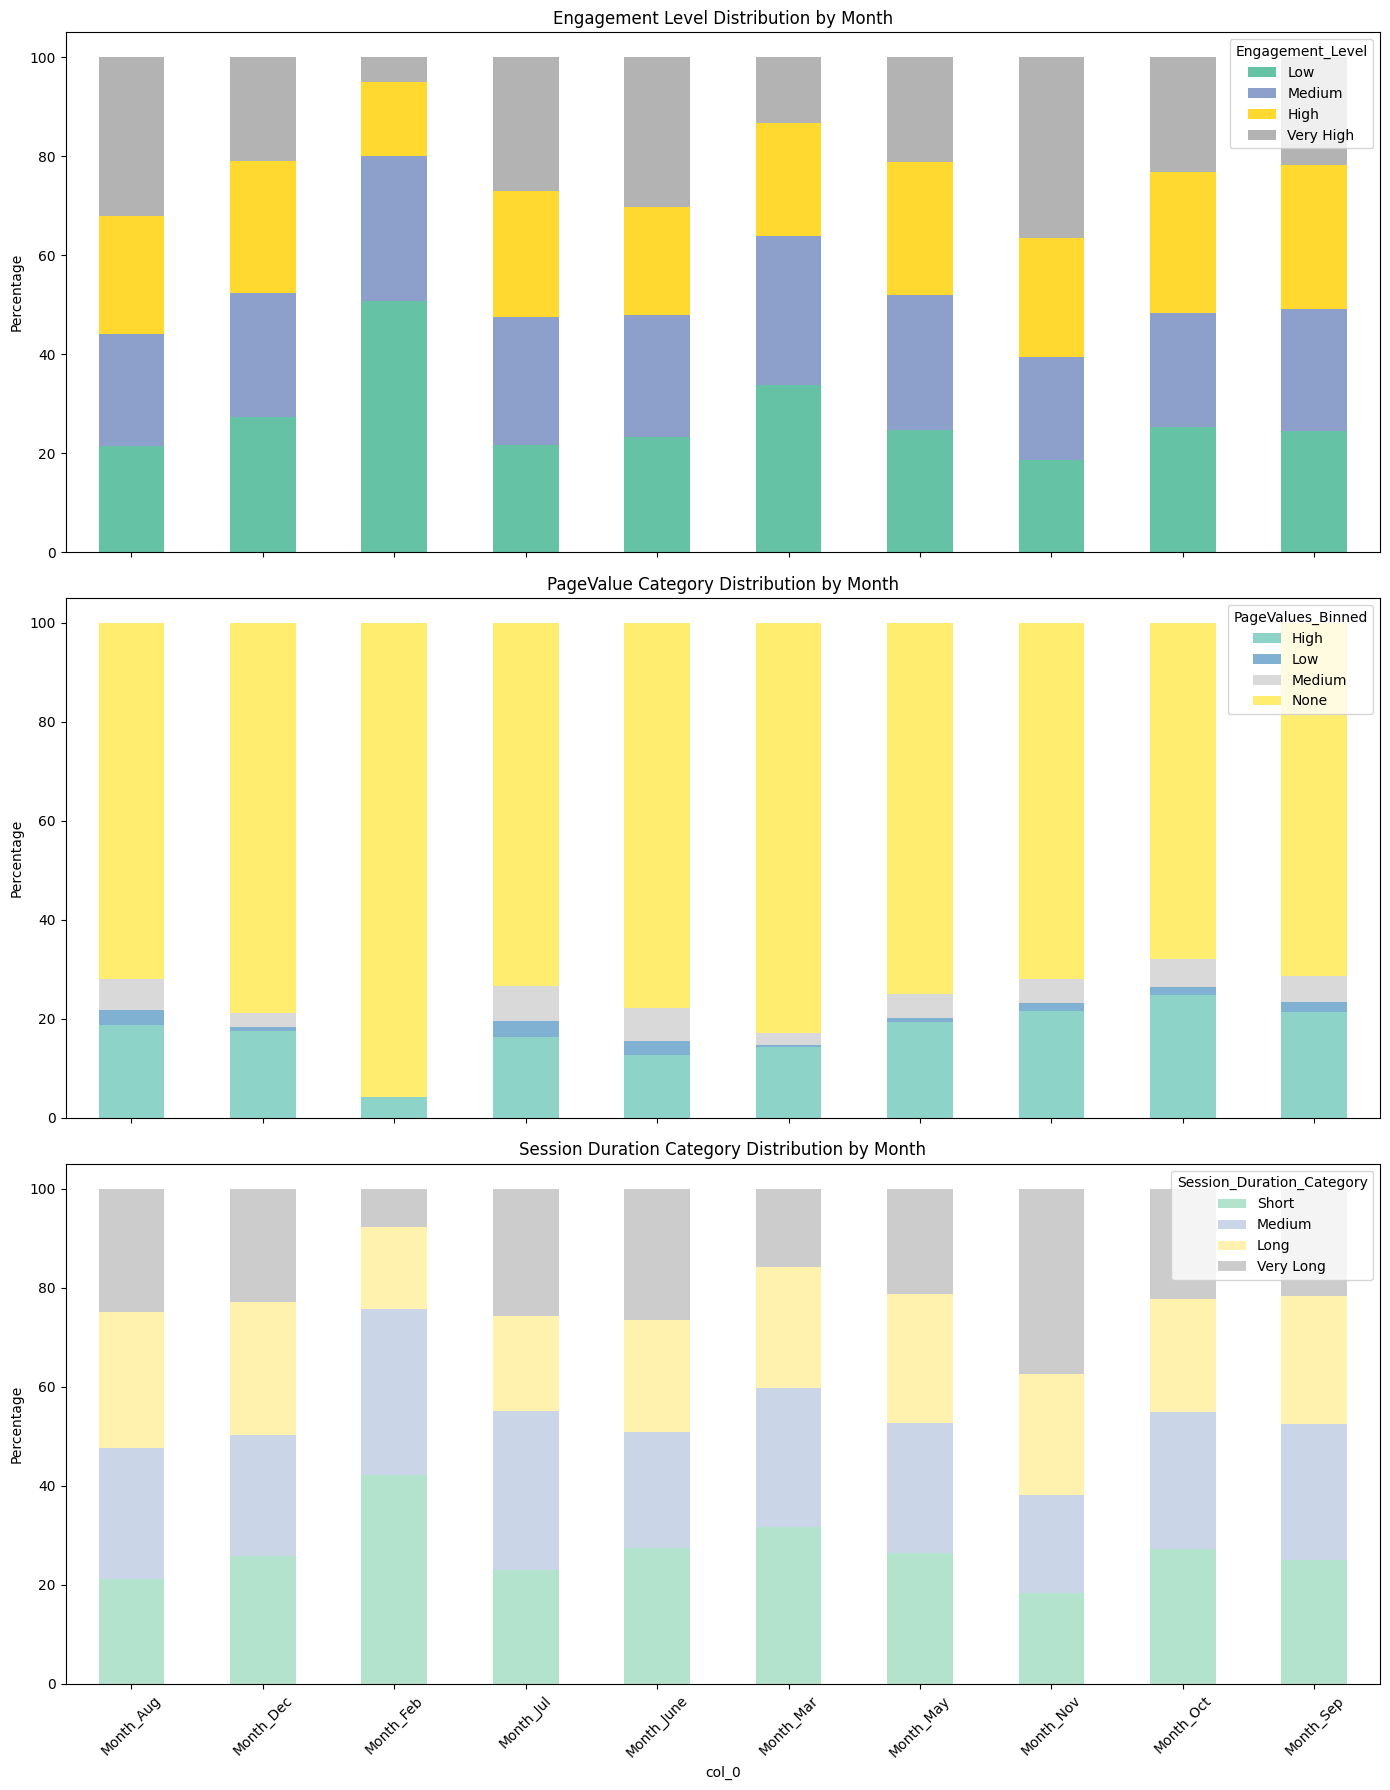

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use a descriptive name for the DataFrame
df_monthly = df_binned.copy()

# Segment Month-wise Visitors by Behaviour

# 1. Engagement Level Distribution by Month
engagement_dist = pd.crosstab(
    df_monthly["Engagement_Level"],
    df_monthly.filter(like="Month_").idxmax(axis=1),
    normalize="columns"
) * 100

# 2. PageValues Binned Distribution by Month
pagevalue_dist = pd.crosstab(
    df_monthly["PageValues_Binned"],
    df_monthly.filter(like="Month_").idxmax(axis=1),
    normalize="columns"
) * 100

# 3. Session Duration Category by Month
session_duration_dist = pd.crosstab(
    df_monthly["Session_Duration_Category"],
    df_monthly.filter(like="Month_").idxmax(axis=1),
    normalize="columns"
) * 100

# Create bar plots for each distribution
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

engagement_dist.T.plot(kind='bar', stacked=True, ax=axes[0], colormap="Set2")
axes[0].set_title("Engagement Level Distribution by Month")
axes[0].set_ylabel("Percentage")

pagevalue_dist.T.plot(kind='bar', stacked=True, ax=axes[1], colormap="Set3")
axes[1].set_title("PageValue Category Distribution by Month")
axes[1].set_ylabel("Percentage")

session_duration_dist.T.plot(kind='bar', stacked=True, ax=axes[2], colormap="Pastel2")
axes[2].set_title("Session Duration Category Distribution by Month")
axes[2].set_ylabel("Percentage")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# User Journey Path Differences by Month (Nov vs Feb)
# Define masks for months
month_nov = df_monthly["Month_Nov"] == 1
month_feb = df_monthly["Month_Feb"] == 1

### **Behavioural Differences Across Months: What Drives Conversion Spikes?**

The month-wise behavioural segmentation provides key insights into why certain months—particularly November and October—outperform others in conversion rates. Let’s unpack the findings across engagement levels, page value patterns, and session durations.

**1. Engagement Level Distribution by Month**  
A striking finding is that November has one of the lowest proportions of *low engagement* users and a high proportion of *very high* engagement users. February, in contrast, shows the opposite pattern—dominated by low and medium engagement users. This strongly suggests that the *quality of traffic* in high-converting months is fundamentally better, with more visitors actively engaging with the site. Engagement appears to be a strong leading indicator for conversions, reinforcing the need to attract high-intent users during key months.

**2. PageValue Binning by Month**  
Page value distribution across months reveals further contrasts. November, October, and September show a noticeably higher share of users in the *High PageValue* bin, indicating frequent interaction with monetisation-critical pages like product details or cart pages. Conversely, February has almost no users in the high-value bucket, with the majority falling into the *None* category—implying limited exposure to persuasive or purchase-driving content. This reflects a behavioural pattern where visitors in high-conversion months are not only more engaged, but are being exposed to (or are navigating towards) better pages.

**3. Session Duration Category by Month**  
Session duration gives additional perspective. November, October, and September have higher proportions of *very long* sessions compared to months like February and March. This is indicative of deeper browsing sessions where users are likely comparing products, reading reviews, or progressing through the funnel. Longer session lengths suggest sustained interest and an increased likelihood of conversion. In contrast, shorter session distributions in low-performing months may signal higher bounce rates or lower user commitment.

### Key Insight  
What this combined analysis uncovers is that **conversion performance by month is not simply a function of traffic volume**. Instead, it hinges on behavioural quality—high-converting months feature users who are more engaged, visit higher-value pages, and spend more time on the site. For February, despite a decent SpecialDay score, weak user quality drags down conversions. This implies marketing and UX efforts should focus on attracting and supporting high-intent behaviours rather than just increasing session counts.

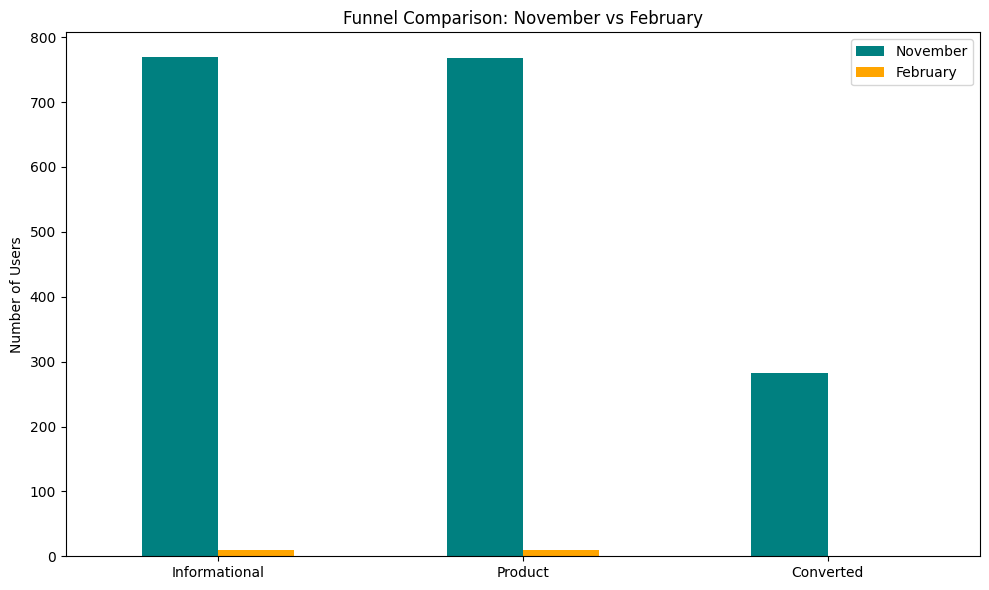

In [131]:
# User Journey Path Differences by Month (Nov vs Feb)
# Define masks for months
month_nov = df_monthly["Month_Nov"] == 1
month_feb = df_monthly["Month_Feb"] == 1

# Define funnel journey steps
def funnel_steps(df_subset):
    step_1 = df_subset["Informational"] > 0
    step_2 = (df_subset["Informational"] > 0) & (df_subset["ProductRelated"] > 0)
    step_3 = step_2 & (df_subset["Revenue"] == True)
    return pd.Series([step_1.sum(), step_2.sum(), step_3.sum()], index=["Informational", "Product", "Converted"])

funnel_nov = funnel_steps(df_monthly[month_nov])
funnel_feb = funnel_steps(df_monthly[month_feb])

# Combine into a DataFrame
funnel_df = pd.DataFrame({"November": funnel_nov, "February": funnel_feb})

# Plot the funnel
funnel_df.plot(kind="bar", figsize=(10, 6), color=["teal", "orange"])
plt.title("Funnel Comparison: November vs February")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Funnel Comparison: November vs February

The funnel analysis reveals a stark contrast in user journeys between November and February. While both months see similar initial drop-offs from informational to product pages, November shows a significantly higher number of users reaching the conversion stage. February, on the other hand, has a negligible conversion count, despite similar funnel entry. This suggests that in February, either user intent is lower or on-site experiences are less effective in guiding users to complete purchases. November's superior performance likely stems from a combination of higher engagement, stronger intent, and more effective funnel progression.


## **Linear Regression on PageValues - since its highest predicator of Revenue**

/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/1833611842.py:28: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


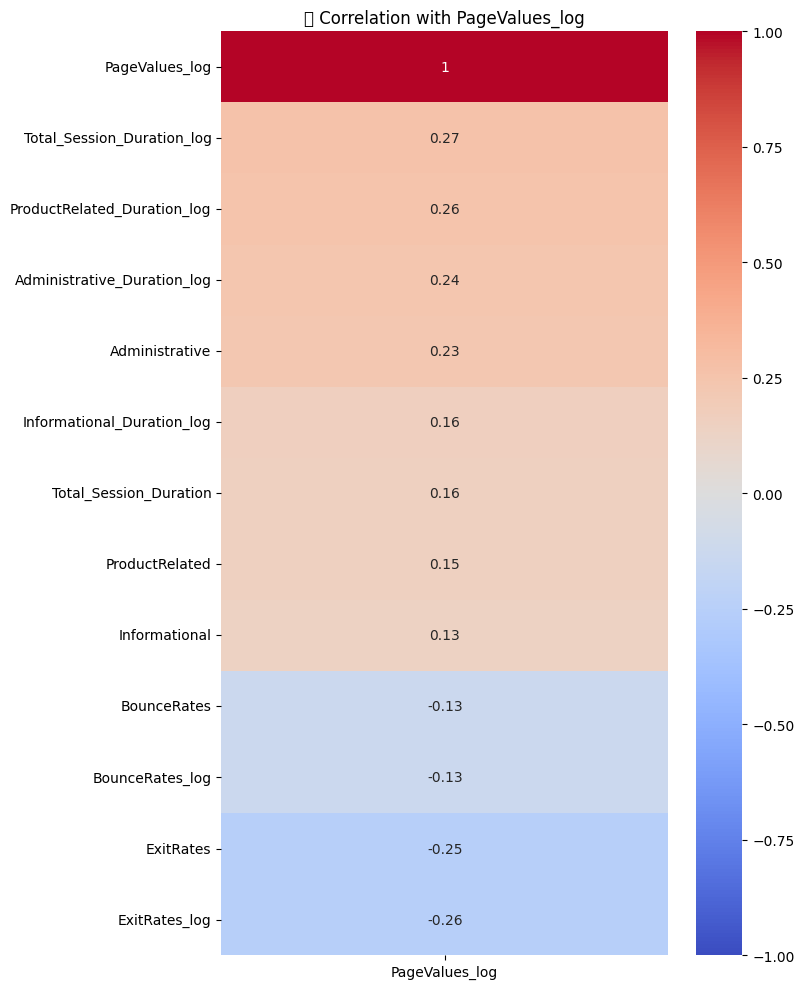

📊 Covariance with PageValues_log:

Total_Session_Duration         424.929
ProductRelated                   8.820
PageValues_log                   1.693
Administrative                   1.013
Administrative_Duration_log      0.739
ProductRelated_Duration_log      0.471
Total_Session_Duration_log       0.458
Informational_Duration_log       0.395
Informational                    0.230
BounceRates_log                 -0.002
BounceRates                     -0.002
ExitRates_log                   -0.007
ExitRates                       -0.008
Name: PageValues_log, dtype: float64


In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Copy relevant numeric features
df_corr = df_cleaned.copy()

features_to_check = [
    "PageValues_log",
    "Informational", "Informational_Duration_log",
    "Administrative", "Administrative_Duration_log",
    "ProductRelated", "ProductRelated_Duration_log",
    "BounceRates", "BounceRates_log",
    "ExitRates", "ExitRates_log",
    "Total_Session_Duration", "Total_Session_Duration_log"
]

# Drop missing values if any
df_corr = df_corr[features_to_check].dropna()

# Correlation with PageValues_log
corr_with_pagevalue_log = df_corr.corr()["PageValues_log"].sort_values(ascending=False)

# Plot correlation heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(corr_with_pagevalue_log.to_frame(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("🔗 Correlation with PageValues_log")
plt.tight_layout()
plt.show()

# Covariance with PageValues_log
cov_with_pagevalue_log = df_corr.cov()["PageValues_log"].sort_values(ascending=False)
print("📊 Covariance with PageValues_log:\n")
print(cov_with_pagevalue_log.round(3))


**Covariance Insights with PageValues_log**

The covariance values reveal how much each feature varies with `PageValues_log`, helping identify which behaviours most influence the depth of engagement with conversion-related pages. Notably, `Total_Session_Duration` has an overwhelmingly high covariance (≈425), suggesting that longer sessions are strongly tied to increased page values — users who stay longer tend to explore more valuable or purchase-oriented content. This is further supported by smaller but positive covariances from `ProductRelated` (≈8.8) and `Administrative` (≈1.0) page counts, indicating that visiting more of these pages is associated with higher `PageValues_log`. Log-transformed durations also contribute positively but more moderately, with `Administrative_Duration_log`, `ProductRelated_Duration_log`, and `Informational_Duration_log` all showing non-trivial covariance (≈0.39–0.74). Conversely, `BounceRates` and `ExitRates` — in both raw and log form — show near-zero or slightly negative covariance, implying minimal or inverse relation to page value. Overall, page value appears most associated with extended session length and deeper interaction with product-related and administrative content, reflecting a pattern of high-intent browsing.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/2007856279.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="viridis")


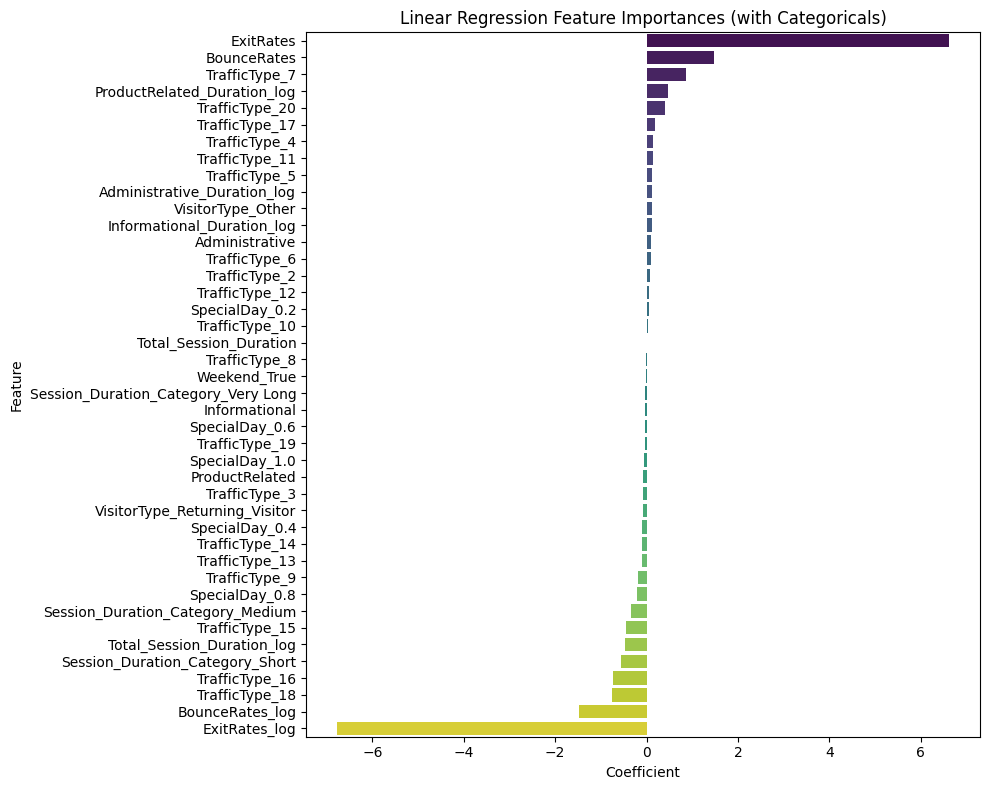

(0.14240521524680516,
 np.float64(1.2012814566200127),
                                 Feature  Coefficient
 8                             ExitRates       6.6292
 6                           BounceRates       1.4674
 20                        TrafficType_7       0.8585
 5           ProductRelated_Duration_log       0.4617
 33                       TrafficType_20       0.4099
 30                       TrafficType_17       0.1818
 17                        TrafficType_4       0.1391
 24                       TrafficType_11       0.1351
 18                        TrafficType_5       0.1249
 3           Administrative_Duration_log       0.1247
 12                    VisitorType_Other       0.1189
 1            Informational_Duration_log       0.1124
 2                        Administrative       0.1093
 19                        TrafficType_6       0.0920
 15                        TrafficType_2       0.0804
 25                       TrafficType_12       0.0546
 34                       S

In [133]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Copy cleaned dataset
df_lr = df_cleaned.copy()

# Numerical features
num_features = [
    "Informational", "Informational_Duration_log",
    "Administrative", "Administrative_Duration_log",
    "ProductRelated", "ProductRelated_Duration_log",
    "BounceRates", "BounceRates_log",
    "ExitRates", "ExitRates_log",
    "Total_Session_Duration", "Total_Session_Duration_log"
]

# Categorical features that are ordinal or small category counts
cat_features = [
    "VisitorType", "Weekend", "TrafficType",
    "SpecialDay", "Session_Duration_Category"
]

# Final target
target = "PageValues_log"

# Drop missing values from relevant columns
df_lr = df_lr[num_features + cat_features + [target]].dropna()


# Split data
X = df_lr[num_features + cat_features]
y = df_lr[target]

# Preprocessing pipeline: scale numeric, one-hot encode categoricals
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(drop="first", sparse_output=False), cat_features)
])

# Create and train pipeline
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Extract feature names
encoded_cat_names = pipeline.named_steps["preprocess"].transformers_[1][1].get_feature_names_out(cat_features)
all_feature_names = num_features + list(encoded_cat_names)

# Extract coefficients
coefficients = pipeline.named_steps["model"].coef_
coef_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 8))
sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="viridis")
plt.title("Linear Regression Feature Importances (with Categoricals)")
plt.tight_layout()
plt.show()

# Output model performance and top features
(r2, rmse, coef_df.round(4))


The linear regression analysis aimed at predicting `PageValues_log` reveals several key behavioural and session-level drivers. The model achieved an R² of **0.14**, indicating that approximately **14.2% of the variance** in page value scores can be explained by the selected features. While this is a modest level of explanatory power, it is still meaningful given the complexity of user browsing behaviour. The Root Mean Squared Error (RMSE) of **1.20** suggests a typical prediction error of about 1.2 log-units, reinforcing that while the model captures some structure, there are likely other unaccounted factors (such as session sequence, UX factors, or promotions) influencing page values. The strongest **positive predictors** of `PageValues_log` were `ExitRates`, `BounceRates`, and specific `TrafficType` values (notably types 7 and 20), suggesting that users who stay longer and exit after meaningful interaction are more likely to accumulate higher page value scores. Additionally, `ProductRelated_Duration_log`, `Administrative_Duration_log`, and `VisitorType_Other` also contributed positively, indicating that deeper exploration of product or administrative pages is associated with higher intent sessions.

Conversely, `ExitRates_log` and `BounceRates_log` were among the **most negative contributors**, indicating a non-linear or interaction effect between raw and log-transformed rates—likely due to multicollinearity or varying user segments. Features like `Session_Duration_Category_Short`, `Weekend_True`, and various mid-range traffic sources also had a dampening effect on predicted page value. This reinforces earlier findings that **page values encapsulate behavioural depth**, and that **session-level engagement is a proxy for conversion readiness**. Given that `PageValues_log` has consistently emerged as the **most predictive feature for revenue generation**, these findings highlight the importance of optimising sessions to encourage interaction with product-related content, reduce bounce tendencies, and potentially segment marketing efforts based on traffic sources. Future work might consider incorporating interaction terms or nonlinear models (like tree-based methods) to better capture complex browsing patterns that drive page value accumulation.


🔍 Top Traffic Types by Average PageValue:

    TrafficType  SessionCount  ConversionRate  AvgPageValue  \
6             7            40            0.30          1.46   
19           20           174            0.28          1.07   
1             2          3832            0.22          0.84   
3             4          1000            0.16          0.82   
7             8           332            0.28          0.81   
4             5           249            0.22          0.77   
13           14            13            0.15          0.71   
9            10           418            0.22          0.70   
5             6           403            0.13          0.67   
10           11           227            0.20          0.58   

    AvgSessionDuration  AvgProductPages  
6                 6.57            29.18  
19                6.17            22.53  
1                 6.73            38.89  
3                 6.52            30.23  
7                 6.43            26.96  
4          

/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_60292/759600406.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=traffic_summary, x="TrafficType", y="AvgPageValue", palette="viridis")


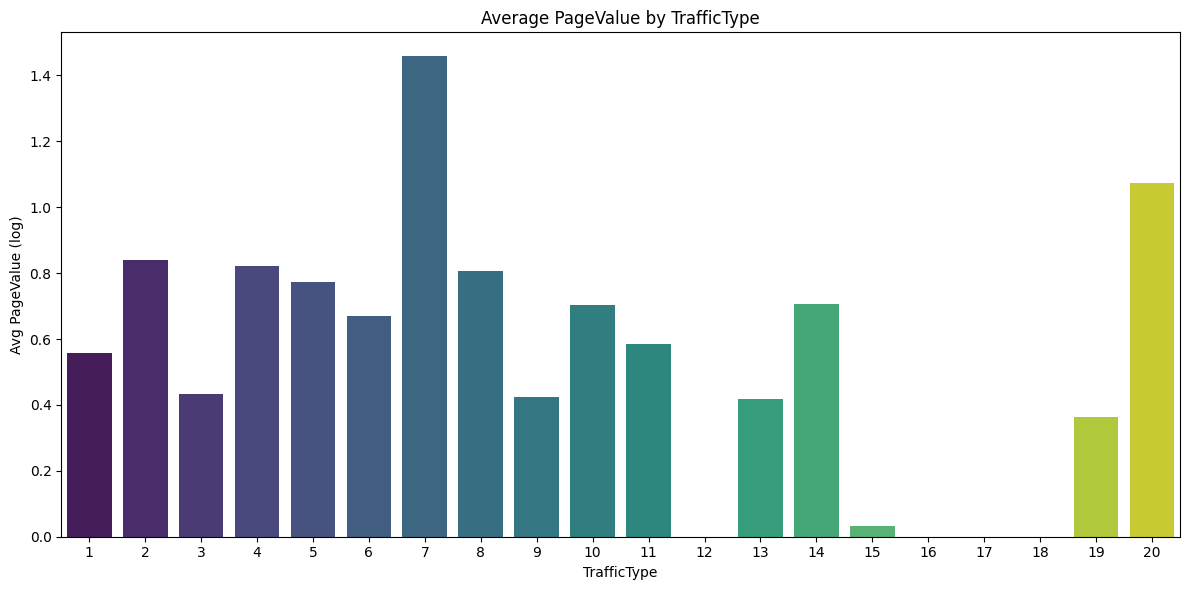

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by TrafficType and calculate average PageValues and Conversion Rate
traffic_summary = df_cleaned.groupby("TrafficType").agg(
    SessionCount=("Revenue", "count"),
    ConversionRate=("Revenue", "mean"),
    AvgPageValue=("PageValues_log", "mean"),
    AvgSessionDuration=("Total_Session_Duration_log", "mean"),
    AvgProductPages=("ProductRelated", "mean")
).reset_index().sort_values(by="AvgPageValue", ascending=False)

# Display top types by AvgPageValue
print("🔍 Top Traffic Types by Average PageValue:\n")
print(traffic_summary.head(10).round(2))

# Visualise key metrics
plt.figure(figsize=(12, 6))
sns.barplot(data=traffic_summary, x="TrafficType", y="AvgPageValue", palette="viridis")
plt.title("Average PageValue by TrafficType")
plt.ylabel("Avg PageValue (log)")
plt.tight_layout()
plt.show()


### Insights: High PageValue Traffic Types and Revenue Influence

The bar chart and accompanying summary table highlight several traffic sources that significantly outperform others in terms of average `PageValues_log`, which earlier analysis has shown to be the strongest predictor of revenue conversion. Notably, `TrafficType 7` achieves the highest average PageValue (1.46) alongside a robust conversion rate of 30%. Although it represents a smaller subset of users (40 sessions), it also shows high product engagement, with an average of 29.18 product-related page views and a session duration of 6.57. This pattern suggests that users from `TrafficType 7` arrive with strong purchase intent—potentially driven by highly targeted channels such as email campaigns, loyalty programs, or remarketing efforts.

`TrafficType 20` also performs exceptionally well, with a conversion rate of 28% and an average PageValue of 1.07, across a larger base of 174 sessions. Its users spend considerable time on site (6.17 average session duration) and interact with a wide range of product pages. These characteristics suggest that `TrafficType 20` may be drawing in engaged, high-intent users, possibly through re-engagement or time-sensitive campaigns. Meanwhile, `TrafficType 2`, though slightly lower in average PageValue (0.84), stands out due to its high session count (3832) and high product engagement (38.89 average product page views), indicating it combines scale with consistent value.

These findings support the notion that `TrafficTypes 7`, `20`, and `2` are especially effective at delivering quality traffic with strong revenue potential. Strategic efforts could be made to invest more in these channels—either by increasing traffic volume, replicating targeting methods, or improving post-click experience. On the other hand, lower-performing TrafficTypes, particularly those with low PageValues and minimal engagement, may warrant further review to optimise messaging, targeting, or campaign structure. Identifying what makes these top sources successful could help scale results across broader segments.


---

# **Neural Network**

[**You can find my neural network in the QS4-NN.ipynb file**](QS4-NN.ipynb)
